<a href="https://colab.research.google.com/github/yuli206/mi-proyecto/blob/main/proyecto_de_variables_alternativas_al_IPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto: Estimación de condiciones de pobreza usando variables alternativas al IPM en colombia 2024
###Yuli Fernanda Ezquivel Martinez
###María José González serrano

#1.Exportacion de datos

   Datos sacados de:

* https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/pobreza-multidimensional
* https://www.dane.gov.co/index.php/estadisticas-por-tema/salud/calidad-de-vida-ecv/encuesta-nacional-de-calidad-de-vida-ecv-2024

### SUBIR BASES DE DATOS QUE ESTAN LA CARPETA DATA EN GITHUB

In [ ]:
import pandas as pd

# Nombres exactos de tus archivos en Colab
archivo_variables = 'anex-ECV-Series-2024.xlsx'
archivo_ipm = 'anex-PMultidimensional-Departamental-2024.xlsx'

# Leer archivos Excel
xls_variables = pd.ExcelFile(archivo_variables)
xls_ipm = pd.ExcelFile(archivo_ipm)

# Ver hojas que tienen
print("Hojas en archivo variables:")
print(xls_variables.sheet_names)

print("\nHojas en archivo IPM:")
print(xls_ipm.sheet_names)

Hojas en archivo variables:
['Índice', 'Cuadro 1', 'Cuadro 2', 'Cuadro 3', 'Cuadro 4', 'Cuadro 5', 'Cuadro 6', 'Cuadro 7', 'Cuadro 8', 'Cuadro 9', 'Cuadro 10', 'Cuadro 11', 'Cuadro 12', 'Cuadro 13', 'Cuadro 14', 'Cuadro 15', 'Cuadro 16', 'Cuadro 17', 'Cuadro 18', 'Cuadro 19', 'Cuadro 20', 'Cuadro 21', 'Cuadro 22']

Hojas en archivo IPM:
['Índice', 'IPM_Regiones', 'IPM_Departamentos', 'IPM_Variables_Región', 'IPM_Variables_Departamento ', 'IC_IPM', 'Intensidad_IPM', 'Incidencia_Ajustada_IPM', 'Contribuciones IA_IPM', 'IPM_Sexo', 'IC_IPM_Sexo', 'IPM_Sexo Jefe', 'IC_IPM_Sexo Jefe ']


In [ ]:
# dejar hojas de interes
df_variables = pd.read_excel(archivo_variables, sheet_name=['Cuadro 3','Cuadro 4','Cuadro 5','Cuadro 6','Cuadro 11'] )
df_ipm = pd.read_excel(archivo_ipm, sheet_name='IPM_Departamentos')

# 2.Limpieza de datos

# 2.1.IPM

In [ ]:
df_ipm

Unnamed: 0  \
0                                                                                                                                                                                                                                                         NaN   
1                                                                                                                                                                                                                      Incidencia de Pobreza Multidimensional   
2                                                                                                                                                                                                                                                         NaN   
3                                                                                                                                                                                                                                                         NaN   
4                                                                                                                                                                                            Incidencia de Pobreza Multidimensional\nDepartamentos\n2018-2024   
5                                                                                                                                                                                                                                                         NaN   
6                                                                                                                                                                                                                                                         NaN   
7                                                                                                                                                                                                                                                         NaN   
8                                                                                                                                                                                                                                                         NaN   
9                                                                                                                                                                                                                                        Cifras en porcentaje   
10                                                                                                                                                                                                                                               Departamento   
11                                                                                                                                                                                                                                                        NaN   
12                                                                                                                                                                                                                                                  Antioquia   
13                                                                                                                                                                                                                                                  Atlántico   
14                                                                                                                                                                                                                                                Bogotá D.C.   
15                                                                                                                                 

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(1, 11)) + list(range(45, len(df_ipm)))
df_ipm = df_ipm.drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_ipm ahora tiene {len(df_ipm)} filas")

df_ipm ahora tiene 35 filas


In [ ]:
# Eliminar solo la fila 0
df_ipm = df_ipm.drop([0]).reset_index(drop=True)

print(f"df_ipm final: {len(df_ipm)} filas")

df_ipm final: 34 filas


In [ ]:
# Crear nombres de columnas correctos
años = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
categorias = ['Total', 'Cabeceras', 'Rural']
nuevos_nombres = ['Departamento']

for año in años:
    for categoria in categorias:
        nuevos_nombres.append(f'{año}_{categoria}')

df_ipm.columns = nuevos_nombres

# Convertir a numérico
for col in df_ipm.columns[1:]:
    df_ipm[col] = pd.to_numeric(df_ipm[col], errors='coerce')

print("df_ipm está listo y limpio!")

df_ipm está listo y limpio!


In [ ]:
 # Eliminar solo la fila 0
df_ipm = df_ipm.drop([0]).reset_index(drop=True)

print(f"df_ipm final: {len(df_ipm)} filas")

df_ipm final: 33 filas


In [ ]:
print(df_ipm.columns.tolist())

['Departamento', '2018_Total', '2018_Cabeceras', '2018_Rural', '2019_Total', '2019_Cabeceras', '2019_Rural', '2020_Total', '2020_Cabeceras', '2020_Rural', '2021_Total', '2021_Cabeceras', '2021_Rural', '2022_Total', '2022_Cabeceras', '2022_Rural', '2023_Total', '2023_Cabeceras', '2023_Rural', '2024_Total', '2024_Cabeceras', '2024_Rural']


In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_ipm = df_ipm[['Departamento', '2024_Total', '2024_Cabeceras', '2024_Rural' ]]
df_ipm.head(2)

Departamento  2024_Total  2024_Cabeceras  2024_Rural
0    Antioquia        10.9             8.4        21.2
1    Atlántico         9.5             8.6        26.4

In [ ]:
#Encontrar duplicados
df_ipm.duplicated().sum()

np.int64(0)

In [ ]:
# Llenar los valores nulos con cero
df_ipm['2024_Rural'] = df_ipm['2024_Rural'].fillna(0)
df_ipm.tail()

Departamento  2024_Total  2024_Cabeceras  2024_Rural
28     Amazonas        15.6            13.8        17.6
29      Guainía        49.0            40.1        56.9
30     Guaviare        21.3            17.5        26.3
31       Vaupés        37.4            16.2        45.5
32      Vichada        70.2            30.0        82.7

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_ipm.isna().sum()

Departamento      0
2024_Total        0
2024_Cabeceras    0
2024_Rural        0
dtype: int64

In [ ]:
df_ipm= df_ipm.drop(columns=['2024_Cabeceras'])

In [ ]:
df_ipm= df_ipm.drop(columns=['2024_Rural'])

In [ ]:
df_ipm

Departamento  2024_Total
0            Antioquia        10.9
1            Atlántico         9.5
2          Bogotá D.C.         5.4
3              Bolívar        15.6
4               Boyacá         6.9
5               Caldas         9.2
6              Caquetá        13.9
7                Cauca        14.0
8                Cesar        13.4
9              Córdoba        25.7
10        Cundinamarca         7.4
11               Chocó        33.9
12               Huila        10.9
13          La Guajira        39.3
14           Magdalena        19.2
15                Meta        10.4
16              Nariño        18.1
17  Norte de Santander        15.2
18             Quindío         7.4
19           Risaralda         9.5
20           Santander         6.8
21               Sucre        21.8
22              Tolima        12.6
23     Valle del Cauca         6.2
24              Arauca        17.7
25            Casanare        11.3
26            Putumayo        11.8
27          San Andrés         6.0
28            Amazonas        15.6
29             Guainía        49.0
30            Guaviare        21.3
31              Vaupés        37.4
32             Vichada        70.2

#2.2.Variables

# 2.2.1.Jefatura femenina o masculina

In [ ]:
df_variables['Cuadro 3']

Unnamed: 0  \
0                                                                                                                                                                                                    NaN   
1                                                                                                                                                                                                    NaN   
2                                                                                                                                                                                                    NaN   
3                                                                                                                                                                                                    NaN   
4                                                                                                                                                                                                    NaN   
5                                                                                                                                                                                                    NaN   
6                                                                                                                                                                                                    NaN   
7                                                                                                                                                                                                    NaN   
8                                                                                                                                                                                                    NaN   
9                                                                                                                                                                                                Dominio   
10                                                                                                                                                                                                   NaN   
11                                                                                                                                                                                                   NaN   
12                                                                                                                                                                                                   NaN   
13                                                                                                                                                                                                   NaN   
14                                                                                                                                                                                        Total nacional   
15                                                                                                                                                                                              Cabecera   
16                                                                                                                                                                     Centros poblados y rural disperso   
17                                                                                                                                                                                              Amazonas   
18                                                                                                                                                                                             Antioquia   
19                                                                                                            

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(1, 14)) + list(range(50, len(df_variables['Cuadro 3'])))
df_variables['Cuadro 3'] = df_variables['Cuadro 3'].drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_variables[Cuadro 3] ahora tiene {len(df_variables['Cuadro 3'])} filas")

df_variables[Cuadro 3] ahora tiene 37 filas


In [ ]:
# Eliminar solo la fila 0
df_variables['Cuadro 3'] = df_variables['Cuadro 3'].drop([0,1]).reset_index(drop=True)

print(f"df_variables[Cuadro 3] final: {len(df_ipm)} filas")

df_variables[Cuadro 3] final: 33 filas


In [ ]:
# Redondear todas las columnas numéricas a 1 decimal
df_variables['Cuadro 3'] = df_variables['Cuadro 3'].round(1)

# Mostrar resultado
df_variables['Cuadro 3'].head()

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                           Cabecera      11742       6988  59.507071   
1  Centros poblados y rural disperso       3660       2664  72.785775   
2                           Amazonas         22         15  69.077018   
3                          Antioquia       2107       1224  58.098534   
4                             Arauca         92         56  60.063902   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0       4755  40.492929       3655  76.861116       1119  30.618136   
1        996  27.214225        747  75.021162        285   38.09353   
2          7  30.922982          5  82.042741          3  52.820259   
3        883  41.901466        670  75.888216        195  29.141183   
4         37  39.936098         28  76.482218         12  43.210934   

  Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  Unnamed: 14 Unnamed: 15  \
0        1618   23.149885         130    8.065128          NaN       12221   
1         630   23.653296          50    7.861898          NaN        3778   
2           4   26.372993           1   17.164404          NaN          22   
3         330   26.946069          15    4.416366          NaN        2133   
4          18   33.303308           2    9.749076          NaN         103   

  Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  \
0        7142   58.434589        5080   41.565411        3790   74.613515   
1        2710   71.720634        1068   28.279366         775   72.562632   
2          16   71.058435           6   28.941565           5   84.036236   
3        1191   55.855627         941   44.144373         675    71.71009   
4          60   58.577973          43   41.422027          30   69.811312   

  Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27  \
0        1178   31.091045        1713   23.992301         130    7.583814   
1         292   37.622484         674   24.867591          50    7.376157   
2           3   47.660548           4   27.887091           1     12.3857   
3         214   31.640008         312   26.206878          19    6.232362   
4          13   43.315084          19   32.229883           2    8.067231   

   Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33  \
0          NaN       12551        7216   57.495075        5335   42.504925   
1          NaN        3865        2664   68.936582        1201   31.063418   
2          NaN          25          17   66.873042           8   33.126958   
3          NaN        2180        1263   57.958379         916   42.041621   
4          NaN         108          58   53.375379          50   46.624621   

  Unnamed: 34 Unnamed: 35 Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39  \
0        3927   73.607252        1240   31.572935        1819   25.203561   
1         826   68.837633         336    40.63974         657   24.656996   
2           6   76.665351           3   47.423356           6   32.659583   
3         670   73.132427         205   30.551976         318   25.143967   
4          33   65.194745          15   46.722525          22   38.556127   

  Unnamed: 40 Unnamed: 41  Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45  \
0         135    7.404907          NaN       13160        7075   53.764696   
1          55    8.379617          NaN        3908        2643   67.626346   
2           1   15.674205          NaN          21          15    69.68074   
3          13    4.240272          NaN        2328        1258   54.018425   
4           2   10.035702          NaN         109          59   53.808251   

  Unnamed: 46 Unnamed: 47 Unnamed: 48 Unnamed: 49 Unnamed: 50 Unnamed: 51  \
0        6085   46.235304        4282   70.375219        1369   31.965575   
1        1265   32.373654         855   67.601067         357   41.745118   
2           6    30.31926           5   73.181395           2   44.786601   
3        1071   45.981575         736   68.708405       

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_variables['Cuadro 3']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                            Cabecera      11742       6988  59.507071   
1   Centros poblados y rural disperso       3660       2664  72.785775   
2                            Amazonas         22         15  69.077018   
3                           Antioquia       2107       1224  58.098534   
4                              Arauca         92         56  60.063902   
5                           Atlántico        647        421  65.028481   
6                         Bogotá D.C.       2601       1593  61.246944   
7                             Bolívar        582        365  62.691911   
8                              Boyacá        424        281  66.113552   
9                              Caldas        340        207  60.988991   
10                            Caquetá        133         87  65.051763   
11                           Casanare        140         93  66.945352   
12                              Cauca        456        306  67.088803   
13                              Cesar        341        218  64.012535   
14                            Córdoba        495        325  65.709842   
15                       Cundinamarca        974        637  65.350353   
16                              Chocó        165         92   55.70513   
17                            Guainía         13         10  77.410793   
18                           Guaviare         28         20  71.035327   
19                              Huila        349        236  67.639764   
20                         La Guajira        258        140  54.296448   
21                          Magdalena        366        236  64.490107   
22                               Meta        344        225  65.496425   
23                             Nariño        510        333  65.378703   
24                 Norte de Santander        460        295  64.131722   
25                           Putumayo        117         74  63.565304   
26                            Quindío        190        116  60.818142   
27                          Risaralda        325        201  61.804533   
28                         San Andrés         16         11  65.715723   
29                          Santander        714        480  67.257221   
30                              Sucre        247        159  64.222115   
31                             Tolima        444        289  65.075623   
32                              Valle       1460        875  59.916016   
33                             Vaupés          9          7   81.91626   
34                            Vichada         31         24  77.064122   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0        4755  40.492929       3655  76.861116       1119  30.618136   
1         996  27.214225        747  75.021162        285   38.09353   
2           7  30.922982          5  82.042741          3  52.820259   
3         883  41.901466        670  75.888216        195  29.141183   
4          37  39.936098         28  76.482218         12  43.210934   
5         226  34.971519        165  72.746446         47  28.390828   
6        1008  38.753056        774  76.811157        200  25.874928   
7         217  37.308089        143  65.877392         51  35.495045   
8         144  33.886448        116  80.464285         34  29.417809   
9         133  39.011009        106   79.78167         27  25.786802   
10         46  34.948237         37   79.20492         17  46.911888   
11         46  33.054648         36  78.424288         17  46.652534   
12        150  32.911197        119  78.940033         42  35.310451   
13        123  35.987465         95   77.11125         44  46.678999   
14        170  34.290158        124  72.924838         41  33.069399   
15        338  34.649647        251  74.285691         82  32.756943   
16         73   44.29487         50  69.008494         23  44.658888   
17          3  22.589207          2  71.853815          1  56.9328

In [ ]:
print(df_variables['Cuadro 3'].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_variables['Cuadro 3'] = df_variables['Cuadro 3'][['Unnamed: 0', 'Unnamed: 85', 'Unnamed: 86', 'Unnamed: 88' ]]
df_variables['Cuadro 3'].head(2)

Unnamed: 0 Unnamed: 85 Unnamed: 86 Unnamed: 88
0                           Cabecera       14343        7313        7030
1  Centros poblados y rural disperso        4146        2583        1563

In [ ]:
# Renombrar columnas
df_variables['Cuadro 3'] = df_variables['Cuadro 3'].rename(columns={
    'Unnamed: 0': 'Departamento',
    'Unnamed: 85': 'total hogares',
    'Unnamed: 86': 'hogares con jefe hombre',
    'Unnamed: 88': 'hogares con jefe mujer'
})

# Verificar resultado
df_variables['Cuadro 3'].head(2)

Departamento total hogares hogares con jefe hombre  \
0                           Cabecera         14343                    7313   
1  Centros poblados y rural disperso          4146                    2583   

  hogares con jefe mujer  
0                   7030  
1                   1563

In [ ]:
# Eliminar solo la filas
df_variables['Cuadro 3'] = df_variables['Cuadro 3'].drop([0,1]).reset_index(drop=True)

print(f"df_variables[Cuadro 3] final: {len(df_ipm)} filas")

df_variables[Cuadro 3] final: 33 filas


In [ ]:
#Encontrar duplicados
df_variables['Cuadro 3'].duplicated().sum()

np.int64(0)

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_variables['Cuadro 3'].isna().sum()

Departamento               0
total hogares              0
hogares con jefe hombre    0
hogares con jefe mujer     0
dtype: int64

In [ ]:
df_variables['Cuadro 3']

Departamento total hogares hogares con jefe hombre  \
0             Amazonas            27                      18   
1            Antioquia          2563                    1322   
2               Arauca           125                      62   
3            Atlántico           817                     442   
4          Bogotá D.C.          3098                    1611   
5              Bolívar           710                     387   
6               Boyacá           455                     242   
7               Caldas           380                     204   
8              Caquetá           153                      85   
9             Casanare           165                      87   
10               Cauca           604                     352   
11               Cesar           438                     244   
12             Córdoba           632                     346   
13        Cundinamarca          1355                     728   
14               Chocó           185                     101   
15             Guainía            17                      12   
16            Guaviare            35                      21   
17               Huila           390                     237   
18          La Guajira           329                     159   
19           Magdalena           442                     213   
20                Meta           395                     215   
21              Nariño           611                     340   
22  Norte de Santander           524                     301   
23            Putumayo           161                      97   
24             Quindío           215                     112   
25           Risaralda           357                     191   
26          San Andrés            17                       9   
27           Santander           821                     431   
28               Sucre           299                     162   
29              Tolima           504                     288   
30               Valle          1610                     835   
31              Vaupés            15                      12   
32             Vichada            41                      30   

   hogares con jefe mujer  
0                       9  
1                    1241  
2                      63  
3                     376  
4                    1488  
5                     323  
6                     213  
7                     175  
8                      68  
9                      77  
10                    252  
11                    194  
12                    286  
13                    627  
14                     84  
15                      5  
16                     14  
17                    153  
18                    170  
19                    228  
20                    180  
21                    271  
22                    223  
23                     65  
24                    103  
25                    166  
26                      7  
27                    390  
28                    137  
29                    216  
30                    775  
31                      3  
32                     11

 # 2.2.2.Hogares por acceso a servicioos públicos

In [ ]:
df_variables['Cuadro 4']

Unnamed: 0  \
0                                                                                                                                                                                                                                                                                        NaN   
1                                                                                                                                                                                                                                                                                        NaN   
2                                                                                                                                                                                                                                                                                        NaN   
3                                                                                                                                                                                                                                                                                        NaN   
4                                                                                                                                                                                                                                                                                        NaN   
5                                                                                                                                                                                                                                                                                        NaN   
6                                                                                                                                                                                                                                                                                        NaN   
7                                                                                                                                                                                                                                                                                        NaN   
8                                                                                                                                                                                                                                                                                        NaN   
9                                                                                                                                                                                                                                                                                    Dominio   
10                                                                                                                                                                                                                                                                                       NaN   
11                                                                                                                                                                                                                                                                                       NaN   
12                                                                                                                                                                                                                                                                                       NaN   
13                                                                                                                                                                                                                                                

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(0, 15)) + list(range(49, len(df_variables['Cuadro 4'])))
df_variables['Cuadro 4'] = df_variables['Cuadro 4'].drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_variables[Cuadro 4] ahora tiene {len(df_variables['Cuadro 4'])} filas")

df_variables[Cuadro 4] ahora tiene 34 filas


In [ ]:
# Eliminar solo la fila 0
df_variables['Cuadro 4'] = df_variables['Cuadro 4'].drop([0]).reset_index(drop=True)

print(f"df_variables[Cuadro 4] final: {len(df_variables['Cuadro 4'])} filas")

df_variables[Cuadro 4] final: 33 filas


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_variables['Cuadro 4']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             Amazonas         22         18  84.775373          0          0   
1            Antioquia       2107       2097  99.515343       1219  57.842454   
2               Arauca         92         89  96.173138          5   5.222817   
3            Atlántico        647        645  99.709568        579   89.51612   
4          Bogotá D.C.       2601       2598  99.886449       2407  92.528686   
5              Bolívar        582        561  96.320887        400  68.724973   
6               Boyacá        424        418  98.575592        209  49.208881   
7               Caldas        340        339  99.770298        218  64.192446   
8              Caquetá        133        122  91.677039         45  33.720014   
9             Casanare        140        136  97.696656        102  73.007035   
10               Cauca        456        445  97.467075        134  29.468401   
11               Cesar        341        328  96.393587        219  64.411567   
12             Córdoba        495        485  98.025156        234  47.392233   
13        Cundinamarca        974        968  99.326439        673  69.035859   
14               Chocó        165        133  80.357327          1   0.723466   
15             Guainía         13          8  66.325744          0          0   
16            Guaviare         28         23  83.363316          5  16.998707   
17               Huila        349        346  99.090813        229  65.521962   
18          La Guajira        258        167  64.650376         91   35.38465   
19           Magdalena        366        350  95.459112        222  60.695606   
20                Meta        344        335   97.38647        225  65.311917   
21              Nariño        510        501  98.209729         23   4.561263   
22  Norte de Santander        460        451  98.079963        224  48.615696   
23            Putumayo        117         99   84.42118         14  11.777095   
24             Quindío        190        188   99.08598        147  77.541187   
25           Risaralda        325        324  99.724906        231  71.127554   
26          San Andrés         16         16  99.797779          0          0   
27           Santander        714        711  99.599607        513  71.798478   
28               Sucre        247        242   97.70386        146  59.088087   
29              Tolima        444        437  98.390057        297  66.896396   
30               Valle       1460       1446  99.084507       1108  75.925735   
31              Vaupés          9          4  40.876636          0          0   
32             Vichada         31         16  51.495114          0          0   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0           5  24.714111          5  22.606574           9   41.689856   
1        1834  87.014696       1648  78.208897        1853   87.953745   
2          70  75.657706         53  57.610288          65   69.851717   
3         637  98.485062        533  82.410245         617   95.367536   
4        2590  99.574587       2585  99.368704        2582   99.247791   
5         446  76.547353        267  45.894185         421   72.319714   
6         347  81.752312        256  60.293453         264    62.20617   
7         308  90.786985        283  83.144603         292   85.859853   
8          96  72.091353         84  63.136519          92   69.196399   
9         118  84.437217         99  70.882354         108   77.587278   
10        358  78.434516        203  44.406955         205   45.041608   
11        298  87.471469        257  75.507374         270   79.293499   
12        376  75.965681        192  38.909355         275    55.60177   
13        892  91.496433        752  77.197916         807   82.790223   
14         56  33.873914         28  17.147601          76   46.259368   
15          3  23.501164          3  25.117794           5    37.88005   

In [ ]:
print(df_variables['Cuadro 4'].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_variables['Cuadro 4'] = df_variables['Cuadro 4'][['Unnamed: 0', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 100','Unnamed: 102','Unnamed: 104','Unnamed: 106' ]]
df_variables['Cuadro 4'].head(2)

Unnamed: 0 Unnamed: 97 Unnamed: 98 Unnamed: 100 Unnamed: 102 Unnamed: 104  \
0   Amazonas          27          26            0           12            8   
1  Antioquia        2563        2560         1751         2368         2090   

  Unnamed: 106  
0           14  
1         2364

In [ ]:
# Renombrar columnas
df_variables['Cuadro 4'] = df_variables['Cuadro 4'].rename(columns={
    'Unnamed: 0': 'Departamentos',
    'Unnamed: 97': 'total Hogares',
    'Unnamed: 98': 'total Energia',
    'Unnamed: 100': 'total Gas Natural',
    'Unnamed: 102': 'Total Acueducto',
    'Unnamed: 104': 'Total Alcantarillado',
    'Unnamed: 106': 'Total Recolección de Basura'
})

# Verificar resultado
df_variables['Cuadro 4'].head(2)

Departamentos total Hogares total Energia total Gas Natural Total Acueducto  \
0      Amazonas            27            26                 0              12   
1     Antioquia          2563          2560              1751            2368   

  Total Alcantarillado Total Recolección de Basura  
0                    8                          14  
1                 2090                        2364

In [ ]:
#Encontrar duplicados
df_variables['Cuadro 4'].duplicated().sum()

np.int64(0)

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_variables['Cuadro 4'].isna().sum()

Departamentos                  0
total Hogares                  0
total Energia                  0
total Gas Natural              0
Total Acueducto                0
Total Alcantarillado           0
Total Recolección de Basura    0
dtype: int64

In [ ]:
df_variables['Cuadro 4']

Departamentos total Hogares total Energia total Gas Natural  \
0             Amazonas            27            26                 0   
1            Antioquia          2563          2560              1751   
2               Arauca           125           122                28   
3            Atlántico           817           816               741   
4          Bogotá D.C.          3098          3095              2945   
5              Bolívar           710           703               481   
6               Boyacá           455           454               293   
7               Caldas           380           380               274   
8              Caquetá           153           151                88   
9             Casanare           165           162               141   
10               Cauca           604           601               166   
11               Cesar           438           436               323   
12             Córdoba           632           629               315   
13        Cundinamarca          1355          1350              1082   
14               Chocó           185           179                 0   
15             Guainía            17            14                 0   
16            Guaviare            35            34                 8   
17               Huila           390           389               277   
18          La Guajira           329           233               146   
19           Magdalena           442           437               311   
20                Meta           395           391               280   
21              Nariño           611           610                83   
22  Norte de Santander           524           523               311   
23            Putumayo           161           147                25   
24             Quindío           215           214               178   
25           Risaralda           357           355               293   
26          San Andrés            17            17                 0   
27           Santander           821           818               646   
28               Sucre           299           297               170   
29              Tolima           504           502               399   
30               Valle          1610          1605              1347   
31              Vaupés            15            14                 0   
32             Vichada            41            18                 0   

   Total Acueducto Total Alcantarillado Total Recolección de Basura  
0               12                    8                          14  
1             2368                 2090                        2364  
2               81                   65                          84  
3              799                  698                         790  
4             3094                 3077                        3092  
5              607                  370                         533  
6              427                  296                         315  
7              352                  310                         339  
8              116                  105                         112  
9              140                  116                         133  
10             513                  257                         264  
11             398                  337                         359  
12             455                  273                         382  
13            1316                 1104                        1194  
14              77                   31                         102  
15               4                    4                           5  
16              19                   17                          21  
17             358                  264                         273  
18             174                  156                         178  
19             390                  252                         325  
20             332                  315                         339  
21             464  

# 2.2.3.Hogares con acceso a internet

In [ ]:
df_variables['Cuadro 5']

Unnamed: 0  \
0                                                                                                                                                                                                    NaN   
1                                                                                                                                                                                                    NaN   
2                                                                                                                                                                                                    NaN   
3                                                                                                                                                                                                    NaN   
4                                                                                                                                                                                                    NaN   
5                                                                                                                                                                                                    NaN   
6                                                                                                                                                                                                    NaN   
7                                                                                                                                                                                                    NaN   
8                                                                                                                                                                                                    NaN   
9                                                                                                                                                                                                    NaN   
10                                                                                                                                                                                               Dominio   
11                                                                                                                                                                                                   NaN   
12                                                                                                                                                                                                   NaN   
13                                                                                                                                                                                                   NaN   
14                                                                                                                                                                                        Total nacional   
15                                                                                                                                                                                              Cabecera   
16                                                                                                                                                                     Centros poblados y rural disperso   
17                                                                                                                                                                                              Amazonas   
18                                                                                                                                                                                             Antioquia   
19                                                                                                            

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(0, 16)) + list(range(50, len(df_variables['Cuadro 5'])))
df_variables['Cuadro 5'] = df_variables['Cuadro 5'].drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_variables[Cuadro 5] ahora tiene {len(df_variables['Cuadro 5'])} filas")

df_variables[Cuadro 5] ahora tiene 34 filas


In [ ]:
# Eliminar solo la fila 0
df_variables['Cuadro 5'] = df_variables['Cuadro 5'].drop([0]).reset_index(drop=True)

print(f"df_variables[Cuadro 5] final: {len(df_variables['Cuadro 5'])} filas")

df_variables[Cuadro 5] final: 33 filas


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_variables['Cuadro 5']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             Amazonas         22          1   5.363327          0  27.452033   
1            Antioquia       2107       1168  55.447024        989  84.664267   
2               Arauca         92         19  20.023546         10  52.276923   
3            Atlántico        647        352  54.407485        262  74.383471   
4          Bogotá D.C.       2601       1983  76.246487       1760  88.709869   
5              Bolívar        582        167  28.608228        128   77.11144   
6               Boyacá        424        202  47.499035        108  53.493562   
7               Caldas        340        159   46.69202        144  91.065906   
8              Caquetá        133         45  33.949255         19  42.209194   
9             Casanare        140         63  45.381028         30  47.683741   
10               Cauca        456        135   29.66365         91  67.223924   
11               Cesar        341        136  39.840421         84  61.828119   
12             Córdoba        495        112  22.561968         86  76.935852   
13        Cundinamarca        974        501   51.46756        380  75.731304   
14               Chocó        165         24  14.425476         18  76.520279   
15             Guainía         13          2  11.875067          1  38.989606   
16            Guaviare         28          6  22.849973          2  34.449497   
17               Huila        349        147  42.194038         84  57.187199   
18          La Guajira        258         52  20.290828         21  39.336253   
19           Magdalena        366        124   33.81069         83   66.95579   
20                Meta        344        186  54.005696        124  66.760439   
21              Nariño        510        187  36.593259         91  48.600458   
22  Norte de Santander        460        200  43.395334        132   65.90513   
23            Putumayo        117         19  16.623488         15  74.759405   
24             Quindío        190        121  63.923447         95  77.848934   
25           Risaralda        325        198  61.055758        164  82.493702   
26          San Andrés         16          7  41.089208          4  59.930549   
27           Santander        714        432  60.470798        326  75.423969   
28               Sucre        247         76  30.565845         45  59.472482   
29              Tolima        444        235  52.995975        148   62.94734   
30               Valle       1460        989  67.717847        747  75.543051   
31              Vaupés          9          0   0.962221          0  26.041547   
32             Vichada         31          1   4.660032          1  45.625609   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  Unnamed: 10 Unnamed: 11  \
0           1  89.192105          0  16.644139          NaN          22   
1         528  45.158538        348  29.822804          NaN        2133   
2          13  71.813915          4  24.090838          NaN         103   
3         180  51.132815         90  25.516285          NaN         679   
4        1075  54.195647        851  42.905516          NaN        2692   
5          75   45.20481         37   22.31625          NaN         601   
6         144  71.617269         51   25.11083          NaN         447   
7          69  43.613601         55  34.679507          NaN         350   
8          37  82.640169         11  24.849363          NaN         134   
9          42  65.498324          8  13.182065          NaN         146   
10         78   57.47036         33  24.694284          NaN         481   
11         70  51.576782         18  13.404901          NaN         365   
12         58  52.005662         32  28.941514          NaN         510   
13        306  61.044135        184  36.775439          NaN        1054   
14          9  36.900133          3  13.420411          NaN         170   
15          1   76.54295          0  15.532555          N

In [ ]:
print(df_variables['Cuadro 5'].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_variables['Cuadro 5'] = df_variables['Cuadro 5'][['Unnamed: 0', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 64','Unnamed: 66','Unnamed: 68']]
df_variables['Cuadro 5'].head(2)

Unnamed: 0 Unnamed: 61 Unnamed: 62 Unnamed: 64 Unnamed: 66 Unnamed: 68
0   Amazonas          27          11           3          10           2
1  Antioquia        2563        1715        1521         823         629

In [ ]:
# Renombrar columnas
df_variables['Cuadro 5'] = df_variables['Cuadro 5'].rename(columns={
    'Unnamed: 0': 'Departamentos',
    'Unnamed: 61': 'total hogares',
    'Unnamed: 62': 'total Internet',
    'Unnamed: 64': 'total Tipo fijo',
    'Unnamed: 66': 'Total Tipo Movil',
    'Unnamed: 68': 'Total Tipo Fijo-Movil',
    })

# Verificar resultado
df_variables['Cuadro 4'].head(2)

Departamentos total Hogares total Energia total Gas Natural Total Acueducto  \
0      Amazonas            27            26                 0              12   
1     Antioquia          2563          2560              1751            2368   

  Total Alcantarillado Total Recolección de Basura  
0                    8                          14  
1                 2090                        2364

In [ ]:
#Encontrar duplicados
df_variables['Cuadro 5'].duplicated().sum()

np.int64(0)

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_variables['Cuadro 5'].isna().sum()

Departamentos            0
total hogares            0
total Internet           0
total Tipo fijo          0
Total Tipo Movil         0
Total Tipo Fijo-Movil    0
dtype: int64

In [ ]:
df_variables['Cuadro 5']

Departamentos total hogares total Internet total Tipo fijo  \
0             Amazonas            27             11               3   
1            Antioquia          2563           1715            1521   
2               Arauca           125             43              25   
3            Atlántico           817            481             396   
4          Bogotá D.C.          3098           2562            2075   
5              Bolívar           710            428             274   
6               Boyacá           455            276             176   
7               Caldas           380            254             209   
8              Caquetá           153             95              39   
9             Casanare           165            117              52   
10               Cauca           604            296             186   
11               Cesar           438            282             151   
12             Córdoba           632            298             155   
13        Cundinamarca          1355            907             627   
14               Chocó           185             53              23   
15             Guainía            17              5               1   
16            Guaviare            35             20               8   
17               Huila           390            276             206   
18          La Guajira           329             99              53   
19           Magdalena           442            243             121   
20                Meta           395            304             169   
21              Nariño           611            334             183   
22  Norte de Santander           524            317             254   
23            Putumayo           161             62              41   
24             Quindío           215            136             114   
25           Risaralda           357            261             220   
26          San Andrés            17             10               7   
27           Santander           821            536             384   
28               Sucre           299            139              65   
29              Tolima           504            385             229   
30               Valle          1610           1182             961   
31              Vaupés            15              4               0   
32             Vichada            41              6               1   

   Total Tipo Movil Total Tipo Fijo-Movil  
0                10                     2  
1               823                   629  
2                32                    14  
3               261                   176  
4              1634                  1148  
5               301                   148  
6               189                    89  
7               183                   138  
8                80                    24  
9               110                    45  
10              194                    84  
11              225                    94  
12              190                    47  
13              644                   364  
14               40                     9  
15                5                     0  
16               16                     4  
17              175                   105  
18               70                    24  
19              169                    47  
20              243                   108  
21              218                    67  
22              167                   104  
23               29                     8  
24               77                    55  
25              132                    91  
26                9                     6  
27              358                   206  
28              111                    37  
29              321                   164  
30              595                   375  
31                4                     0  
32                6                     0

# 2.2.4.Tipo de tendencia a la vivienda

In [ ]:
df_variables['Cuadro 6']

Unnamed: 0  \
0                                                                                                                                                                                                    NaN   
1                                                                                                                                                                                                    NaN   
2                                                                                                                                                                                                    NaN   
3                                                                                                                                                                                                    NaN   
4                                                                                                                                                                                                    NaN   
5                                                                                                                                                                                                    NaN   
6                                                                                                                                                                                                    NaN   
7                                                                                                                                                                                                    NaN   
8                                                                                                                                                                                                    NaN   
9                                                                                                                                                                                                Dominio   
10                                                                                                                                                                                                   NaN   
11                                                                                                                                                                                                   NaN   
12                                                                                                                                                                                                   NaN   
13                                                                                                                                                                                        Total nacional   
14                                                                                                                                                                                              Cabecera   
15                                                                                                                                                                     Centros poblados y rural disperso   
16                                                                                                                                                                                              Amazonas   
17                                                                                                                                                                                             Antioquia   
18                                                                                                                                                                                                Arauca   
19                                                                                                            

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(0, 15)) + list(range(49, len(df_variables['Cuadro 6'])))
df_variables['Cuadro 6'] = df_variables['Cuadro 6'].drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_variables[Cuadro 6] ahora tiene {len(df_variables['Cuadro 6'])} filas")

df_variables[Cuadro 6] ahora tiene 34 filas


In [ ]:
# Eliminar solo la fila 0
df_variables['Cuadro 6'] = df_variables['Cuadro 6'].drop([0]).reset_index(drop=True)

print(f"df_variables[Cuadro 6] final: {len(df_variables['Cuadro 6'])} filas")

df_variables[Cuadro 6] final: 33 filas


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_variables['Cuadro 6']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             Amazonas         22          8  35.831677          0   0.313797   
1            Antioquia       2107        876  41.549115         87   4.125916   
2               Arauca         92         45   49.04491          1   1.505645   
3            Atlántico        647        333  51.412696         18   2.747844   
4          Bogotá D.C.       2601       1054  40.502206        237   9.112026   
5              Bolívar        582        300  51.534897          6   1.011085   
6               Boyacá        424        184  43.394264         23   5.518275   
7               Caldas        340        127  37.492934         21   6.075701   
8              Caquetá        133         55  41.564486          3   1.939582   
9             Casanare        140         62  44.629939          4   2.525255   
10               Cauca        456        280  61.426774         13    2.78184   
11               Cesar        341        157  46.108944          9   2.727364   
12             Córdoba        495        276  55.857554          9   1.796205   
13        Cundinamarca        974        399  40.931487         77   7.914463   
14               Chocó        165        105  63.497747          1   0.387419   
15             Guainía         13          7  55.219386          0   0.152504   
16            Guaviare         28         12  43.069129          1   3.497377   
17               Huila        349        173  49.412445         13   3.639022   
18          La Guajira        258        113  43.670501          4    1.38834   
19           Magdalena        366        155  42.262353         10   2.778054   
20                Meta        344        125  36.491158         15   4.287761   
21              Nariño        510        270  52.934795         15   2.882009   
22  Norte de Santander        460        174  37.881463         16   3.524951   
23            Putumayo        117         61  52.145083          1   1.069022   
24             Quindío        190         74  39.107494          9   4.686607   
25           Risaralda        325        119  36.700358          8    2.46632   
26          San Andrés         16          7  43.781436          0   1.093202   
27           Santander        714        301  42.130438         45   6.281458   
28               Sucre        247        137  55.504681          3   1.237495   
29              Tolima        444        197  44.351166         22   4.976193   
30               Valle       1460        558  38.245108         91   6.226859   
31              Vaupés          9          3  37.517672          0   0.195591   
32             Vichada         31         15  48.213795          0   0.294111   

   Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0           3  14.409997          1   6.692381           7   30.822032   
1         779  36.951854        318  15.083524          35    1.669532   
2          22  24.078127         17  17.864926           6    6.622218   
3         162   24.98682         89  13.714089          35    5.381954   
4        1118  42.988785        163    6.25957          14    0.521083   
5         117  20.061702        117  20.102098          35    6.028509   
6         123  28.975807         81  19.154449           7    1.696355   
7         124  36.631692         53  15.573293           4      1.3123   
8          38  28.471476         29  22.000928           8    5.647043   
9          48  34.618575         21  15.305774           3    2.448159   
10         68  14.981196         87   19.01181           5    1.192609   
11         94  27.517547         65  19.169983          13    3.814573   
12         72   14.58349        110  22.270982          25    5.020863   
13        372  38.202607        101  10.373072          11    1.079606   
14         21  12.982968         24  14.425346           8    4.817127   
15          2  11.842462          1  11.474948           2   16.404801   

In [ ]:
print(df_variables['Cuadro 6'].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unn

In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_variables['Cuadro 6'] = df_variables['Cuadro 6'][['Unnamed: 0', 'Unnamed: 85', 'Unnamed: 86', 'Unnamed: 88','Unnamed: 90','Unnamed: 92','Unnamed: 94', 'Unnamed: 96']]
df_variables['Cuadro 6'].head(2)

Unnamed: 0 Unnamed: 85 Unnamed: 86 Unnamed: 88 Unnamed: 90 Unnamed: 92  \
0   Amazonas          27          10           0           4           2   
1  Antioquia        2563         934          90        1152         314   

  Unnamed: 94 Unnamed: 96  
0           4           6  
1          48          26

In [ ]:
# Renombrar columnas
df_variables['Cuadro 6'] = df_variables['Cuadro 6'].rename(columns={
    'Unnamed: 0': 'Departamentos',
    'Unnamed: 85': 'total hogares',
    'Unnamed: 86': 'Propia totalmete pagada',
    'Unnamed: 88': 'Prpia la estan pagando',
    'Unnamed: 90': 'En Arriendo o Subarriendo',
    'Unnamed: 92': 'Con permiso del propietario/sin pago',
    'Unnamed: 94': 'poosesión sin titulo',
    'Unnamed: 96': 'propiedad colectiva',
    })

# Verificar resultado
df_variables['Cuadro 6'].head(2)

Departamentos total hogares Propia totalmete pagada Prpia la estan pagando  \
0      Amazonas            27                      10                      0   
1     Antioquia          2563                     934                     90   

  En Arriendo o Subarriendo Con permiso del propietario/sin pago  \
0                         4                                    2   
1                      1152                                  314   

  poosesión sin titulo propiedad colectiva  
0                    4                   6  
1                   48                  26

In [ ]:
#Encontrar duplicados
df_variables['Cuadro 6'].duplicated().sum()

np.int64(0)

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_variables['Cuadro 6'].isna().sum()

Departamentos                           0
total hogares                           0
Propia totalmete pagada                 0
Prpia la estan pagando                  0
En Arriendo o Subarriendo               0
Con permiso del propietario/sin pago    0
poosesión sin titulo                    0
propiedad colectiva                     0
dtype: int64

In [ ]:
df_variables['Cuadro 6']

Departamentos total hogares Propia totalmete pagada  \
0             Amazonas            27                      10   
1            Antioquia          2563                     934   
2               Arauca           125                      37   
3            Atlántico           817                     351   
4          Bogotá D.C.          3098                    1069   
5              Bolívar           710                     297   
6               Boyacá           455                     200   
7               Caldas           380                     146   
8              Caquetá           153                      40   
9             Casanare           165                      58   
10               Cauca           604                     263   
11               Cesar           438                     155   
12             Córdoba           632                     278   
13        Cundinamarca          1355                     383   
14               Chocó           185                     120   
15             Guainía            17                       2   
16            Guaviare            35                      14   
17               Huila           390                     154   
18          La Guajira           329                      67   
19           Magdalena           442                     169   
20                Meta           395                     138   
21              Nariño           611                     228   
22  Norte de Santander           524                     210   
23            Putumayo           161                      40   
24             Quindío           215                      71   
25           Risaralda           357                     107   
26          San Andrés            17                       6   
27           Santander           821                     262   
28               Sucre           299                     127   
29              Tolima           504                     193   
30               Valle          1610                     522   
31              Vaupés            15                       3   
32             Vichada            41                       5   

   Prpia la estan pagando En Arriendo o Subarriendo  \
0                       0                         4   
1                      90                      1152   
2                       2                        48   
3                      24                       253   
4                     206                      1566   
5                       6                       202   
6                      12                       170   
7                      16                       166   
8                       1                        63   
9                       3                        73   
10                     10                       118   
11                      7                       157   
12                      5                       130   
13                     97                       717   
14                      0                        27   
15                      0                         2   
16                      1                        11   
17                     11                       134   
18                      1                        79   
19                      4                       124   
20                     11                       183   
21                     11                       141   
22                     21                       190   
23                      1                        70   
24                      8                       101   
25                     16                       170   
26                      0                         8   
27                     30                       374   
28                      3                        60   
29                     22                       177   
30                     34                       788   
31                      0                         1   
32               

#2.2.5.Percepción de la calidad del servicio de la EPS

In [ ]:
df_variables['Cuadro 11']

Unnamed: 0  \
0                                                                                                                                                                                                                                                                                                                                                                              NaN   
1                                                                                                                                                                                                                                                                                                                                                                              NaN   
2                                                                                                                                                                                                                                                                                                                                                                              NaN   
3                                                                                                                                                                                                                                                                                                                                                                              NaN   
4                                                                                                                                                                                                                                                                                                                                                                              NaN   
5                                                                                                                                                                                                                                                                                                                                                                              NaN   
6                                                                                                                                                                                                                                                                                                                                                                              NaN   
7                                                                                                                                                                                                                                                                                                                                                                              NaN   
8                                                                                                                                                                                                                                                                                                                                                                              NaN   
9                                                                                                                                                                                                                                                                                                                                                                              NaN   
10                                                                                                                                                                                                                                                    

In [ ]:
# Eliminar filas del 1 al 10 y del 45 hacia abajo en df_ipm
indices_a_eliminar = list(range(0, 15)) + list(range(49, len(df_variables['Cuadro 11'])))
df_variables['Cuadro 11'] = df_variables['Cuadro 11'].drop(indices_a_eliminar).reset_index(drop=True)

print(f"df_variables[Cuadro 11] ahora tiene {len(df_variables['Cuadro 11'])} filas")

df_variables[Cuadro 11] ahora tiene 34 filas


In [ ]:
 # Eliminar solo la fila 0
df_variables['Cuadro 11'] = df_variables['Cuadro 11'].drop([0]).reset_index(drop=True)

print(f"df_variables[Cuadro 11] final: {len(df_variables['Cuadro 11'])} filas")

df_variables[Cuadro 11] final: 33 filas


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_variables['Cuadro 11']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             Amazonas         71          5   6.691589         49  68.698493   
1            Antioquia       6156        665  10.797232       4430  71.963537   
2               Arauca        234         11   4.780979        169  72.432743   
3            Atlántico       2347        133   5.665039       2018   85.97669   
4          Bogotá D.C.       6892        740  10.741363       4941  71.693937   
5              Bolívar       1950         79   4.041966       1666  85.452529   
6               Boyacá       1171         25   2.144049        775   66.17528   
7               Caldas        949        153  16.170094        633  66.742606   
8              Caquetá        386          7   1.890372        322  83.584976   
9             Casanare        395         10   2.637661        273  69.261905   
10               Cauca       1399         45   3.189462       1080  77.170844   
11               Cesar       1104         87   7.870496        878  79.525913   
12             Córdoba       1724         92   5.308941       1435  83.216561   
13        Cundinamarca       2761         89   3.207457       2153  77.990982   
14               Chocó        492          8   1.696541        358  72.658044   
15             Guainía         46          1   3.242786         36  78.159409   
16            Guaviare         78          0    0.56308         51  65.300567   
17               Huila       1069         49   4.581489        790  73.860616   
18          La Guajira        734         47   6.338685        614  83.593448   
19           Magdalena       1249         74   5.934891        967  77.375102   
20                Meta        973         21   2.120732        679  69.731812   
21              Nariño       1556         39   2.485255        988   63.48597   
22  Norte de Santander       1327         41   3.088322        991  74.687533   
23            Putumayo        337          4   1.045443        274   81.09768   
24             Quindío        502         38   7.596484        343  68.351815   
25           Risaralda        895         88   9.859277        627  69.999334   
26          San Andrés         41          3   7.698752         35  86.386795   
27           Santander       2066        180   8.731137       1523  73.687294   
28               Sucre        867         48    5.52369        677  78.070506   
29              Tolima       1257         56   4.422565        848  67.464058   
30               Valle       4209        343   8.140243       2908  69.075829   
31              Vaupés         36          0   0.261601         27  74.786967   
32             Vichada         91          1    0.55942         68  74.307192   

   Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0          17  24.257435         NaN         72           3    3.937929   
1         885  14.381902         NaN       6074        1100   18.106802   
2          47  20.219953         NaN        240           4    1.763854   
3         165   7.039294         NaN       2438         196    8.027936   
4        1039  15.081464         NaN       6950         603    8.678785   
5         181   9.306091         NaN       2008         111    5.532007   
6         344  29.376871         NaN       1176          13    1.119955   
7         145  15.311886         NaN        951         118   12.423611   
8          53  13.609021         NaN        388           6    1.522322   
9         104  26.458863         NaN        393           9    2.386806   
10        253   18.07195         NaN       1415          28    1.946636   
11        114  10.323612         NaN       1150          47    4.126598   
12        178  10.330839         NaN       1754         161    9.192789   
13        468  16.952895         NaN       2870         102    3.568364   
14        109  22.067938         NaN        514           4    0.688434   
15          7  16.435709         NaN         47          

In [ ]:
print(df_variables['Cuadro 11'].columns.tolist())

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55']


In [ ]:
# Colocar el nombre de las columnas en el orden que quiero que queden
df_variables['Cuadro 11'] = df_variables['Cuadro 11'][['Unnamed: 0', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 52','Unnamed: 54']]
df_variables['Cuadro 11'].head(2)

Unnamed: 0 Unnamed: 49 Unnamed: 50 Unnamed: 52 Unnamed: 54
0   Amazonas          85          15          61           7
1  Antioquia        6850         841        4995         871

In [ ]:
# Renombrar columnas
df_variables['Cuadro 11'] = df_variables['Cuadro 11'].rename(columns={
    'Unnamed: 0': 'Departamentos',
    'Unnamed: 49': 'Personas afiliadas',
    'Unnamed: 50': 'muy buena',
    'Unnamed: 52': 'Buena',
    'Unnamed: 54': 'mala'
})

# Verificar resultado
df_variables['Cuadro 11'].head(2)

Departamentos Personas afiliadas muy buena Buena mala
0      Amazonas                 85        15    61    7
1     Antioquia               6850       841  4995  871

In [ ]:
#Encontrar duplicados
df_variables['Cuadro 11'].duplicated().sum()

np.int64(0)

In [ ]:
# Ver la cantidad de valores nulos en cada columna
df_variables['Cuadro 11'].isna().sum()

Departamentos         0
Personas afiliadas    0
muy buena             0
Buena                 0
mala                  0
dtype: int64

# 3.Estadisticas descriptivas

# 3.1.IPM

###Exploración inicial del dataset

In [ ]:
df_ipm.shape

(33, 2)

In [ ]:
df_ipm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Departamento  33 non-null     object 
 1   2024_Total    33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


### Análisis de los individuos objeto de estudio

¿Qué departamentos se encuentran en la base de datos?

In [ ]:
df_ipm['Departamento'].unique()

array(['Antioquia', 'Atlántico', 'Bogotá D.C.', 'Bolívar', 'Boyacá',
       'Caldas', 'Caquetá', 'Cauca', 'Cesar', 'Córdoba', 'Cundinamarca',
       'Chocó', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Quindío', 'Risaralda', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Arauca', 'Casanare', 'Putumayo',
       'San Andrés', 'Amazonas', 'Guainía', 'Guaviare', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_ipm['Departamento'].nunique()

33

In [ ]:
df_ipm['Departamento'].value_counts()

Departamento
Antioquia             1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Quindío               1
Risaralda             1
Santander             1
Sucre                 1
Tolima                1
Valle del Cauca       1
Arauca                1
Casanare              1
Putumayo              1
San Andrés            1
Amazonas              1
Guainía               1
Guaviare              1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

Ahora, vamos a calcular las estadísticas fundamentales para nuestras variables numéricas

In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_ipm.describe().round(1))



Estadísticas Descriptivas (1 decimal):
       2024_Total
count        33.0
mean         17.7
std          14.1
min           5.4
25%           9.5
50%          13.4
75%          19.2
max          70.2


In [ ]:
# PRIMERO EJECUTA ESTAS IMPORTACIONES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [ ]:
# Configurar el estilo
plt.style.use('default')
sns.set_theme(style="whitegrid")



#### Histograma y Gráfico de Densidad

¿Cómo se distribuye el IPM?







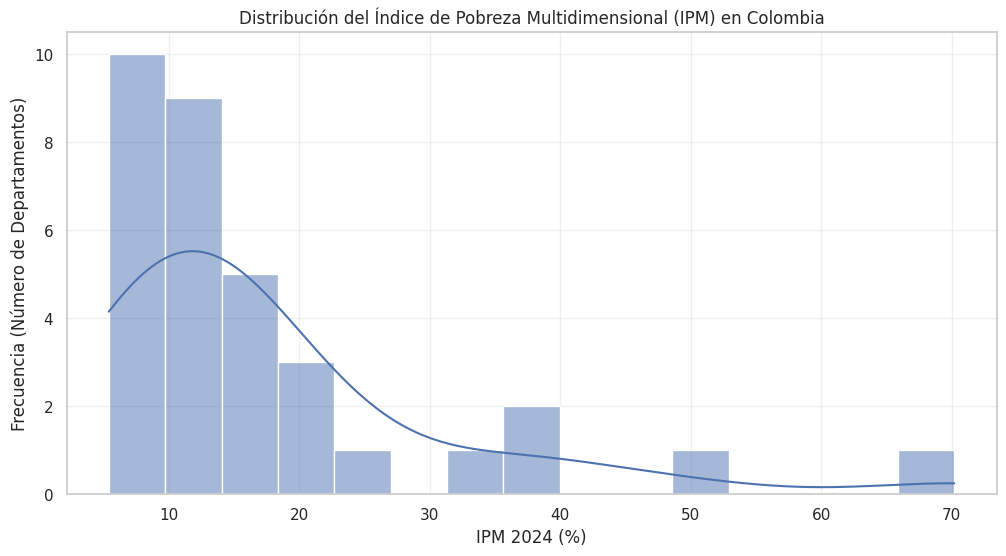

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_ipm['2024_Total'], kde=True, bins=15)
plt.title('Distribución del Índice de Pobreza Multidimensional (IPM) en Colombia')
plt.xlabel('IPM 2024 (%)')
plt.ylabel('Frecuencia (Número de Departamentos)')
plt.grid(True, alpha=0.3)
plt.show()

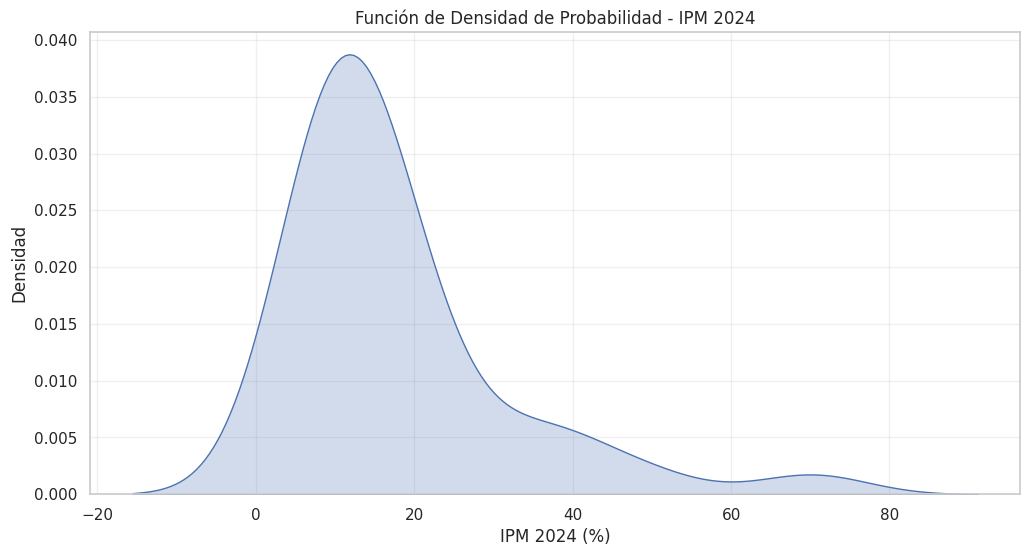

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_ipm['2024_Total'], fill=True)
plt.title('Función de Densidad de Probabilidad - IPM 2024')
plt.xlabel('IPM 2024 (%)')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

###Gráfico de Barras

###mdepartamentos mayores por IPM

/tmp/ipython-input-1282739946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamento', x='2024_Total', palette='Reds_r')


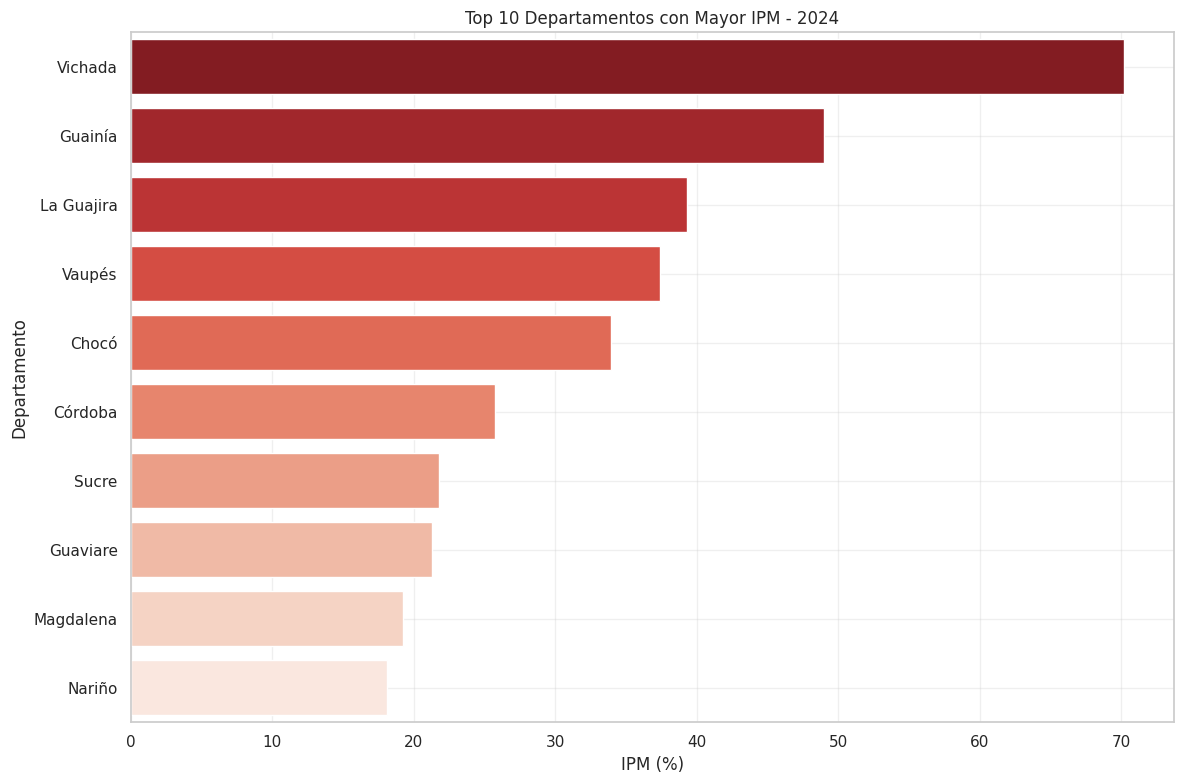

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_ipm.nlargest(10, '2024_Total')
sns.barplot(data=top_10, y='Departamento', x='2024_Total', palette='Reds_r')
plt.title('Top 10 Departamentos con Mayor IPM - 2024')
plt.xlabel('IPM (%)')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### departamentos menores por IPM

/tmp/ipython-input-1721668167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamento', x='2024_Total', palette='Blues_r')


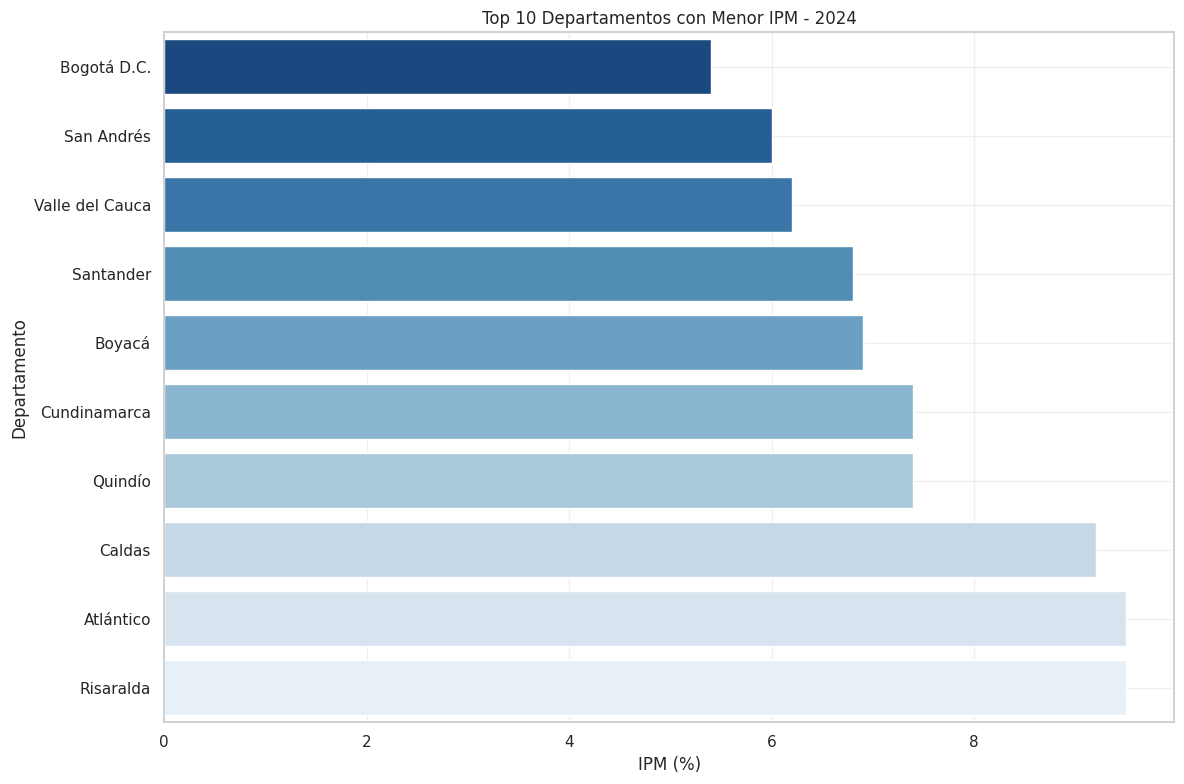

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_ipm.nsmallest(10, '2024_Total')
sns.barplot(data=bottom_10, y='Departamento', x='2024_Total', palette='Blues_r')
plt.title('Top 10 Departamentos con Menor IPM - 2024')
plt.xlabel('IPM (%)')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Boxplot: Identificando la Dispersión y los Outliers

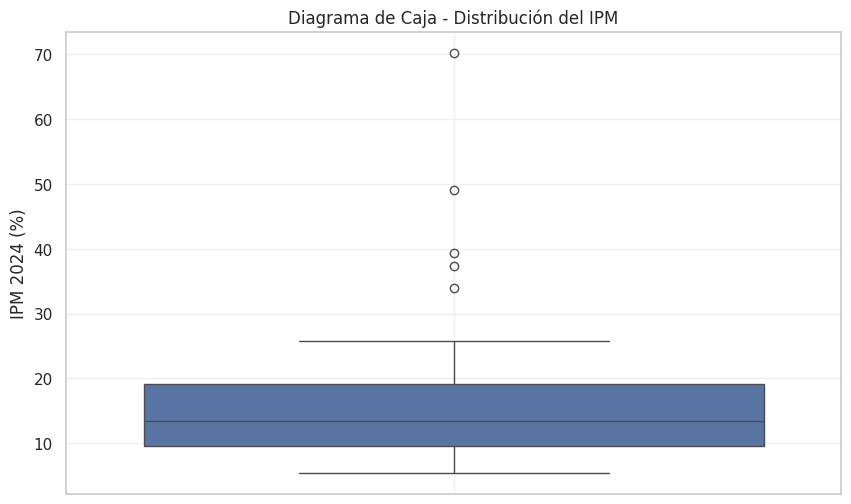

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_ipm['2024_Total'])
plt.title('Diagrama de Caja - Distribución del IPM')
plt.ylabel('IPM 2024 (%)')
plt.grid(True, alpha=0.3)
plt.show()

#3.2.Variables


In [ ]:
df_variables

{'Cuadro 3':           Departamento total hogares hogares con jefe hombre  \
 0             Amazonas            27                      18   
 1            Antioquia          2563                    1322   
 2               Arauca           125                      62   
 3            Atlántico           817                     442   
 4          Bogotá D.C.          3098                    1611   
 5              Bolívar           710                     387   
 6               Boyacá           455                     242   
 7               Caldas           380                     204   
 8              Caquetá           153                      85   
 9             Casanare           165                      87   
 10               Cauca           604                     352   
 11               Cesar           438                     244   
 12             Córdoba           632                     346   
 13        Cundinamarca          1355                     728   
 14          

# 3.2.1.Jefatura femenina o masculina


###Exploración inicial del dataset

In [ ]:
df_variables['Cuadro 3'].shape

(33, 4)

In [ ]:
df_variables['Cuadro 3'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Departamento             33 non-null     object
 1   total hogares            33 non-null     object
 2   hogares con jefe hombre  33 non-null     object
 3   hogares con jefe mujer   33 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


### Análisis de los individuos objeto de estudio

In [ ]:
df_variables['Cuadro 3']['Departamento'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca',
       'Cesar', 'Córdoba', 'Cundinamarca', 'Chocó', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés', 'Santander', 'Sucre', 'Tolima', 'Valle', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_variables['Cuadro 3']['Departamento'].nunique()

33

In [ ]:
df_variables['Cuadro 3']['Departamento'].value_counts()

Departamento
Amazonas              1
Antioquia             1
Arauca                1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Casanare              1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Guainía               1
Guaviare              1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Putumayo              1
Quindío               1
Risaralda             1
San Andrés            1
Santander             1
Sucre                 1
Tolima                1
Valle                 1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 3'].dtypes)
print("\n")


TIPOS DE DATOS ACTUALES:
Departamento               object
total hogares              object
hogares con jefe hombre    object
hogares con jefe mujer     object
dtype: object




In [ ]:
# Convertir columnas a numéricas
df_variables['Cuadro 3']['total hogares'] = pd.to_numeric(df_variables['Cuadro 3']['total hogares'], errors='coerce')
df_variables['Cuadro 3']['hogares con jefe hombre'] = pd.to_numeric(df_variables['Cuadro 3']['hogares con jefe hombre'], errors='coerce')
df_variables['Cuadro 3']['hogares con jefe mujer'] = pd.to_numeric(df_variables['Cuadro 3']['hogares con jefe mujer'], errors='coerce')


In [ ]:
# Verificar la conversión
print("TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:")
print(df_variables['Cuadro 3'].dtypes)
print("\n")

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:
Departamento               object
total hogares               int64
hogares con jefe hombre     int64
hogares con jefe mujer      int64
dtype: object




In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_variables['Cuadro 3'].describe().round(1))


Estadísticas Descriptivas (1 decimal):
       total hogares  hogares con jefe hombre  hogares con jefe mujer
count           33.0                     33.0                    33.0
mean           560.3                    299.9                   260.4
std            691.4                    358.6                   333.4
min             15.0                      9.0                     3.0
25%            161.0                     87.0                    68.0
50%            390.0                    213.0                   175.0
75%            611.0                    346.0                   271.0
max           3098.0                   1611.0                  1488.0


#### Histograma y Gráfico de Densidad

¿Cómo se distribuye los hogares con jefatura femenina o masculina?

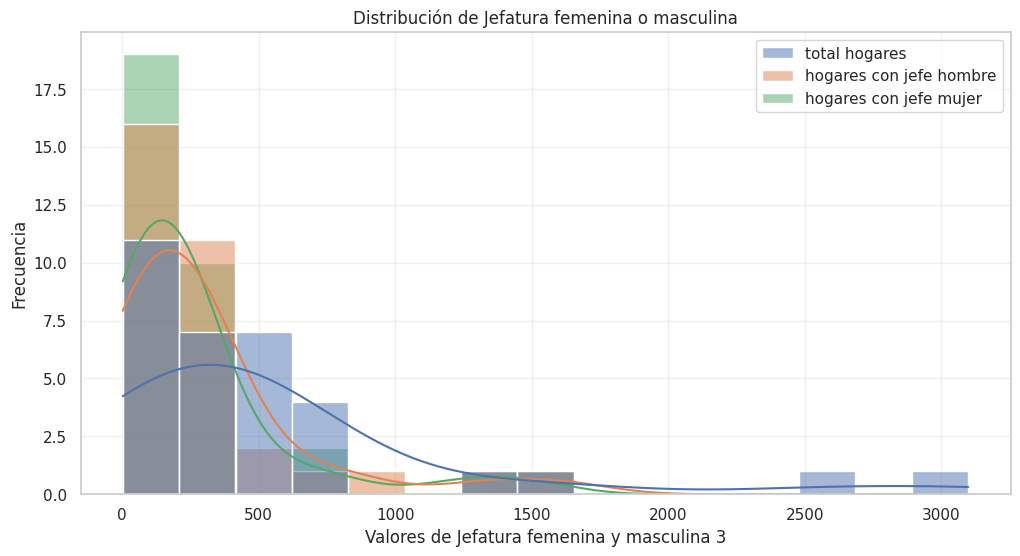

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_variables['Cuadro 3'], kde=True, bins=15)
plt.title('Distribución de Jefatura femenina o masculina')
plt.xlabel('Valores de Jefatura femenina y masculina 3')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

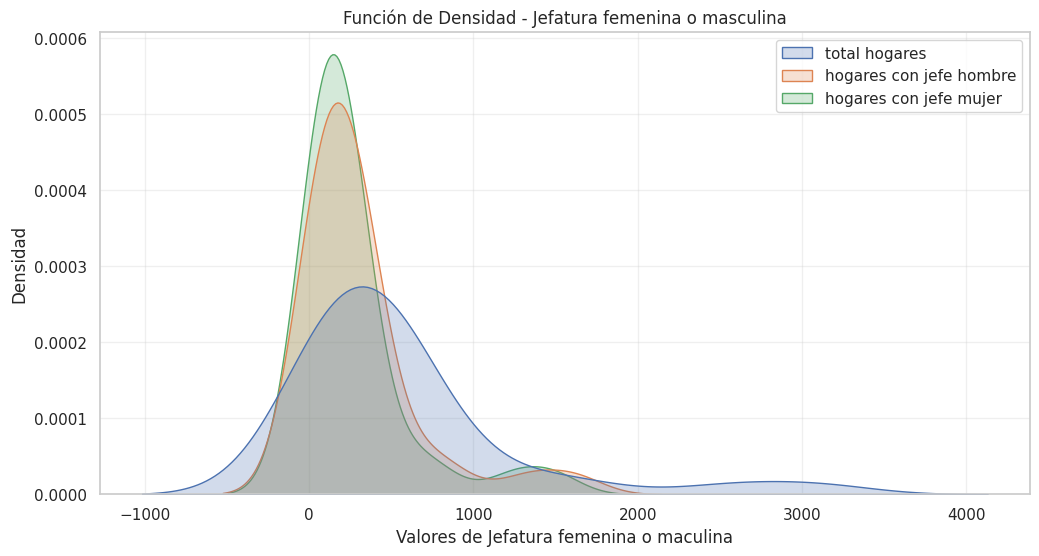

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_variables['Cuadro 3'], fill=True)
plt.title('Función de Densidad - Jefatura femenina o masculina')
plt.xlabel('Valores de Jefatura femenina o maculina')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

###Gráfico de Barras

### departamentos mayores por jefe hombre/mujer





/tmp/ipython-input-2204354895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamento', x='hogares con jefe hombre', palette='Reds_r')


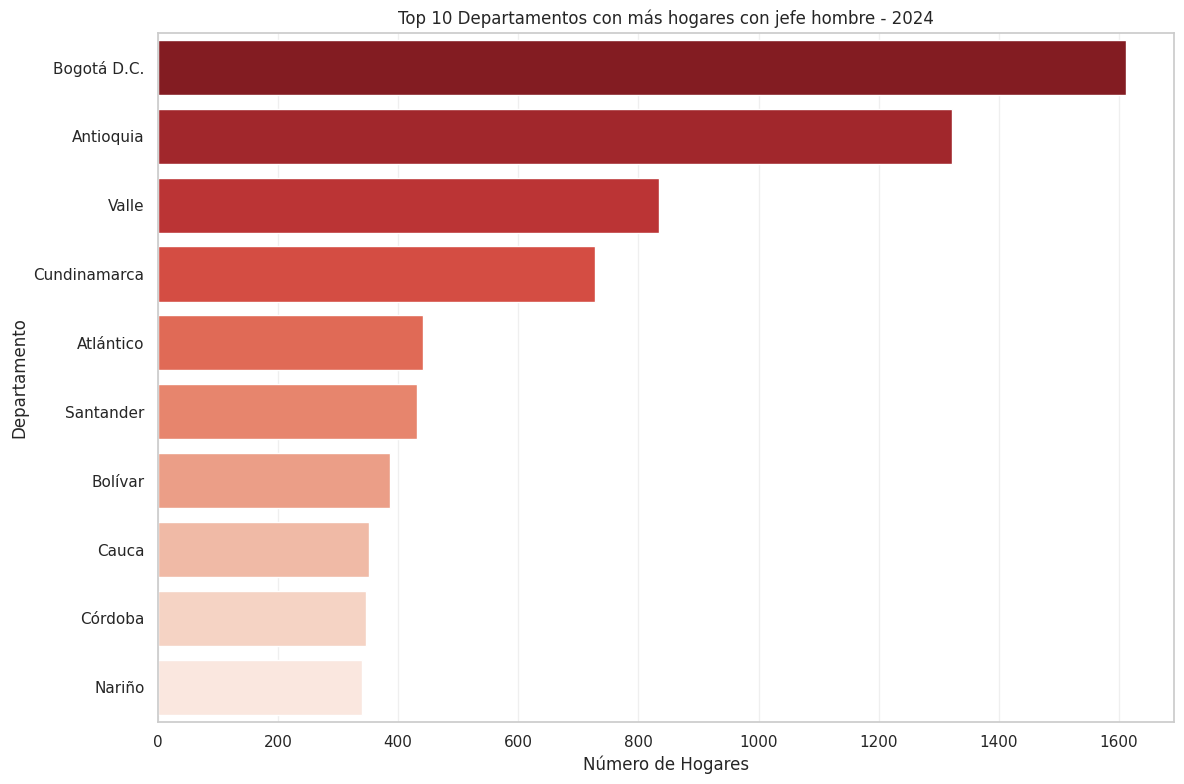

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 3'].nlargest(10, 'hogares con jefe hombre')
sns.barplot(data=top_10, y='Departamento', x='hogares con jefe hombre', palette='Reds_r')
plt.title('Top 10 Departamentos con más hogares con jefe hombre - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2593374398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamento', x='hogares con jefe mujer', palette='Reds_r')


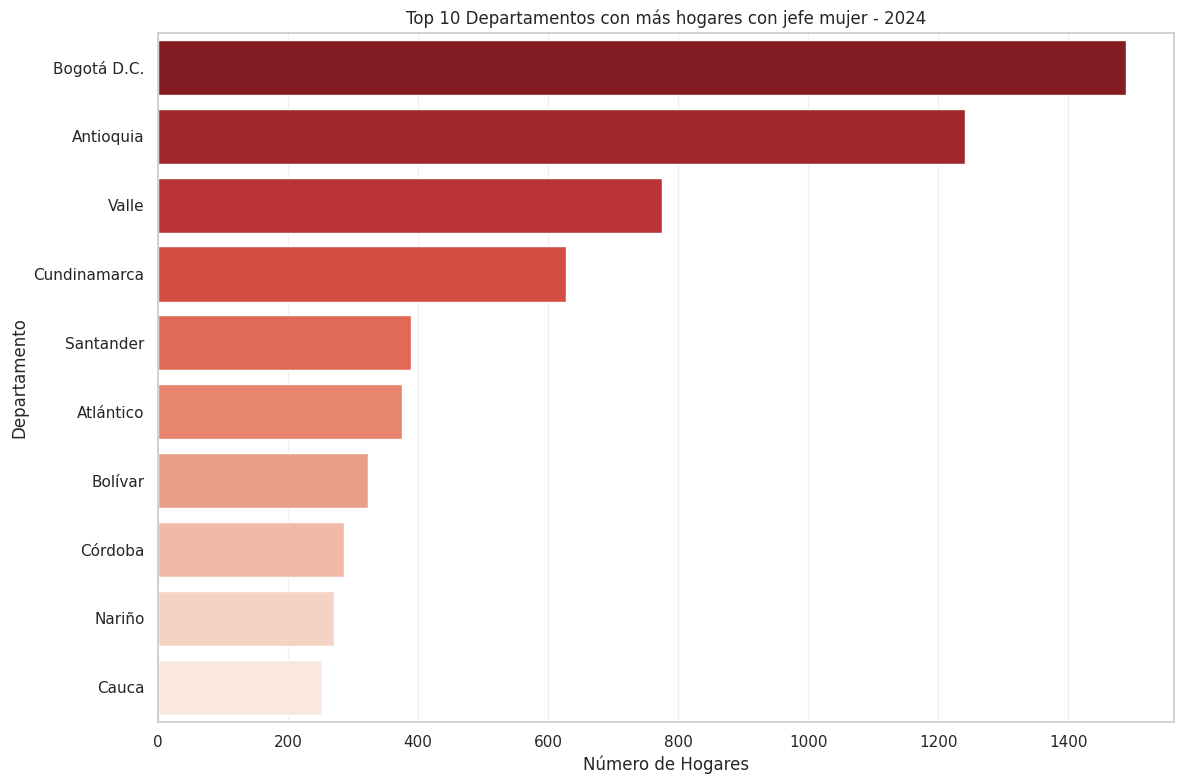

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 3'].nlargest(10, 'hogares con jefe mujer')
sns.barplot(data=top_10, y='Departamento', x='hogares con jefe mujer', palette='Reds_r')
plt.title('Top 10 Departamentos con más hogares con jefe mujer - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### departamentos menores por jefe jefe hombre/mujer

/tmp/ipython-input-4285597849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamento', x='hogares con jefe hombre', palette='Blues_r')


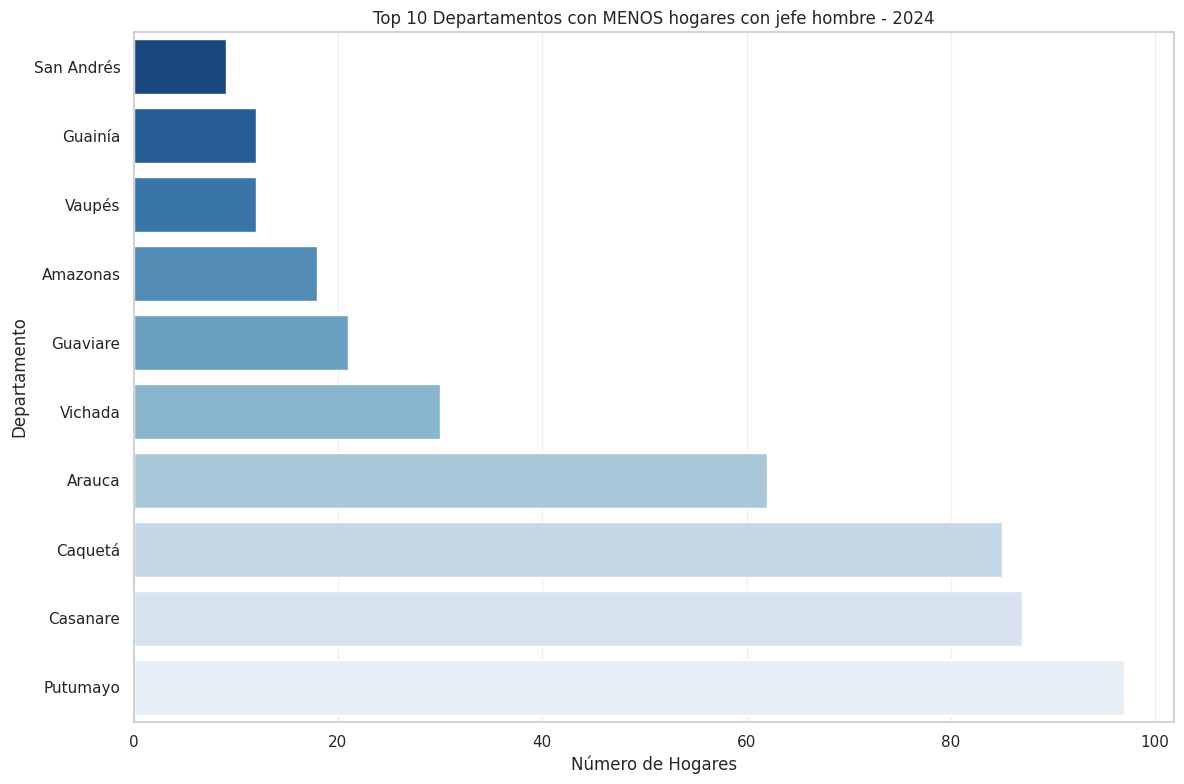

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 3'].nsmallest(10, 'hogares con jefe hombre')
sns.barplot(data=bottom_10, y='Departamento', x='hogares con jefe hombre', palette='Blues_r')
plt.title('Top 10 Departamentos con MENOS hogares con jefe hombre - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4016951536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamento', x='hogares con jefe mujer', palette='Blues_r')


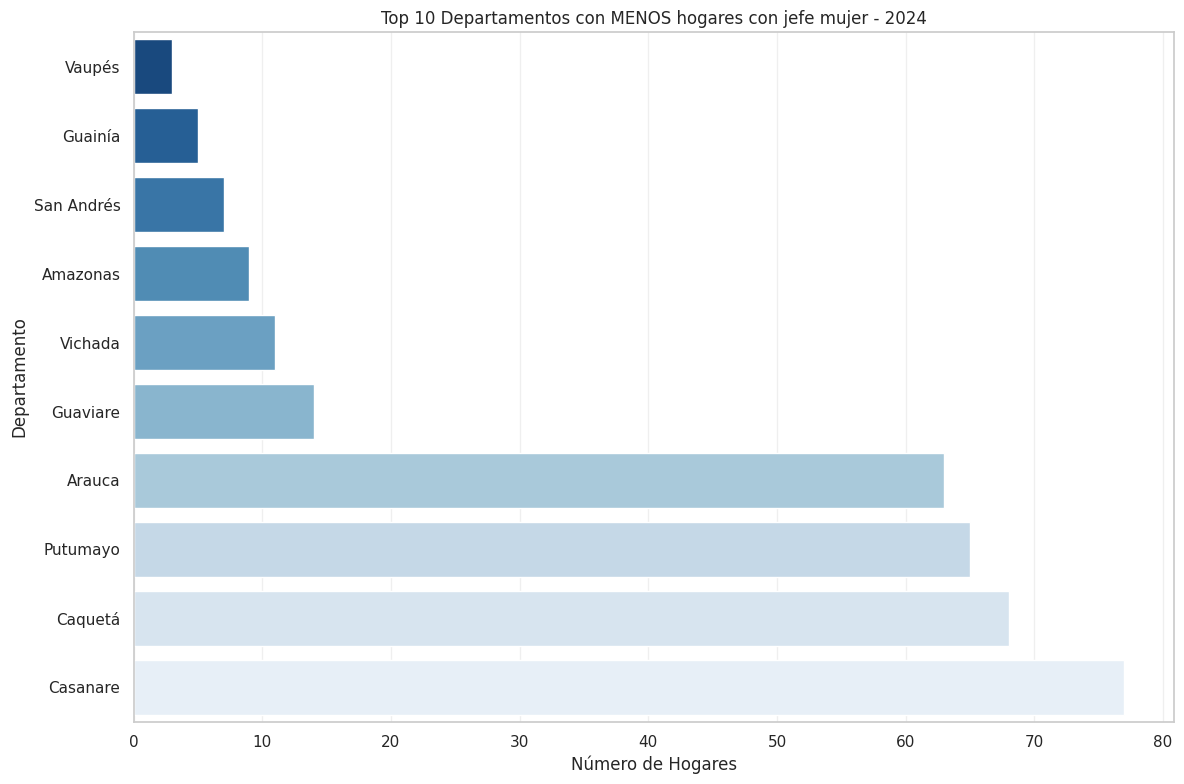

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 3'].nsmallest(10, 'hogares con jefe mujer')
sns.barplot(data=bottom_10, y='Departamento', x='hogares con jefe mujer', palette='Blues_r')
plt.title('Top 10 Departamentos con MENOS hogares con jefe mujer - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Boxplot: Identificando la Dispersión y los Outliers

<Figure size 1800x1000 with 0 Axes>

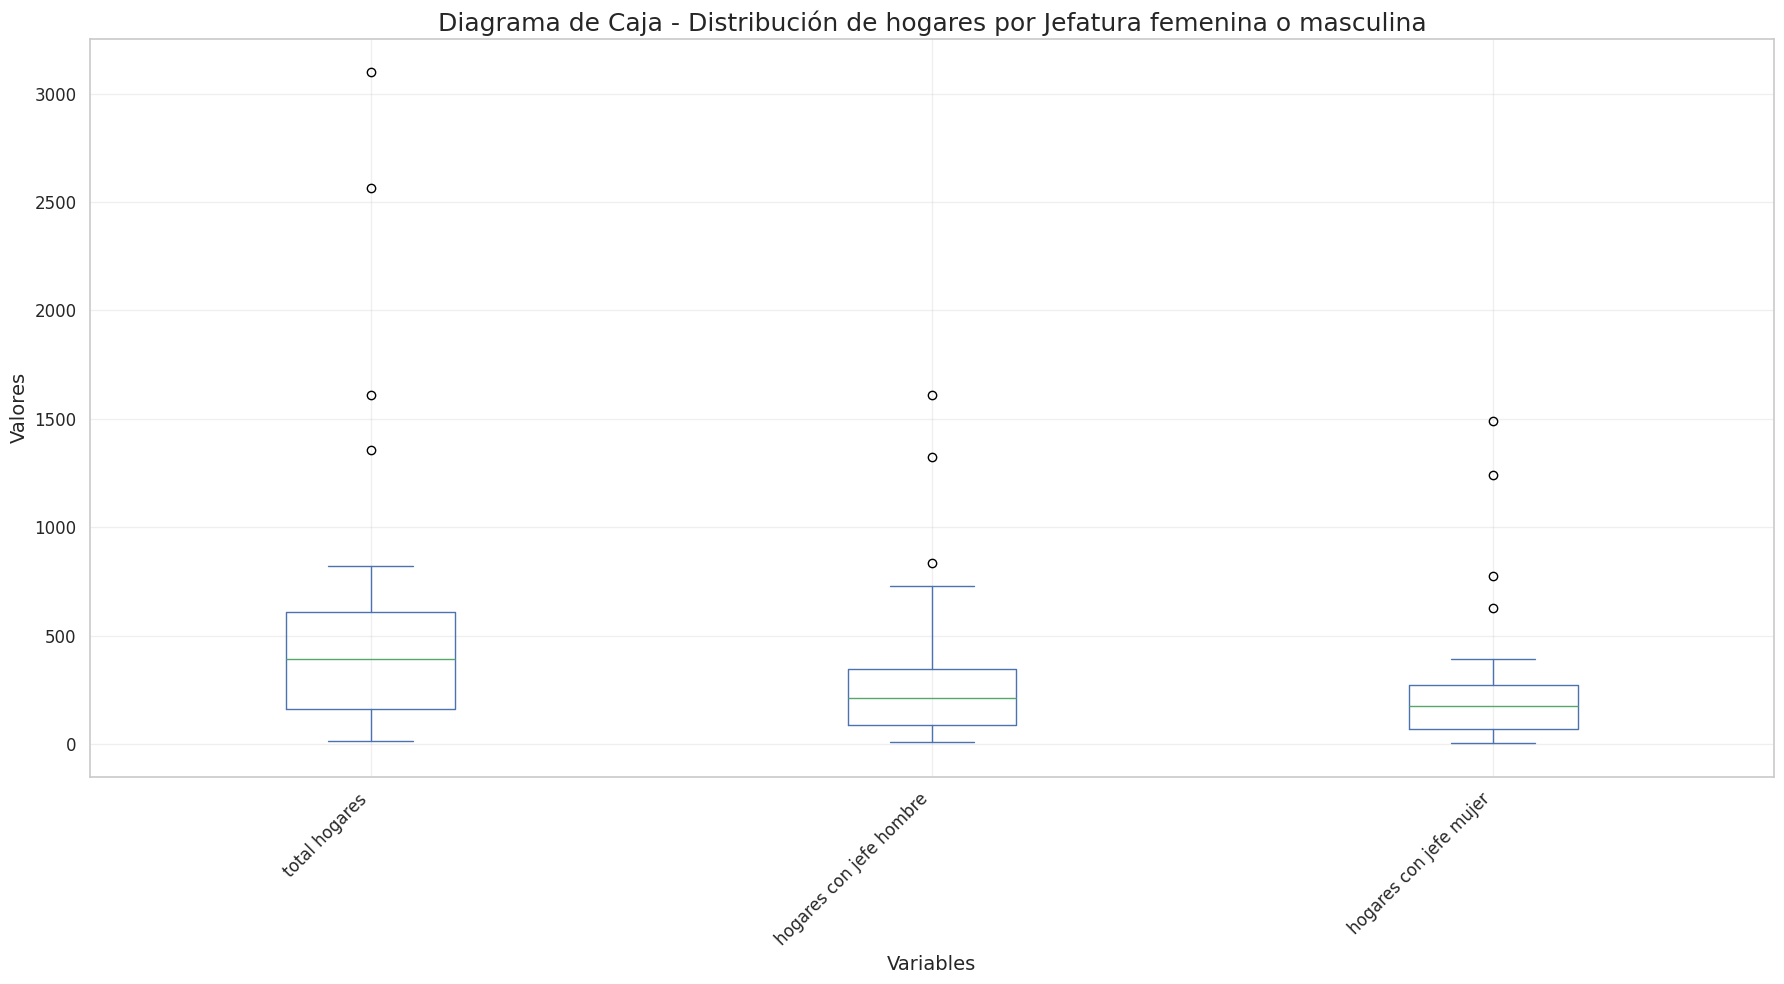

In [ ]:
plt.figure(figsize=(18,10))

df_variables['Cuadro 3'].plot(
    kind='box',
    figsize=(18,10),
    fontsize=12
)

plt.title('Diagrama de Caja - Distribución de hogares por Jefatura femenina o masculina', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Rotar etiquetas en X (si es necesario)
plt.xticks(rotation=45, ha='right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# 3.2.2.Hogares por acceso a servicioos públicos

###Exploración inicial del dataset

In [ ]:
df_variables['Cuadro 4'].shape

(33, 7)

In [ ]:
df_variables['Cuadro 4'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Departamentos                33 non-null     object
 1   total Hogares                33 non-null     object
 2   total Energia                33 non-null     object
 3   total Gas Natural            33 non-null     object
 4   Total Acueducto              33 non-null     object
 5   Total Alcantarillado         33 non-null     object
 6   Total Recolección de Basura  33 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


### Análisis de los individuos objeto de estudio

In [ ]:
df_variables['Cuadro 4']['Departamentos'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca',
       'Cesar', 'Córdoba', 'Cundinamarca', 'Chocó', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés', 'Santander', 'Sucre', 'Tolima', 'Valle', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_variables['Cuadro 4']['Departamentos'].nunique()

33

In [ ]:
df_variables['Cuadro 4']['Departamentos'].value_counts()

Departamentos
Amazonas              1
Antioquia             1
Arauca                1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Casanare              1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Guainía               1
Guaviare              1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Putumayo              1
Quindío               1
Risaralda             1
San Andrés            1
Santander             1
Sucre                 1
Tolima                1
Valle                 1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 4'].dtypes)
print("\n")


TIPOS DE DATOS ACTUALES:
Departamentos                  object
total Hogares                  object
total Energia                  object
total Gas Natural              object
Total Acueducto                object
Total Alcantarillado           object
Total Recolección de Basura    object
dtype: object




In [ ]:
 # Convertir columnas numéricas
df_variables['Cuadro 4']['total Hogares'] = pd.to_numeric(df_variables['Cuadro 4']['total Hogares'], errors='coerce')
df_variables['Cuadro 4']['total Energia'] = pd.to_numeric(df_variables['Cuadro 4']['total Energia'], errors='coerce')
df_variables['Cuadro 4']['total Gas Natural'] = pd.to_numeric(df_variables['Cuadro 4']['total Gas Natural'], errors='coerce')
df_variables['Cuadro 4']['Total Acueducto'] = pd.to_numeric(df_variables['Cuadro 4']['Total Acueducto'], errors='coerce')
df_variables['Cuadro 4']['Total Alcantarillado'] = pd.to_numeric(df_variables['Cuadro 4']['Total Alcantarillado'], errors='coerce')
df_variables['Cuadro 4']['Total Recolección de Basura'] = pd.to_numeric(df_variables['Cuadro 4']['Total Recolección de Basura'], errors='coerce')


In [ ]:
# Verificar la conversión
print("TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:")
print(df_variables['Cuadro 4'].dtypes)
print("\n")

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:
Departamentos                  object
total Hogares                   int64
total Energia                   int64
total Gas Natural               int64
Total Acueducto                 int64
Total Alcantarillado            int64
Total Recolección de Basura     int64
dtype: object




In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_variables['Cuadro 4'].describe().round(1))

Estadísticas Descriptivas (1 decimal):
       total Hogares  total Energia  total Gas Natural  Total Acueducto  \
count           33.0           33.0               33.0             33.0   
mean           560.3          554.0              397.0            505.1   
std            691.4          692.8              607.9            680.4   
min             15.0           14.0                0.0              4.0   
25%            161.0          151.0               28.0             90.0   
50%            390.0          389.0              274.0            352.0   
75%            611.0          610.0              323.0            464.0   
max           3098.0         3095.0             2945.0           3094.0   

       Total Alcantarillado  Total Recolección de Basura  
count                  33.0                         33.0  
mean                  426.9                        468.6  
std                   650.2                        677.4  
min                     0.0                      

#### Histograma y Gráfico de Densidad

¿Cómo se distribuye los hogares con acceso a servicios publicos?

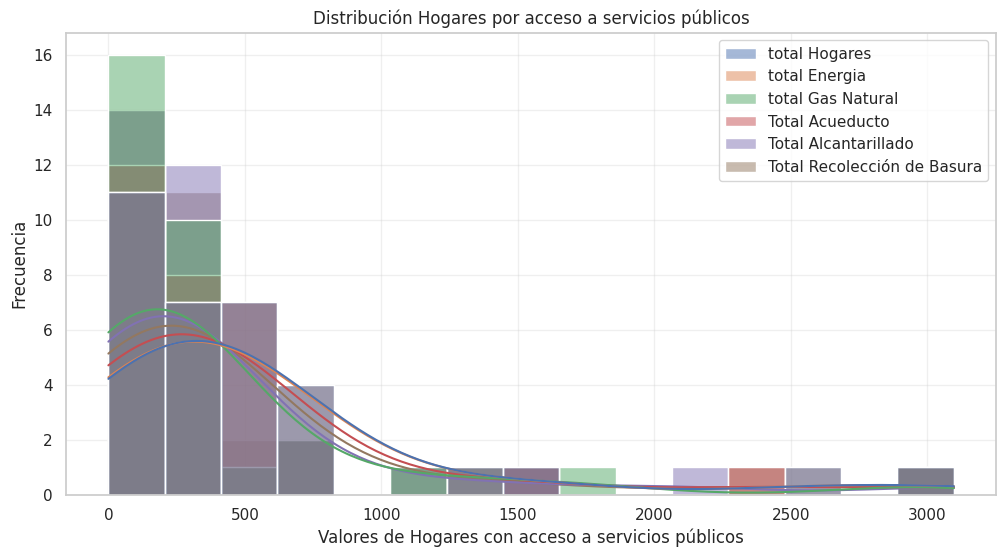

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_variables['Cuadro 4'], kde=True, bins=15)
plt.title('Distribución Hogares por acceso a servicios públicos')
plt.xlabel('Valores de Hogares con acceso a servicios públicos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

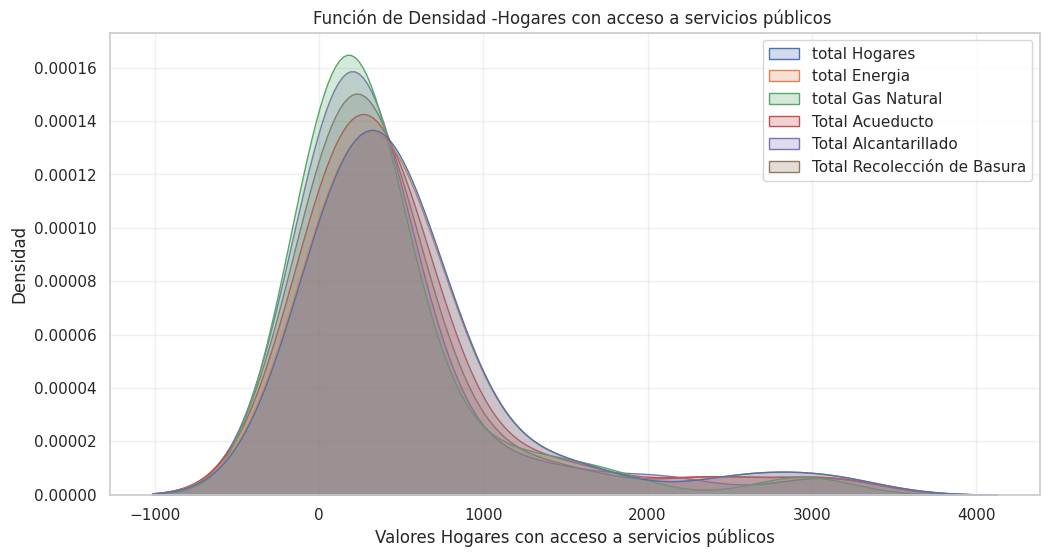

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_variables['Cuadro 4'], fill=True)
plt.title('Función de Densidad -Hogares con acceso a servicios públicos ')
plt.xlabel('Valores Hogares con acceso a servicios públicos')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

### Gráfico de Barras

### departamentos mayores por acceso a servicios públicos

/tmp/ipython-input-3657340977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='total Energia', palette='Greens_r')


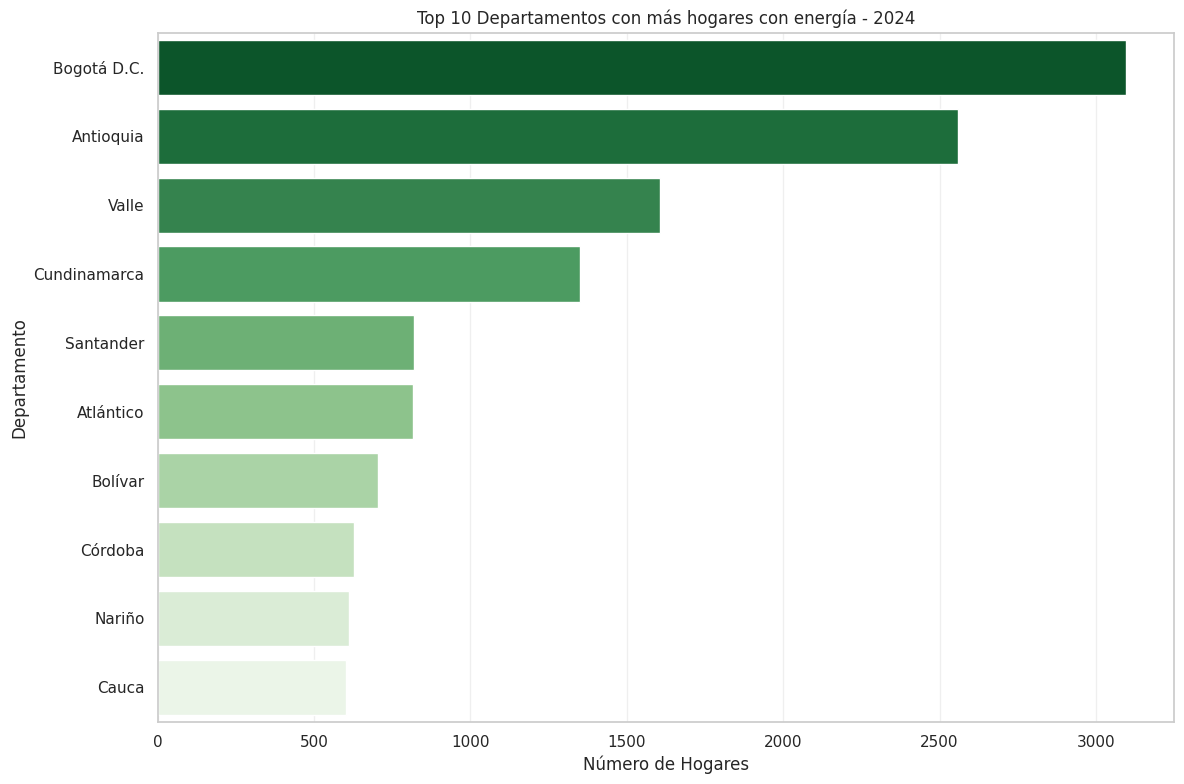

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 4'].nlargest(10, 'total Energia')
sns.barplot(data=top_10, y='Departamentos', x='total Energia', palette='Greens_r')
plt.title('Top 10 Departamentos con más hogares con energía - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3633894387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='total Gas Natural', palette='Oranges_r')


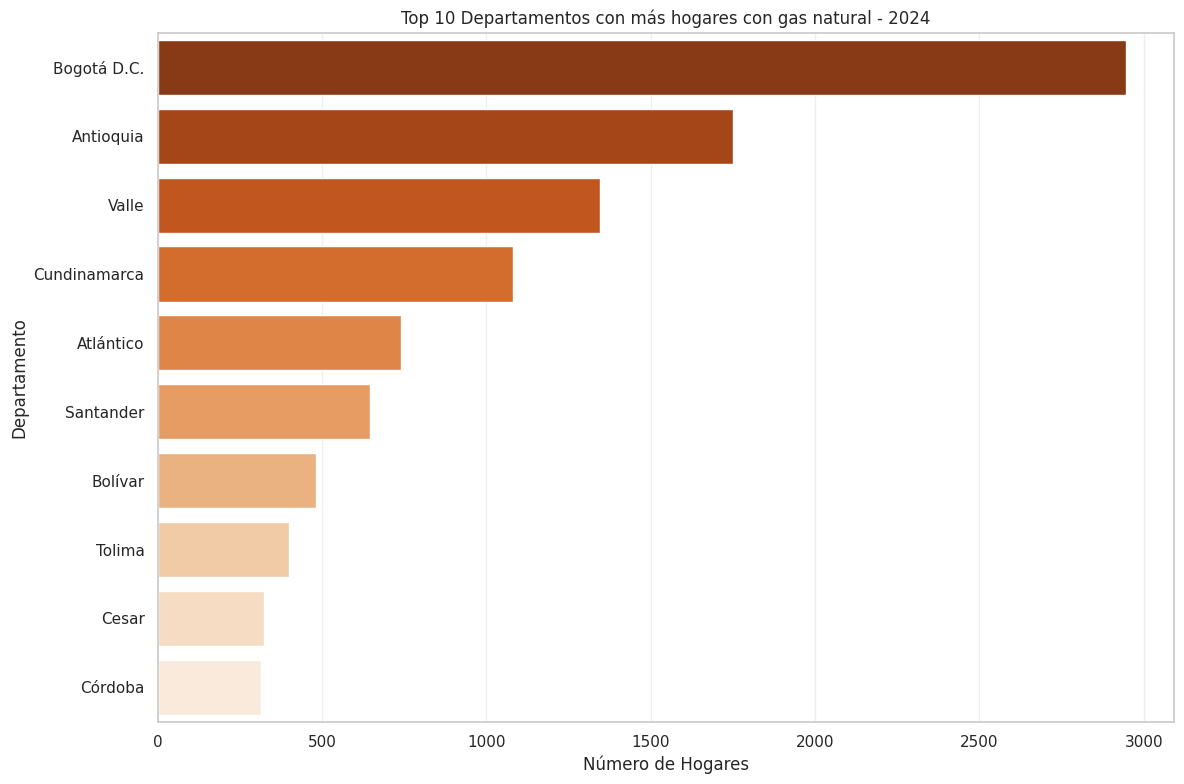

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 4'].nlargest(10, 'total Gas Natural')
sns.barplot(data=top_10, y='Departamentos', x='total Gas Natural', palette='Oranges_r')
plt.title('Top 10 Departamentos con más hogares con gas natural - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1762875581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Total Acueducto', palette='Purples_r')


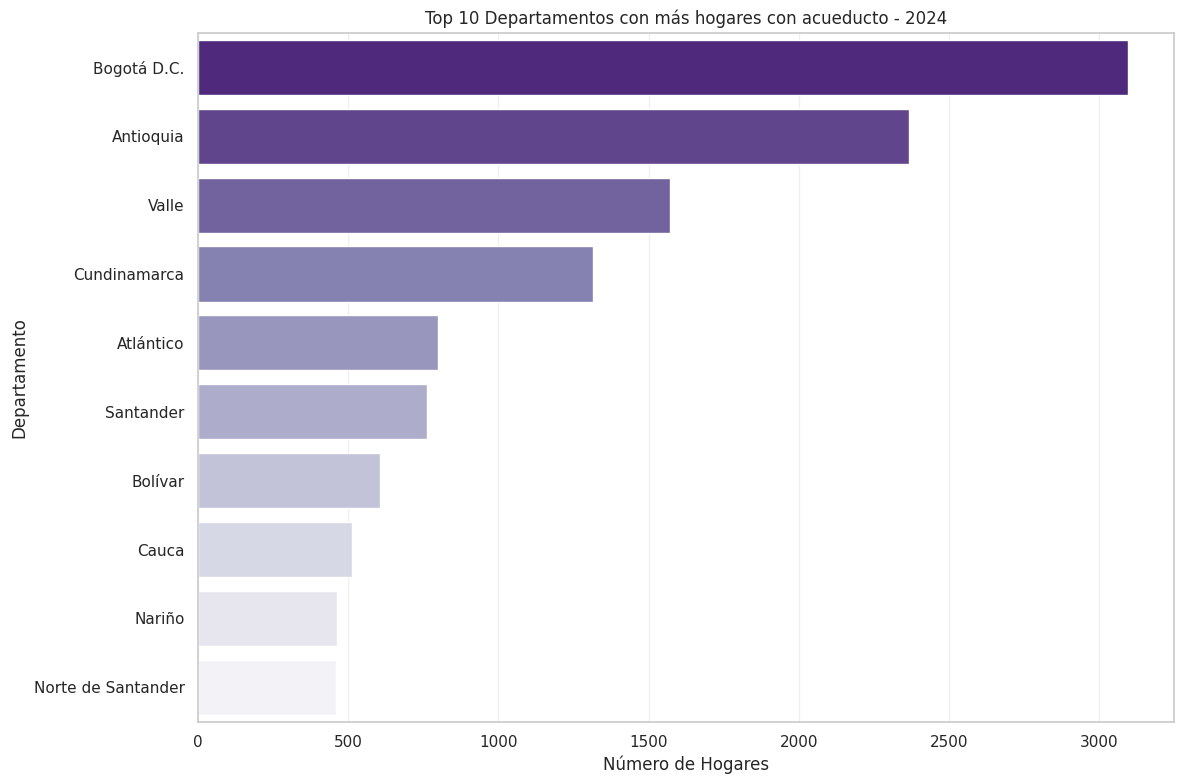

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 4'].nlargest(10, 'Total Acueducto')
sns.barplot(data=top_10, y='Departamentos', x='Total Acueducto', palette='Purples_r')
plt.title('Top 10 Departamentos con más hogares con acueducto - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2170173908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Total Alcantarillado', palette='Blues_r')


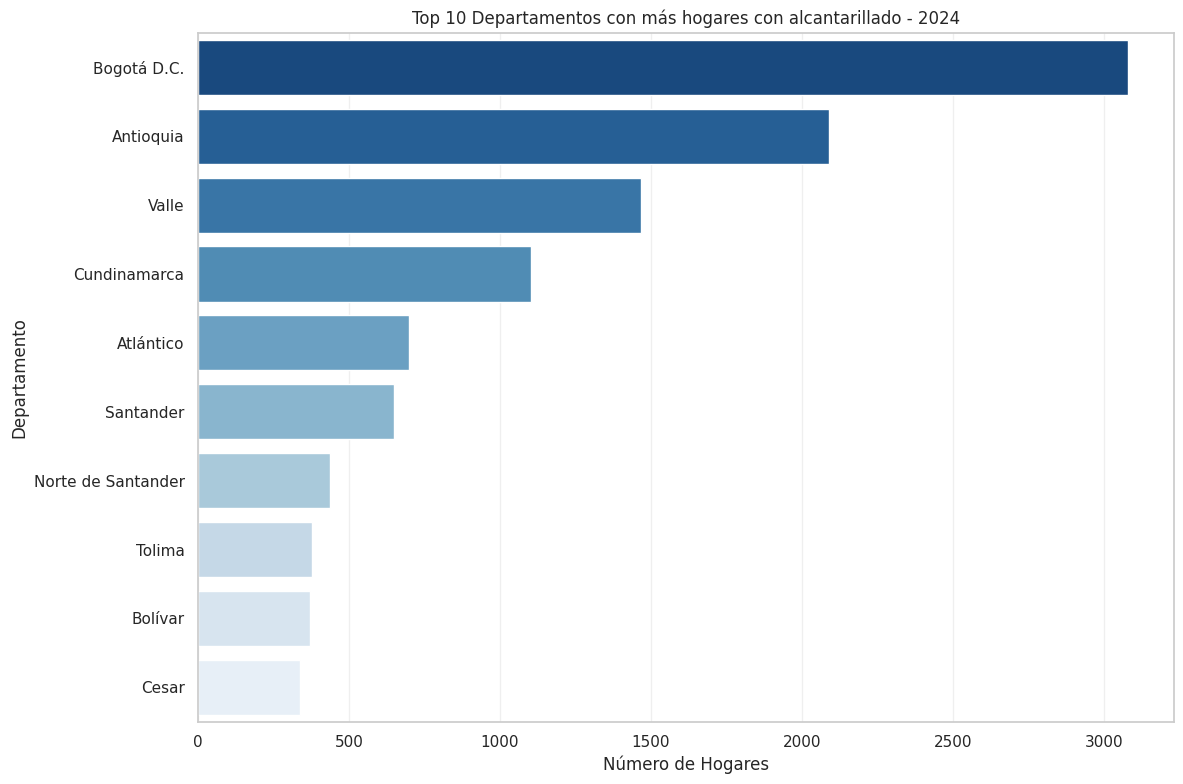

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 4'].nlargest(10, 'Total Alcantarillado')
sns.barplot(data=top_10, y='Departamentos', x='Total Alcantarillado', palette='Blues_r')
plt.title('Top 10 Departamentos con más hogares con alcantarillado - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1957240708.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Total Recolección de Basura', palette='Greens_r')


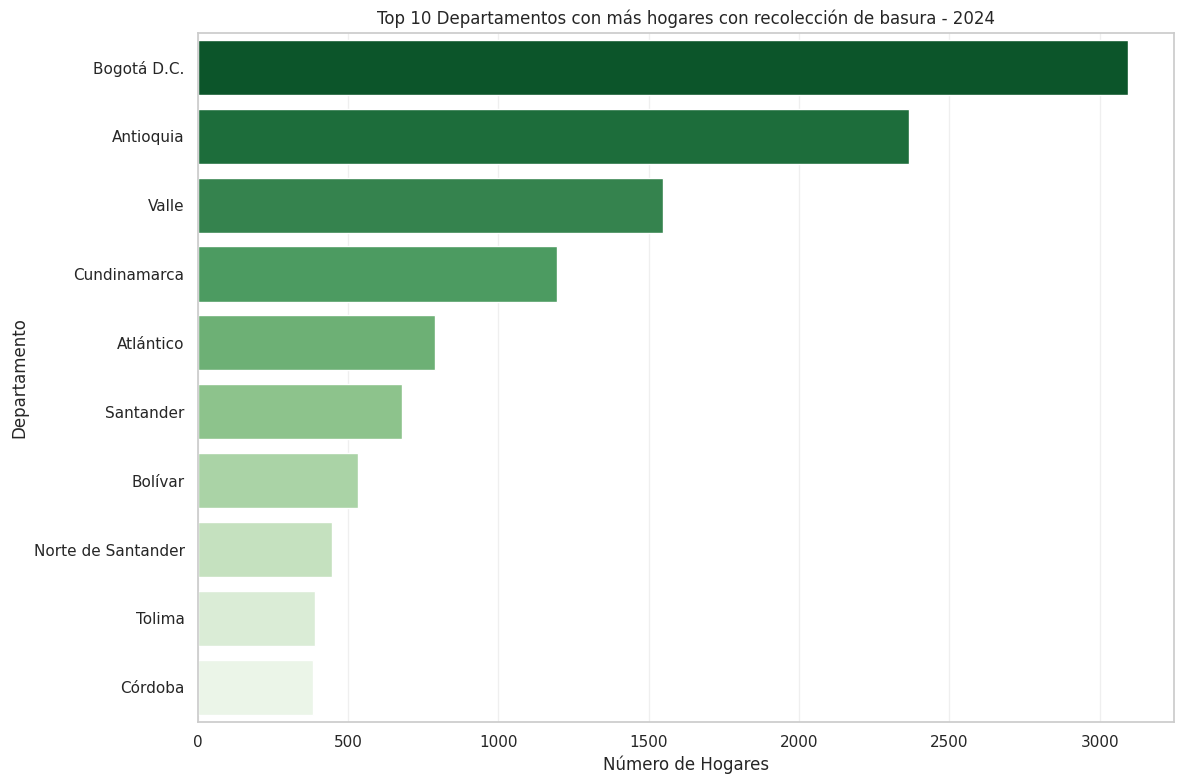

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 4'].nlargest(10, 'Total Recolección de Basura')
sns.barplot(data=top_10, y='Departamentos', x='Total Recolección de Basura', palette='Greens_r')
plt.title('Top 10 Departamentos con más hogares con recolección de basura - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### departamentos menores por acceso a servicios públicos

/tmp/ipython-input-3937757248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='total Energia', palette='Reds_r')


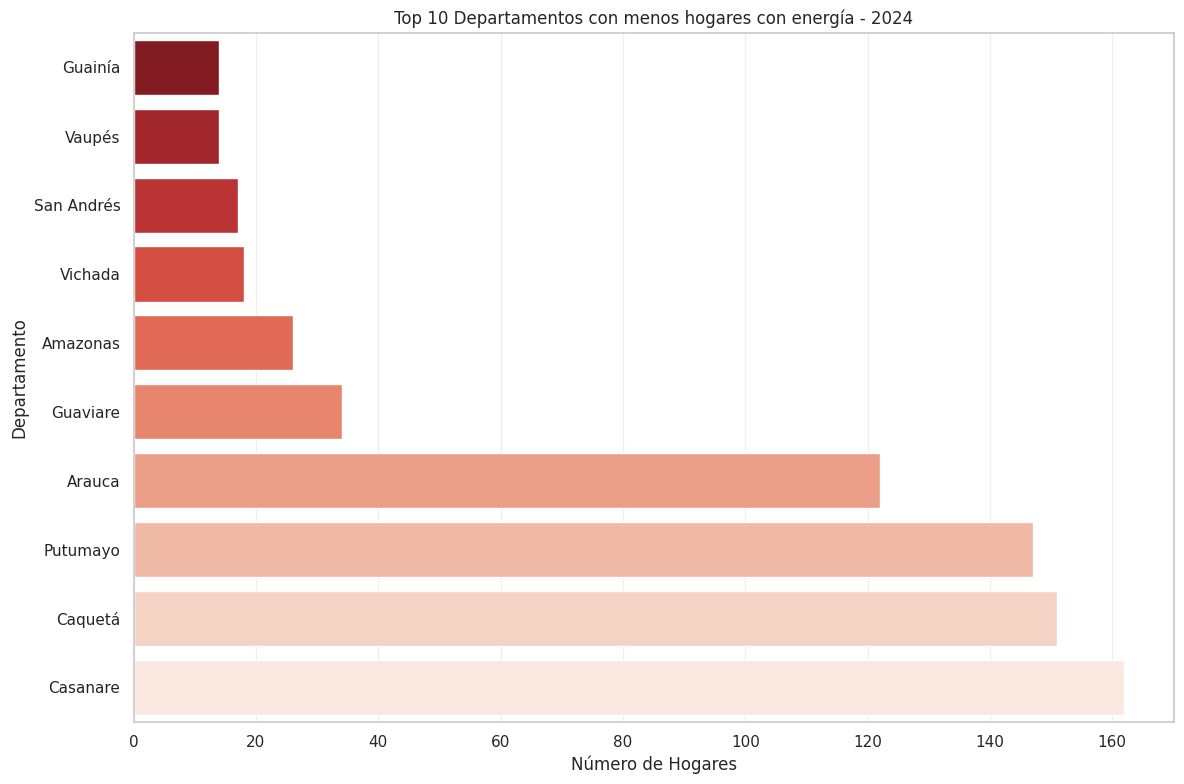

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 4'].nsmallest(10, 'total Energia')
sns.barplot(data=bottom_10, y='Departamentos', x='total Energia', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con energía - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-632376612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='total Gas Natural', palette='Reds_r')


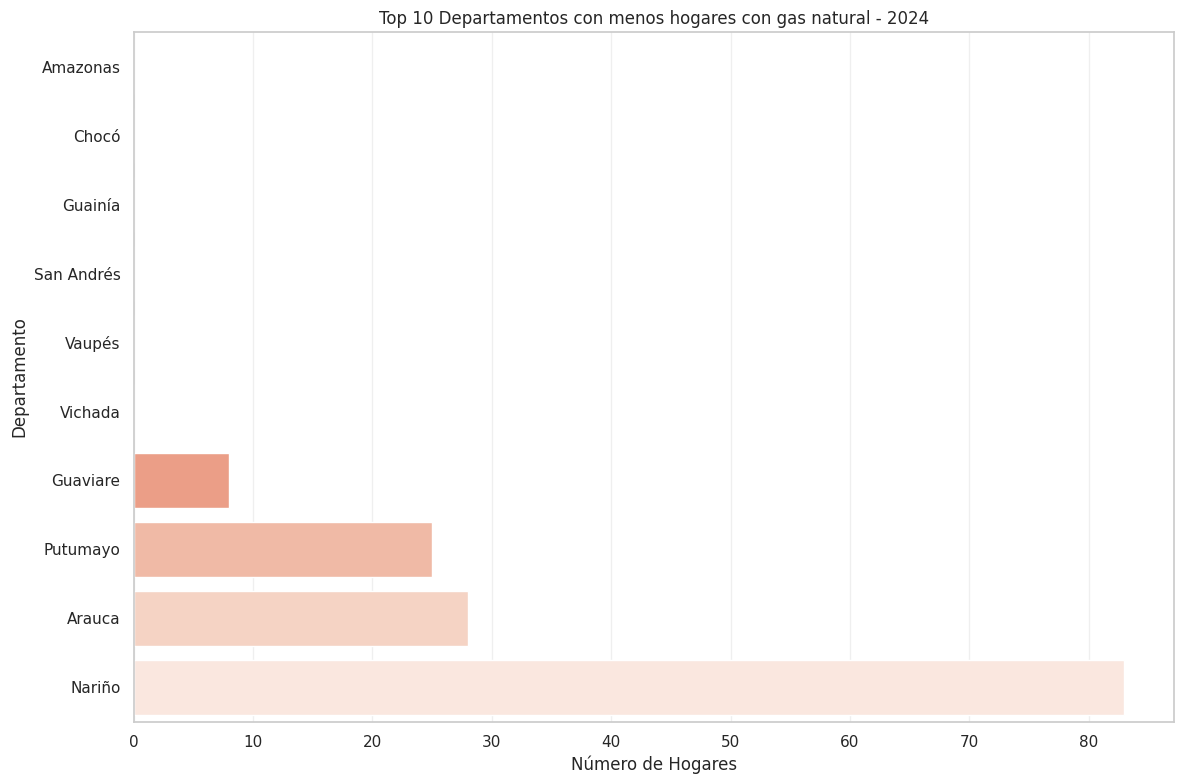

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 4'].nsmallest(10, 'total Gas Natural')
sns.barplot(data=bottom_10, y='Departamentos', x='total Gas Natural', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con gas natural - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2172271759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Total Acueducto', palette='Reds_r')


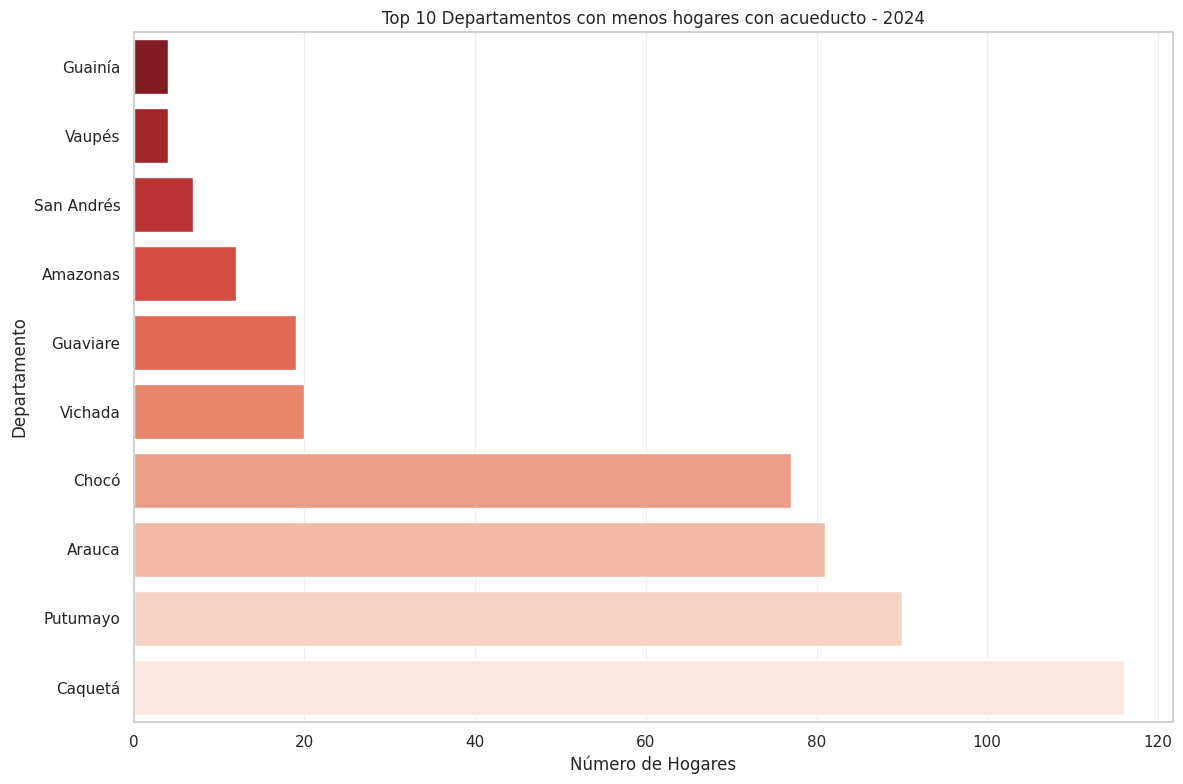

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 4'].nsmallest(10, 'Total Acueducto')
sns.barplot(data=bottom_10, y='Departamentos', x='Total Acueducto', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con acueducto - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3240082472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Total Alcantarillado', palette='Reds_r')


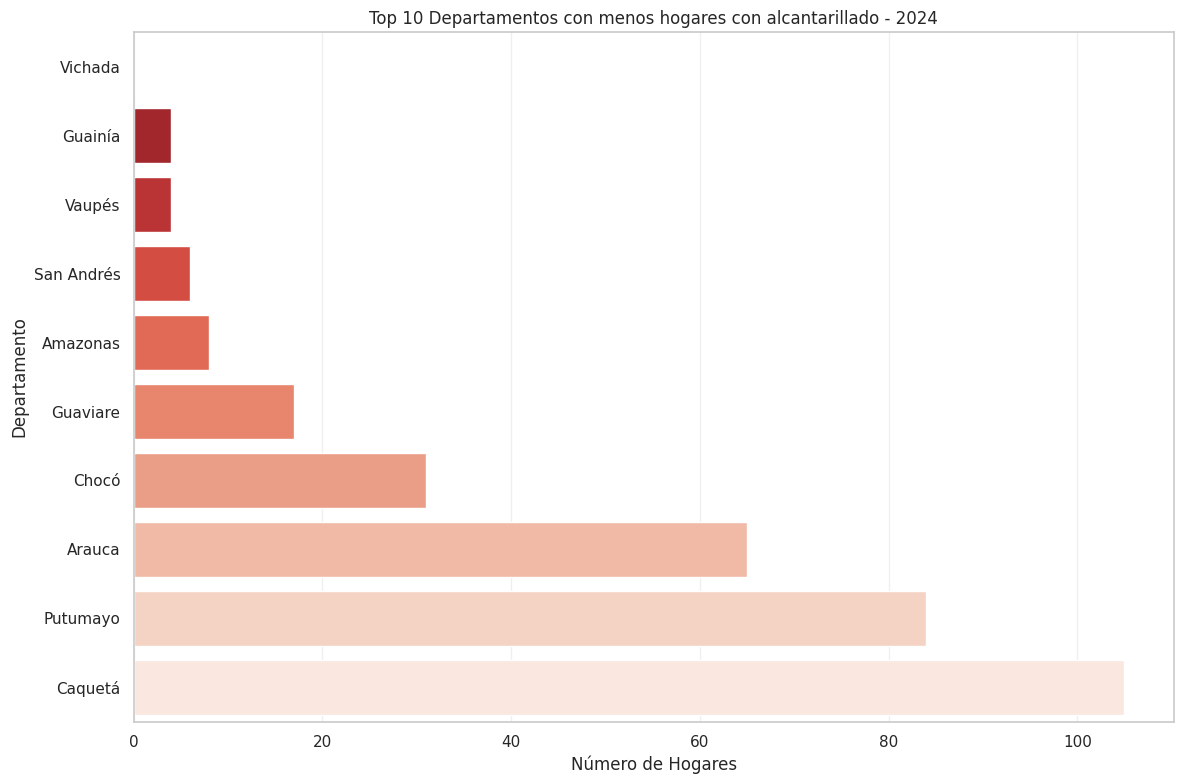

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 4'].nsmallest(10, 'Total Alcantarillado')
sns.barplot(data=bottom_10, y='Departamentos', x='Total Alcantarillado', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con alcantarillado - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3127085166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Total Recolección de Basura', palette='Reds_r')


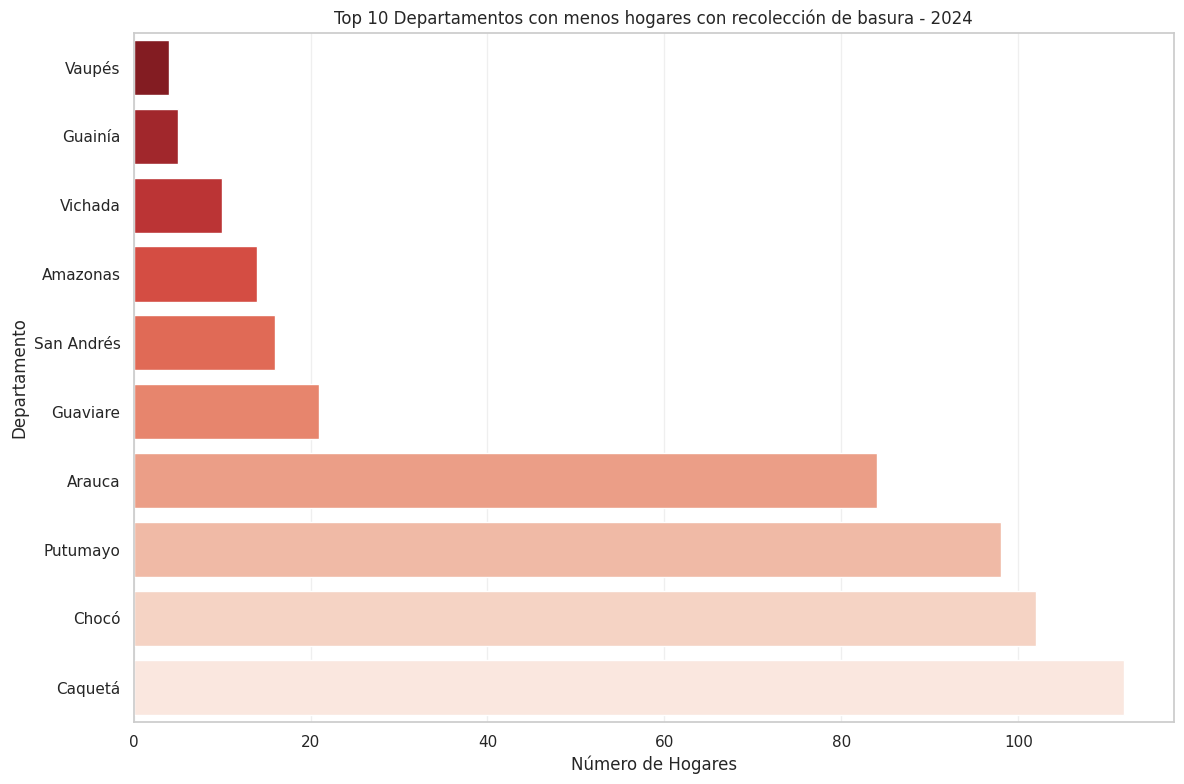

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 4'].nsmallest(10, 'Total Recolección de Basura')
sns.barplot(data=bottom_10, y='Departamentos', x='Total Recolección de Basura', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con recolección de basura - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Boxplot: Identificando la Dispersión y los Outliers

<Figure size 1800x1000 with 0 Axes>

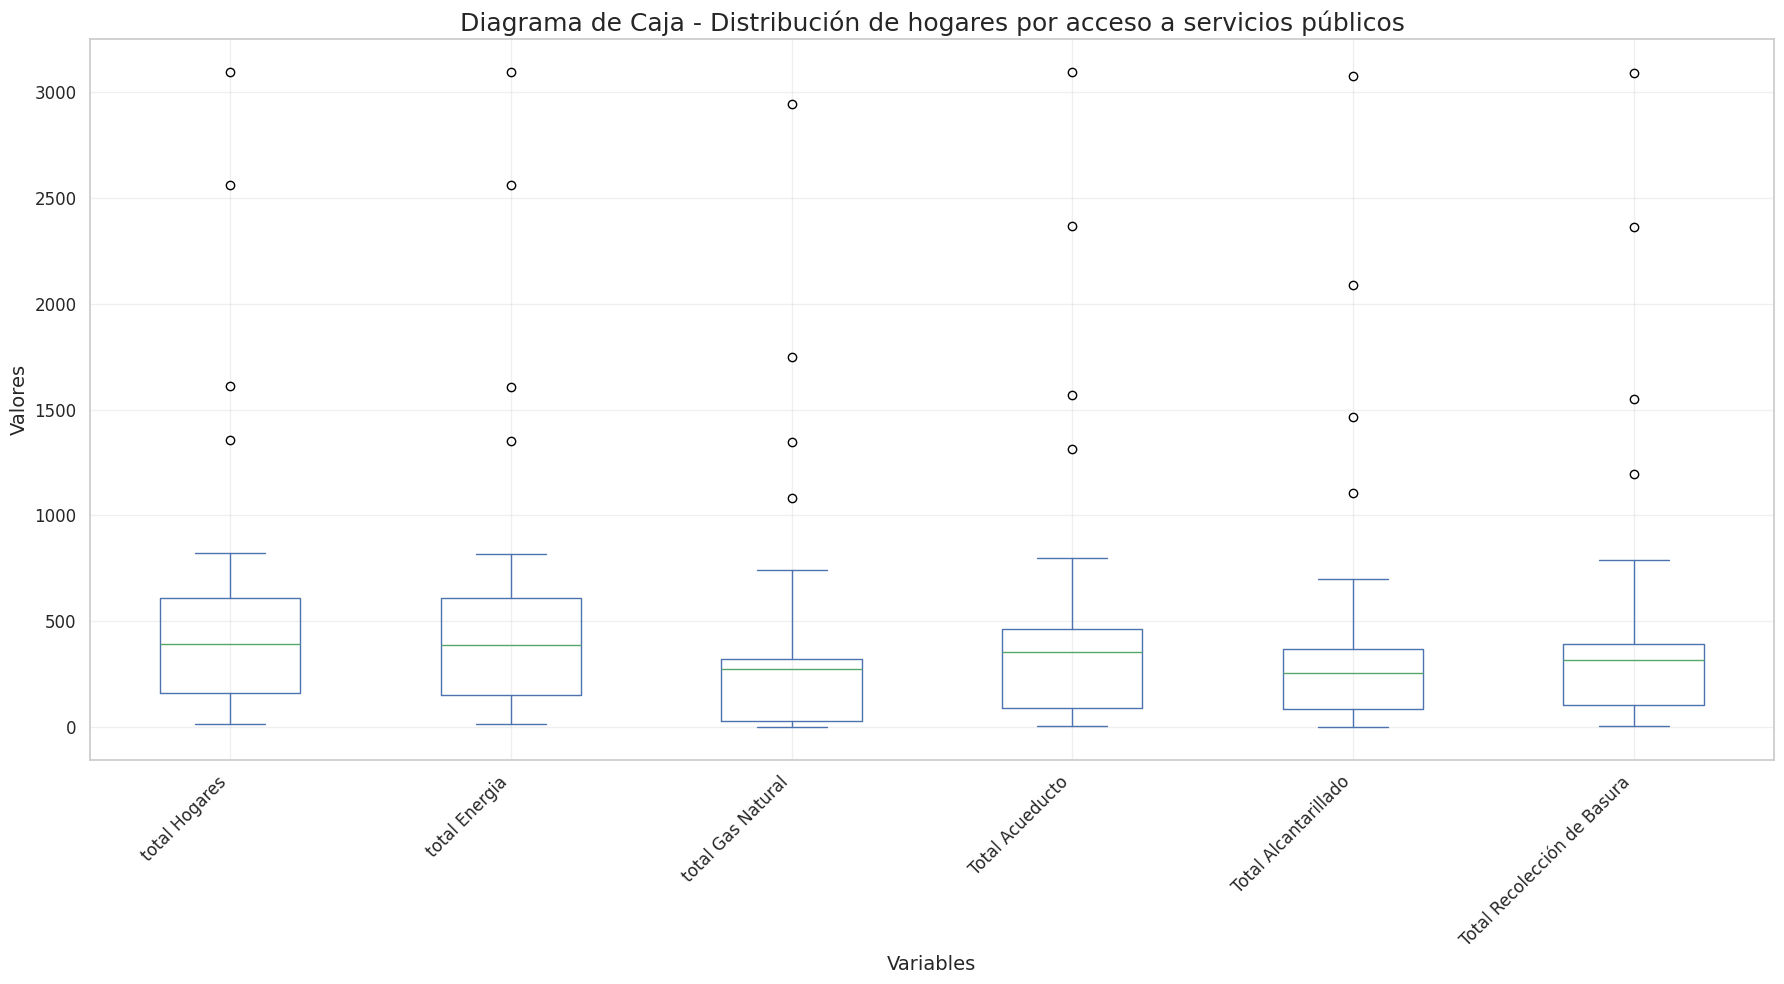

In [ ]:
plt.figure(figsize=(18,10))

df_variables['Cuadro 4'].plot(
    kind='box',
    figsize=(18,10),
    fontsize=12
)

plt.title('Diagrama de Caja - Distribución de hogares por acceso a servicios públicos', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Rotar etiquetas en X (si es necesario)
plt.xticks(rotation=45, ha='right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2.3.Hogares con acceso a internet

###Exploración inicial del dataset

In [ ]:
df_variables['Cuadro 5'].shape

(33, 6)

In [ ]:
df_variables['Cuadro 5'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Departamentos          33 non-null     object
 1   total hogares          33 non-null     object
 2   total Internet         33 non-null     object
 3   total Tipo fijo        33 non-null     object
 4   Total Tipo Movil       33 non-null     object
 5   Total Tipo Fijo-Movil  33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


### Análisis de los individuos objeto de estudio

In [ ]:
df_variables['Cuadro 5']['Departamentos'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca',
       'Cesar', 'Córdoba', 'Cundinamarca', 'Chocó', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés', 'Santander', 'Sucre', 'Tolima', 'Valle', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_variables['Cuadro 5']['Departamentos'].nunique()

33

In [ ]:
df_variables['Cuadro 5']['Departamentos'].value_counts()

Departamentos
Amazonas              1
Antioquia             1
Arauca                1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Casanare              1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Guainía               1
Guaviare              1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Putumayo              1
Quindío               1
Risaralda             1
San Andrés            1
Santander             1
Sucre                 1
Tolima                1
Valle                 1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 5'].dtypes)
print("\n")

TIPOS DE DATOS ACTUALES:
Departamentos            object
total hogares            object
total Internet           object
total Tipo fijo          object
Total Tipo Movil         object
Total Tipo Fijo-Movil    object
dtype: object




In [ ]:
 # Convertir columnas numéricas
df_variables['Cuadro 5']['total hogares'] = pd.to_numeric(df_variables['Cuadro 5']['total hogares'], errors='coerce')
df_variables['Cuadro 5']['total Internet'] = pd.to_numeric(df_variables['Cuadro 5']['total Internet'], errors='coerce')
df_variables['Cuadro 5']['total Tipo fijo'] = pd.to_numeric(df_variables['Cuadro 5']['total Tipo fijo'], errors='coerce')
df_variables['Cuadro 5']['Total Tipo Movil'] = pd.to_numeric(df_variables['Cuadro 5']['Total Tipo Movil'], errors='coerce')
df_variables['Cuadro 5']['Total Tipo Fijo-Movil'] = pd.to_numeric(df_variables['Cuadro 5']['Total Tipo Fijo-Movil'], errors='coerce')


In [ ]:
# Verificar la conversión
print("TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:")
print(df_variables['Cuadro 5'].dtypes)
print("\n")

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:
Departamentos            object
total hogares             int64
total Internet            int64
total Tipo fijo           int64
Total Tipo Movil          int64
Total Tipo Fijo-Movil     int64
dtype: object




In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_variables['Cuadro 5'].describe().round(1))

Estadísticas Descriptivas (1 decimal):
       total hogares  total Internet  total Tipo fijo  Total Tipo Movil  \
count           33.0            33.0             33.0              33.0   
mean           560.3           367.8            270.6             230.9   
std            691.4           533.1            446.1             316.0   
min             15.0             4.0              0.0               4.0   
25%            161.0            62.0             39.0              40.0   
50%            390.0           261.0            155.0             169.0   
75%            611.0           334.0            229.0             243.0   
max           3098.0          2562.0           2075.0            1634.0   

       Total Tipo Fijo-Movil  
count                   33.0  
mean                   133.7  
std                    225.0  
min                      0.0  
25%                     14.0  
50%                     67.0  
75%                    138.0  
max                   1148.0  


#### Histograma y Gráfico de Densidad

¿Cómo se distribuye los hogares con acceso a internet?

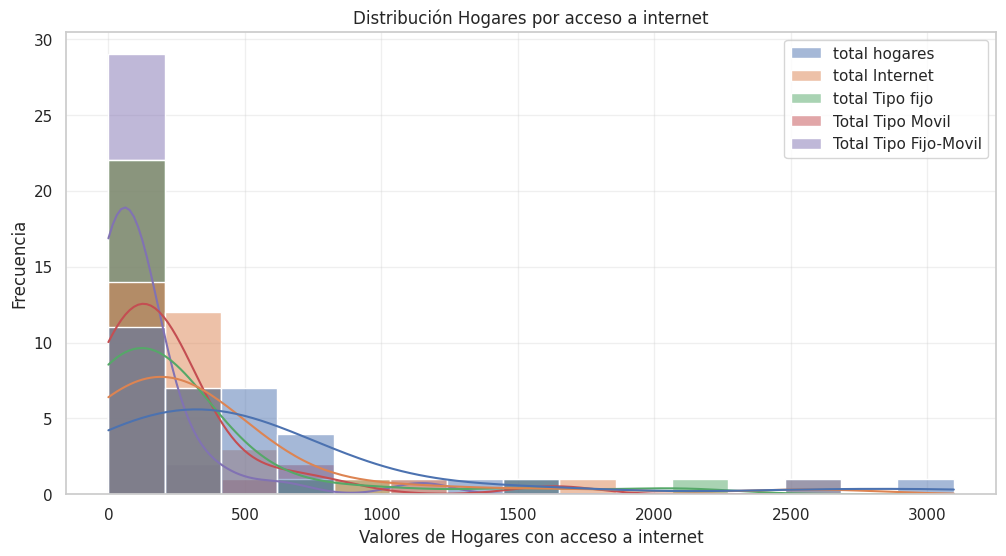

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_variables['Cuadro 5'], kde=True, bins=15)
plt.title('Distribución Hogares por acceso a internet')
plt.xlabel('Valores de Hogares con acceso a internet')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

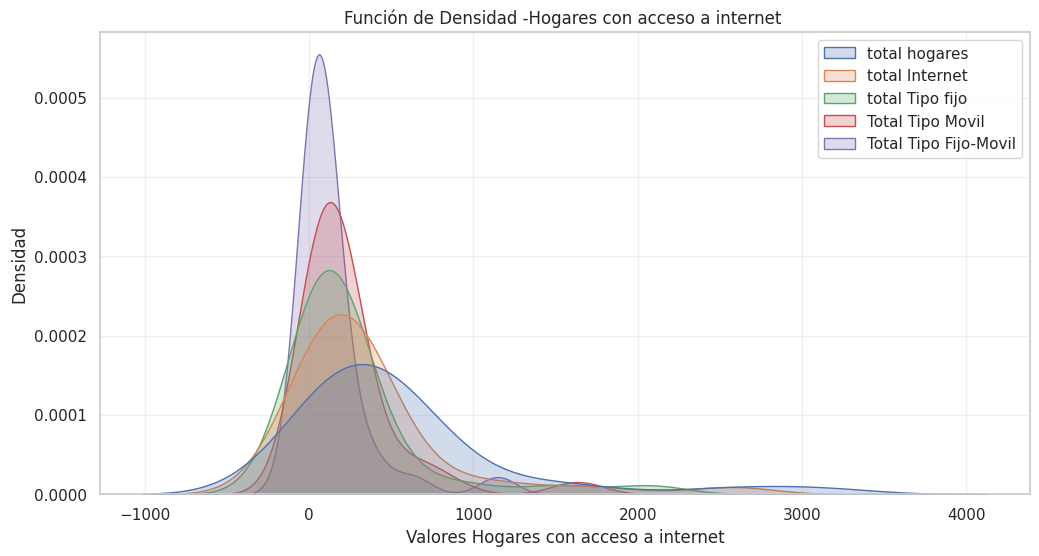

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_variables['Cuadro 5'], fill=True)
plt.title('Función de Densidad -Hogares con acceso a internet ')
plt.xlabel('Valores Hogares con acceso a internet')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

### Gráfico de Barras

 ### departamentos mayores por acceso a internet

/tmp/ipython-input-987451522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='total Internet', palette='Greens_r')


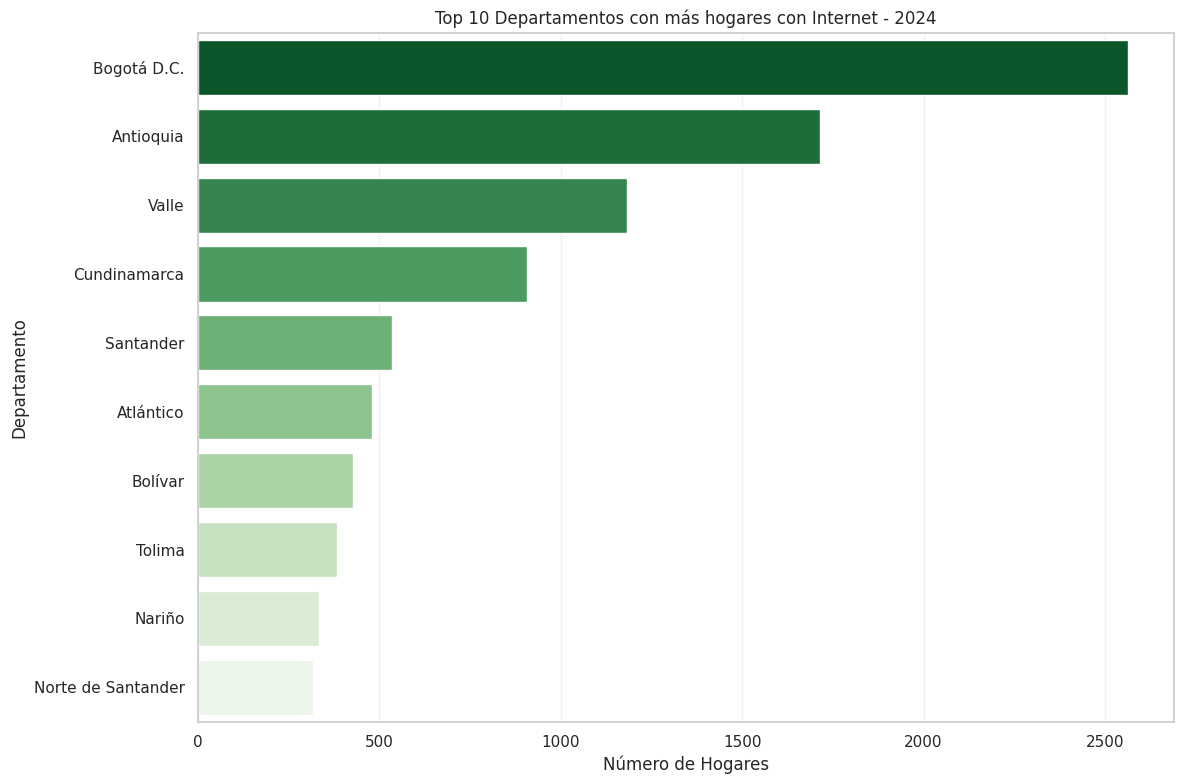

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 5'].nlargest(10, 'total Internet')
sns.barplot(data=top_10, y='Departamentos', x='total Internet', palette='Greens_r')
plt.title('Top 10 Departamentos con más hogares con Internet - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4135861985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='total Tipo fijo', palette='Oranges_r')


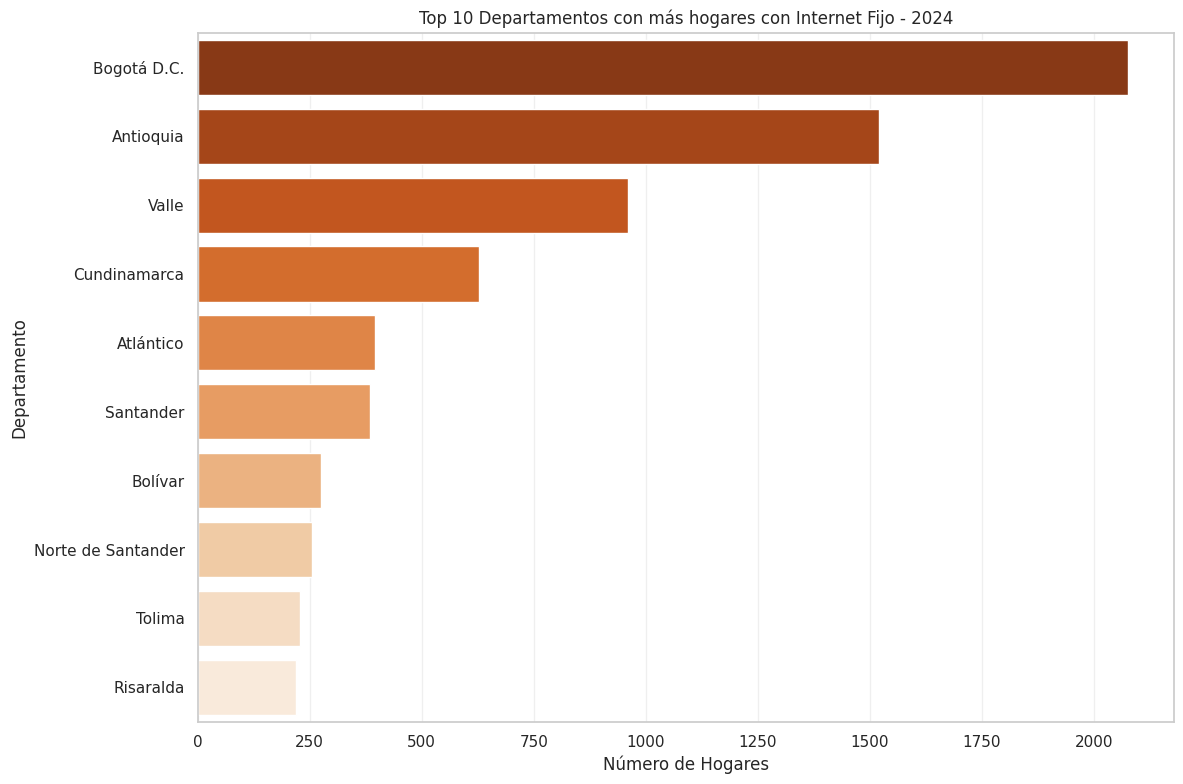

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 5'].nlargest(10, 'total Tipo fijo')
sns.barplot(data=top_10, y='Departamentos', x='total Tipo fijo', palette='Oranges_r')
plt.title('Top 10 Departamentos con más hogares con Internet Fijo - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2434726943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Total Tipo Movil', palette='Purples_r')


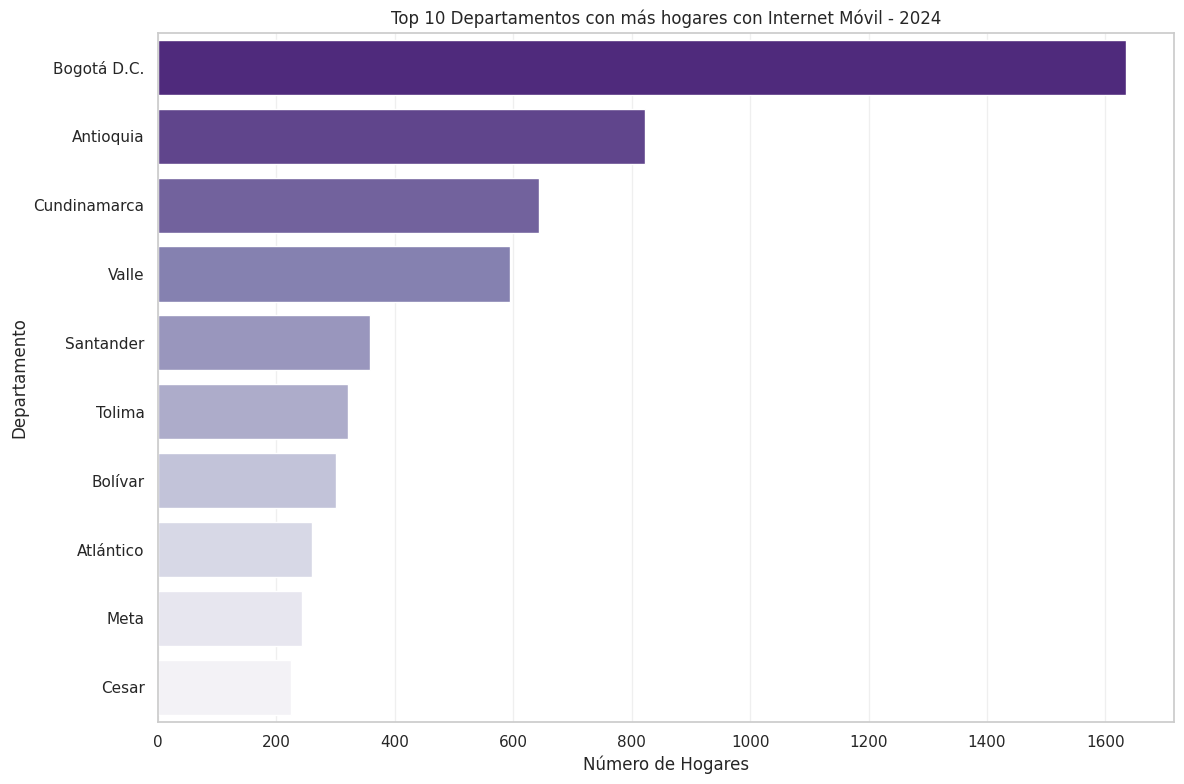

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 5'].nlargest(10, 'Total Tipo Movil')
sns.barplot(data=top_10, y='Departamentos', x='Total Tipo Movil', palette='Purples_r')
plt.title('Top 10 Departamentos con más hogares con Internet Móvil - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3619094662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Total Tipo Fijo-Movil', palette='Reds_r')


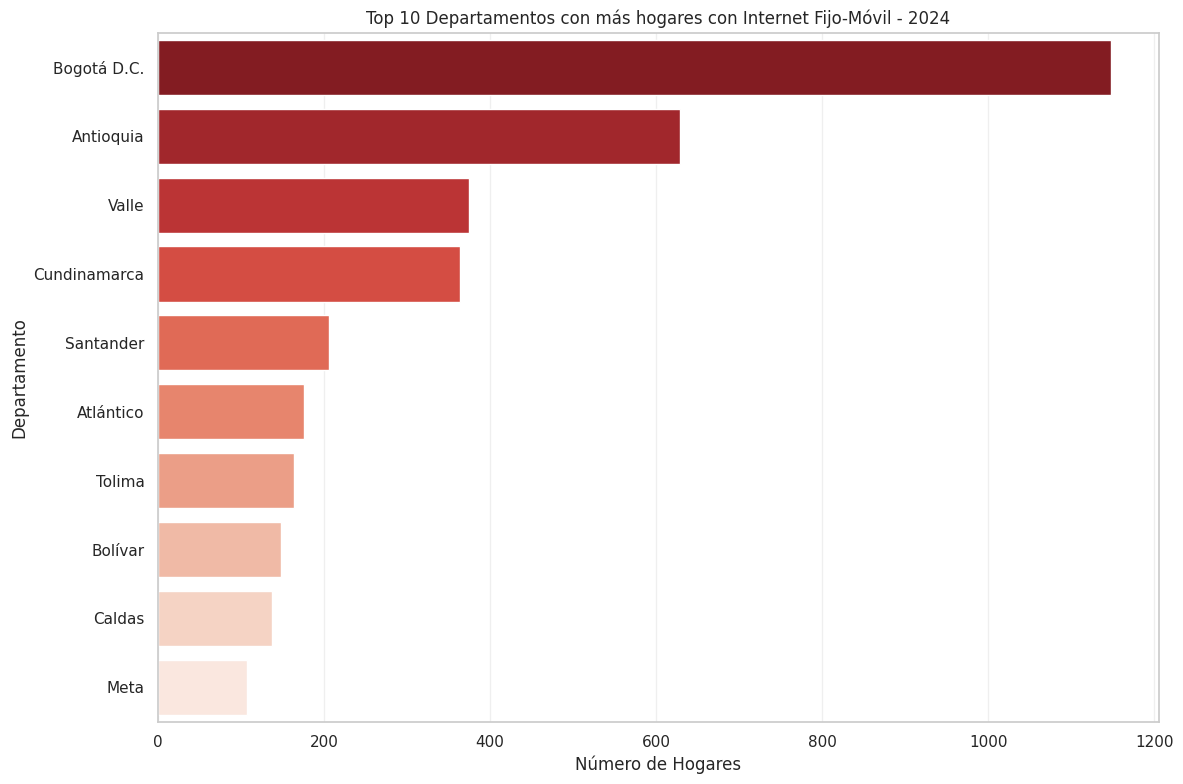

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 5'].nlargest(10, 'Total Tipo Fijo-Movil')
sns.barplot(data=top_10, y='Departamentos', x='Total Tipo Fijo-Movil', palette='Reds_r')
plt.title('Top 10 Departamentos con más hogares con Internet Fijo-Móvil - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

 ### departamentos menores por acceso a internet

/tmp/ipython-input-1068576156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='total Internet', palette='Reds_r')


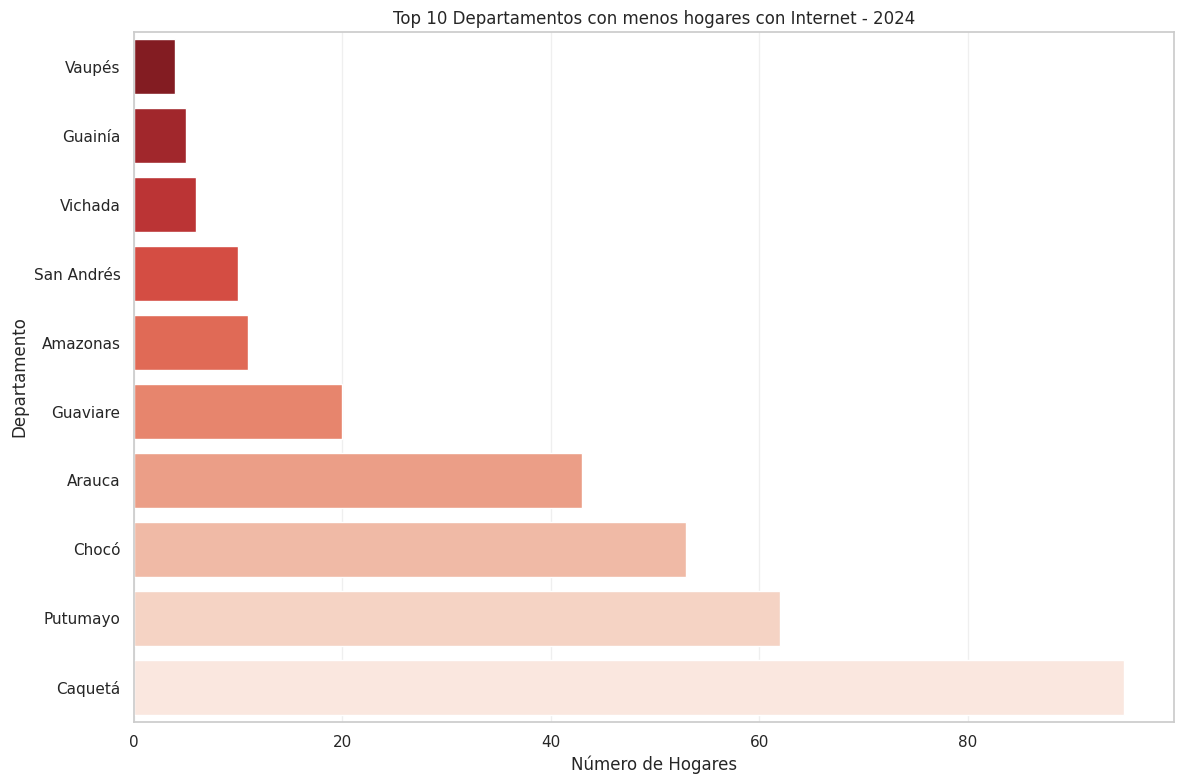

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 5'].nsmallest(10, 'total Internet')
sns.barplot(data=bottom_10, y='Departamentos', x='total Internet', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con Internet - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3109623179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='total Tipo fijo', palette='Reds_r')


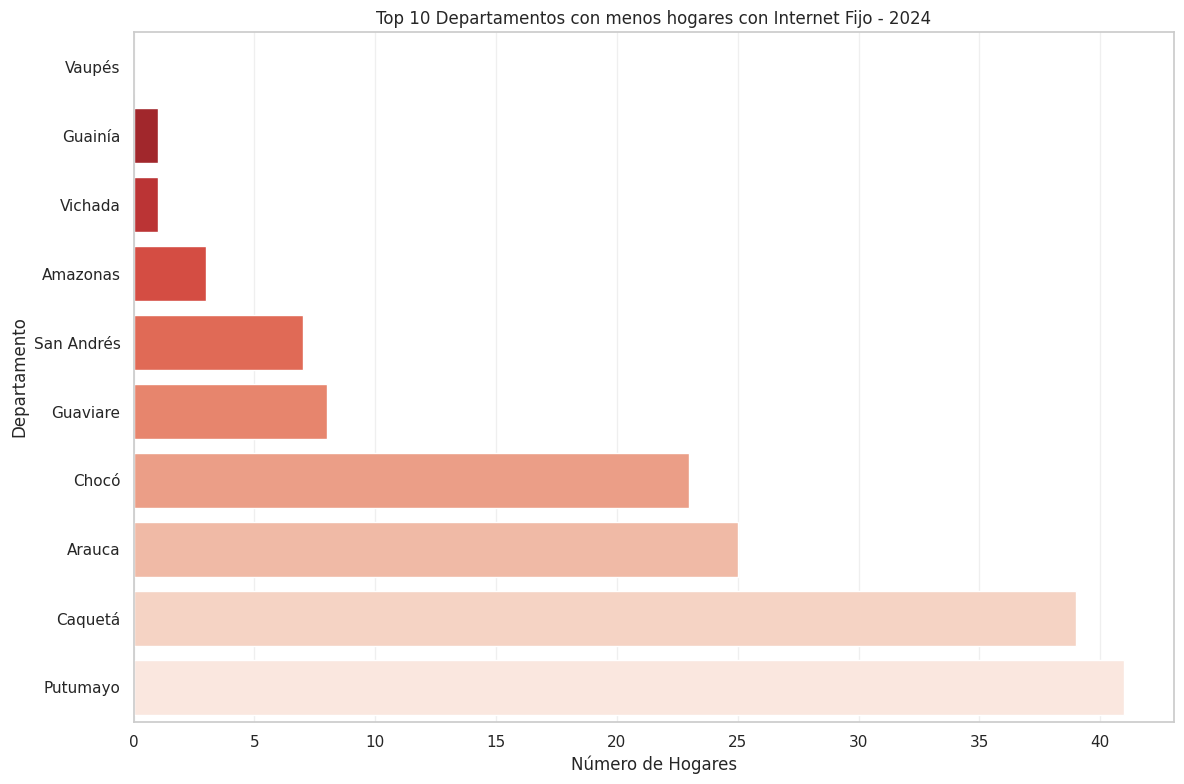

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 5'].nsmallest(10, 'total Tipo fijo')
sns.barplot(data=bottom_10, y='Departamentos', x='total Tipo fijo', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con Internet Fijo - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2796755713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Total Tipo Movil', palette='Reds_r')


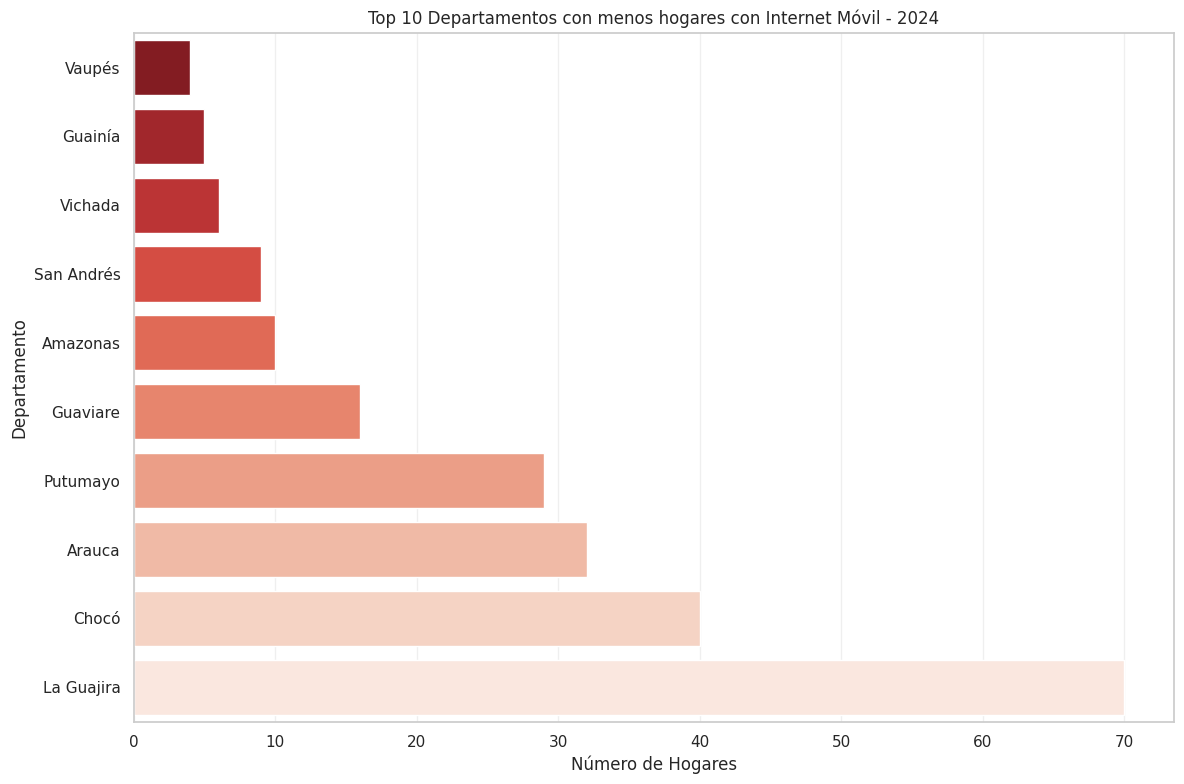

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 5'].nsmallest(10, 'Total Tipo Movil')
sns.barplot(data=bottom_10, y='Departamentos', x='Total Tipo Movil', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con Internet Móvil - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3338312772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Total Tipo Fijo-Movil', palette='Reds_r')


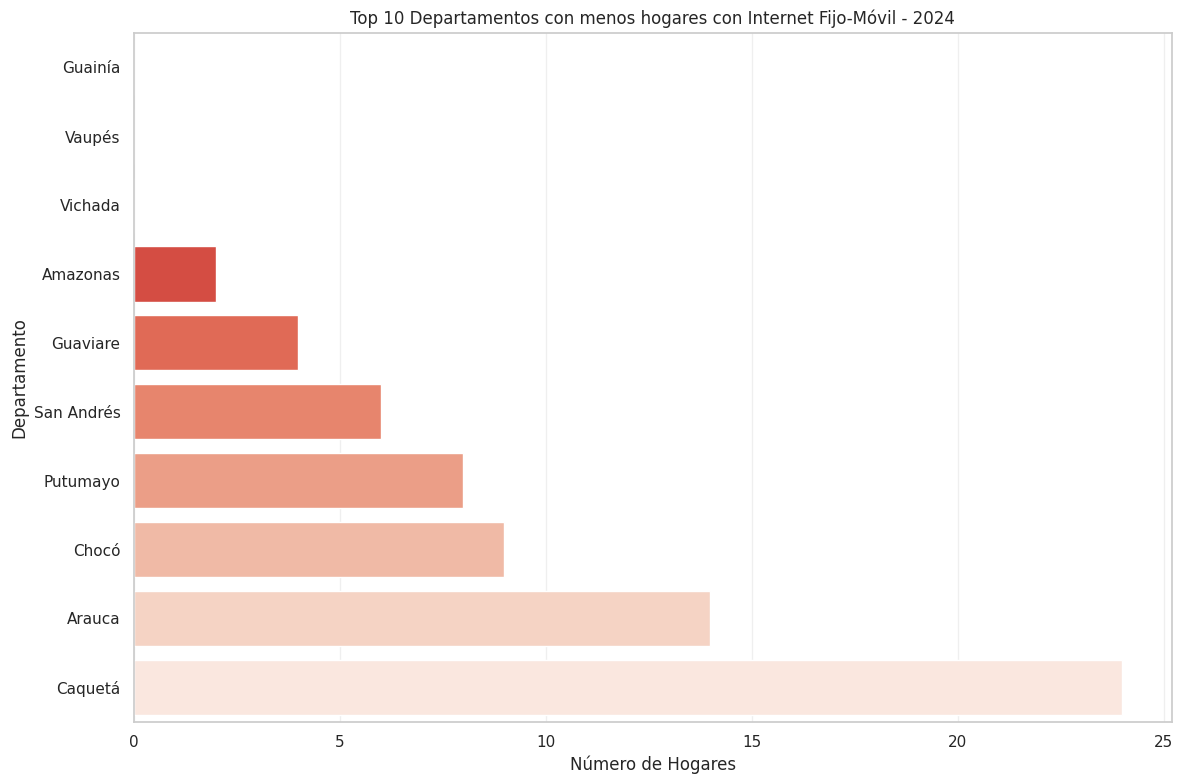

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 5'].nsmallest(10, 'Total Tipo Fijo-Movil')
sns.barplot(data=bottom_10, y='Departamentos', x='Total Tipo Fijo-Movil', palette='Reds_r')
plt.title('Top 10 Departamentos con menos hogares con Internet Fijo-Móvil - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Boxplot: Identificando la Dispersión y los Outliers

<Figure size 1800x1000 with 0 Axes>

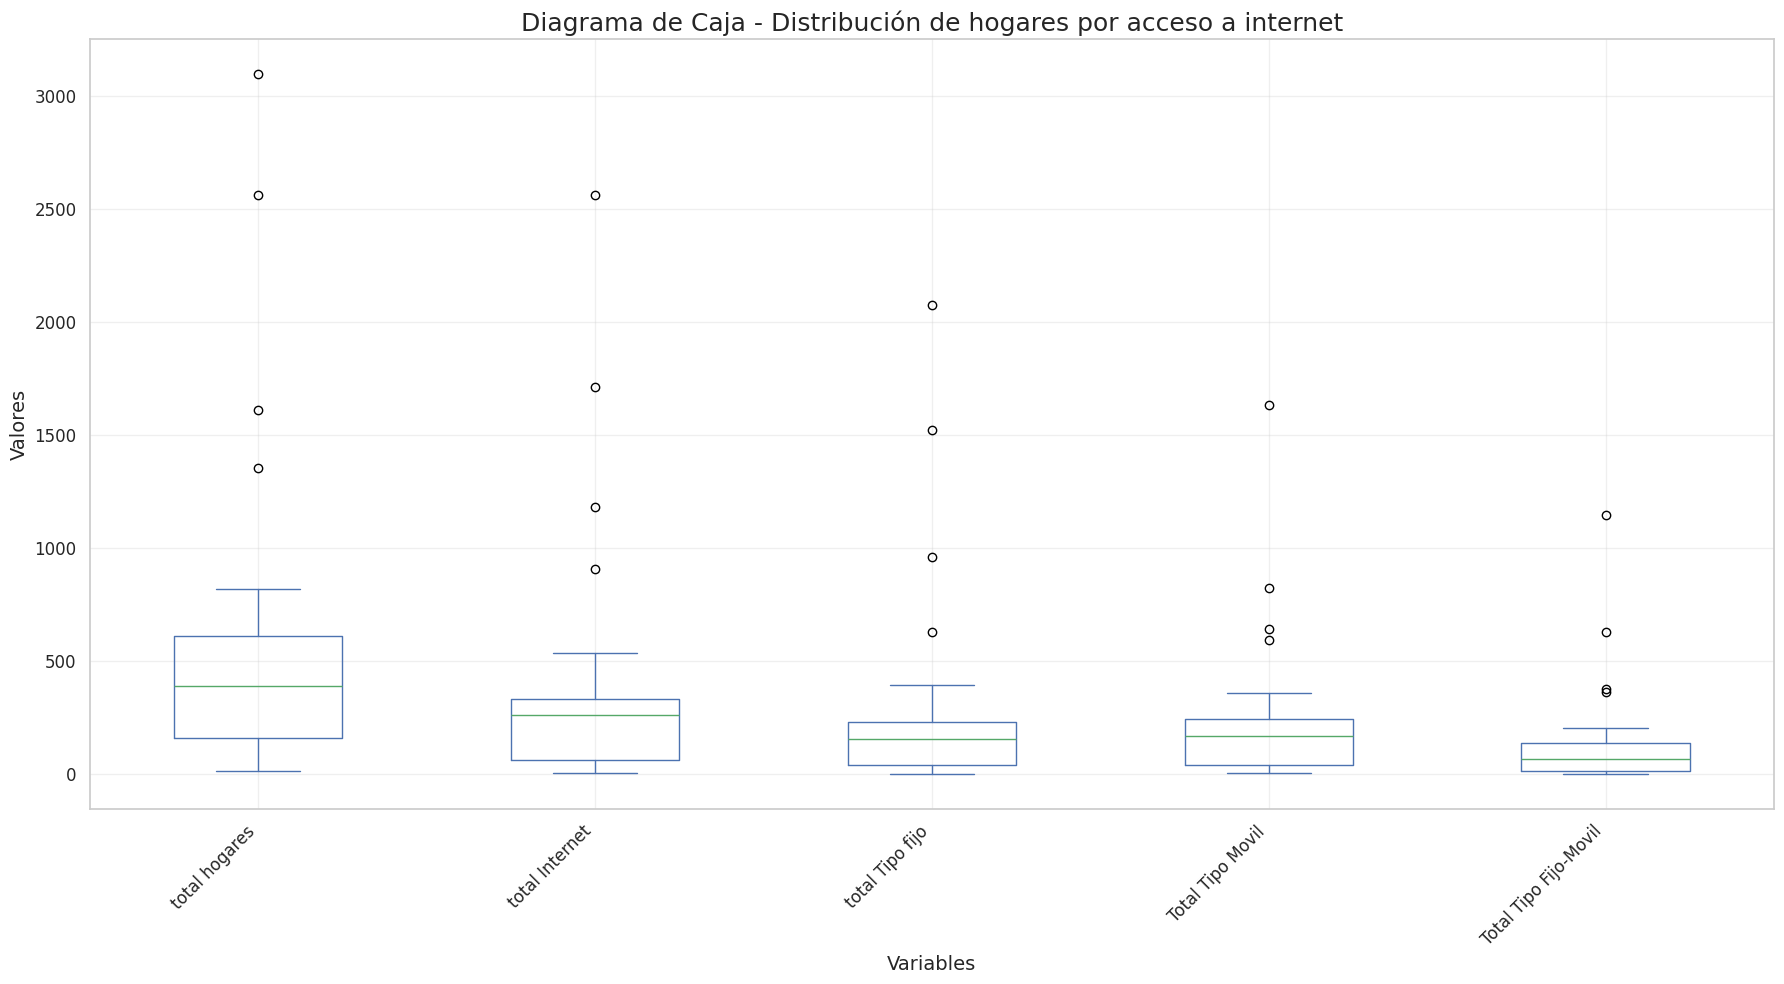

In [ ]:
plt.figure(figsize=(18,10))

df_variables['Cuadro 5'].plot(
    kind='box',
    figsize=(18,10),
    fontsize=12
)

plt.title('Diagrama de Caja - Distribución de hogares por acceso a internet', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Rotar etiquetas en X (si es necesario)
plt.xticks(rotation=45, ha='right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2.4.Tipo de tendencia a la vivienda

###Exploración inicial del dataset

In [ ]:
df_variables['Cuadro 6'].shape

(33, 8)

In [ ]:
df_variables['Cuadro 6'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Departamentos                         33 non-null     object
 1   total hogares                         33 non-null     object
 2   Propia totalmete pagada               33 non-null     object
 3   Prpia la estan pagando                33 non-null     object
 4   En Arriendo o Subarriendo             33 non-null     object
 5   Con permiso del propietario/sin pago  33 non-null     object
 6   poosesión sin titulo                  33 non-null     object
 7   propiedad colectiva                   33 non-null     object
dtypes: object(8)
memory usage: 2.2+ KB


### Análisis de los individuos objeto de estudio

In [ ]:
df_variables['Cuadro 6']['Departamentos'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca',
       'Cesar', 'Córdoba', 'Cundinamarca', 'Chocó', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés', 'Santander', 'Sucre', 'Tolima', 'Valle', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_variables['Cuadro 6']['Departamentos'].nunique()

33

In [ ]:
df_variables['Cuadro 6']['Departamentos'].value_counts()

Departamentos
Amazonas              1
Antioquia             1
Arauca                1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Casanare              1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Guainía               1
Guaviare              1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Putumayo              1
Quindío               1
Risaralda             1
San Andrés            1
Santander             1
Sucre                 1
Tolima                1
Valle                 1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 6'].dtypes)
print("\n")

TIPOS DE DATOS ACTUALES:
Departamentos                           object
total hogares                           object
Propia totalmete pagada                 object
Prpia la estan pagando                  object
En Arriendo o Subarriendo               object
Con permiso del propietario/sin pago    object
poosesión sin titulo                    object
propiedad colectiva                     object
dtype: object




In [ ]:
 # Convertir todas las columnas numéricas
df_variables['Cuadro 6']['total hogares'] = pd.to_numeric(df_variables['Cuadro 6']['total hogares'], errors='coerce')
df_variables['Cuadro 6']['Propia totalmete pagada'] = pd.to_numeric(df_variables['Cuadro 6']['Propia totalmete pagada'], errors='coerce')
df_variables['Cuadro 6']['Prpia la estan pagando'] = pd.to_numeric(df_variables['Cuadro 6']['Prpia la estan pagando'], errors='coerce')
df_variables['Cuadro 6']['En Arriendo o Subarriendo'] = pd.to_numeric(df_variables['Cuadro 6']['En Arriendo o Subarriendo'], errors='coerce')
df_variables['Cuadro 6']['Con permiso del propietario/sin pago'] = pd.to_numeric(df_variables['Cuadro 6']['Con permiso del propietario/sin pago'], errors='coerce')
df_variables['Cuadro 6']['poosesión sin titulo'] = pd.to_numeric(df_variables['Cuadro 6']['poosesión sin titulo'], errors='coerce')
df_variables['Cuadro 6']['propiedad colectiva'] = pd.to_numeric(df_variables['Cuadro 6']['propiedad colectiva'], errors='coerce')



In [ ]:
# Verificar la conversión
print("TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:")
print(df_variables['Cuadro 6'].dtypes)
print("\n")

TIPOS DE DATOS DESPUÉS DE LA CONVERSIÓN:
Departamentos                           object
total hogares                            int64
Propia totalmete pagada                  int64
Prpia la estan pagando                   int64
En Arriendo o Subarriendo                int64
Con permiso del propietario/sin pago     int64
poosesión sin titulo                     int64
propiedad colectiva                      int64
dtype: object




In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_variables['Cuadro 6'].describe().round(1))

Estadísticas Descriptivas (1 decimal):
       total hogares  Propia totalmete pagada  Prpia la estan pagando  \
count           33.0                     33.0                    33.0   
mean           560.3                    201.8                    19.8   
std            691.4                    241.5                    40.3   
min             15.0                      2.0                     0.0   
25%            161.0                     40.0                     1.0   
50%            390.0                    146.0                     7.0   
75%            611.0                    262.0                    16.0   
max           3098.0                   1069.0                   206.0   

       En Arriendo o Subarriendo  Con permiso del propietario/sin pago  \
count                       33.0                                  33.0   
mean                       226.2                                  78.4   
std                        344.8                                  74.0   
min    

#### Histograma y Gráfico de Densidad

¿como se distribuyen los hogares con acceso a vivienda?

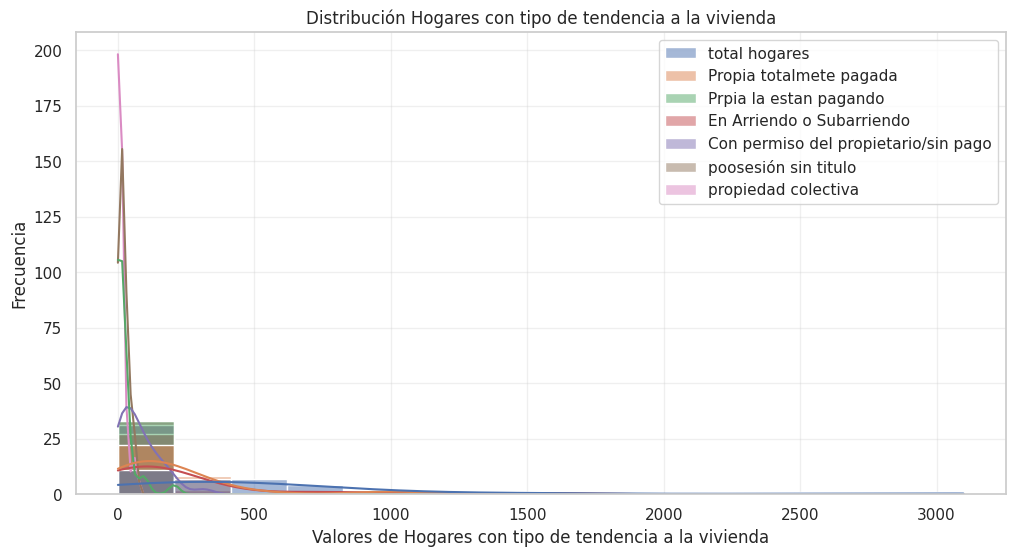

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_variables['Cuadro 6'], kde=True, bins=15)
plt.title('Distribución Hogares con tipo de tendencia a la vivienda')
plt.xlabel('Valores de Hogares con tipo de tendencia a la vivienda')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

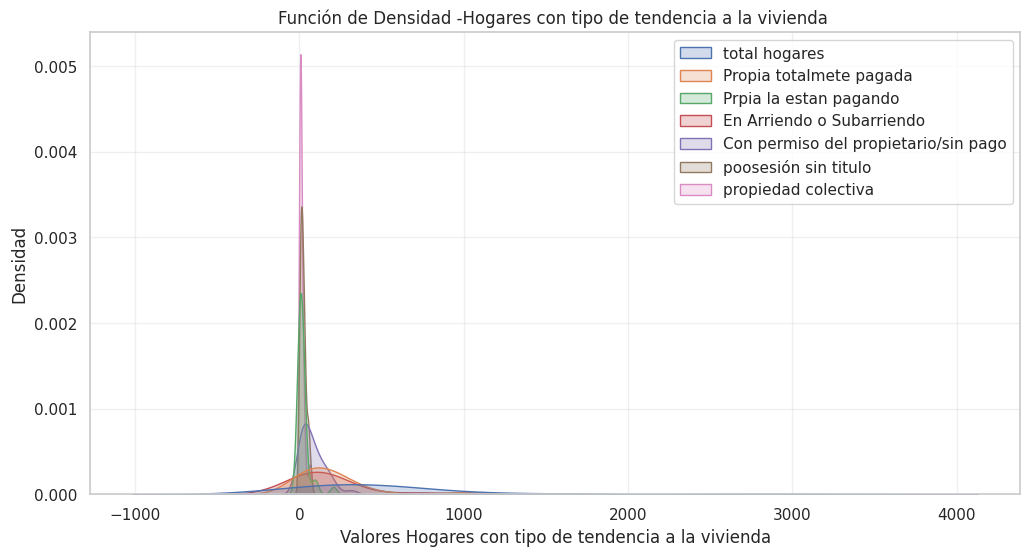

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_variables['Cuadro 6'], fill=True)
plt.title('Función de Densidad -Hogares con tipo de tendencia a la vivienda ')
plt.xlabel('Valores Hogares con tipo de tendencia a la vivienda')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

### Gráfico de Barras

 ### departamentos mayores por tipo de acceso a la vivienda

/tmp/ipython-input-1468603939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Propia totalmete pagada', palette='Greens_r')


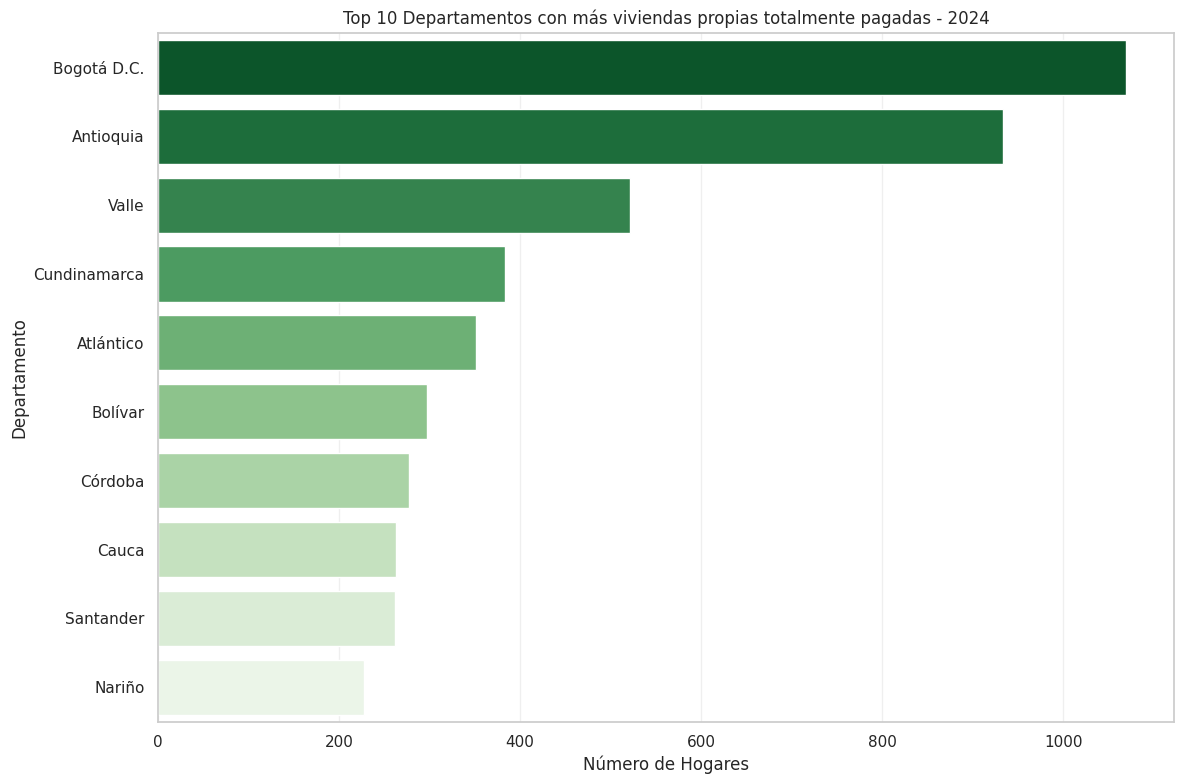

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'Propia totalmete pagada')
sns.barplot(data=top_10, y='Departamentos', x='Propia totalmete pagada', palette='Greens_r')
plt.title('Top 10 Departamentos con más viviendas propias totalmente pagadas - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2862423936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Prpia la estan pagando', palette='Oranges_r')


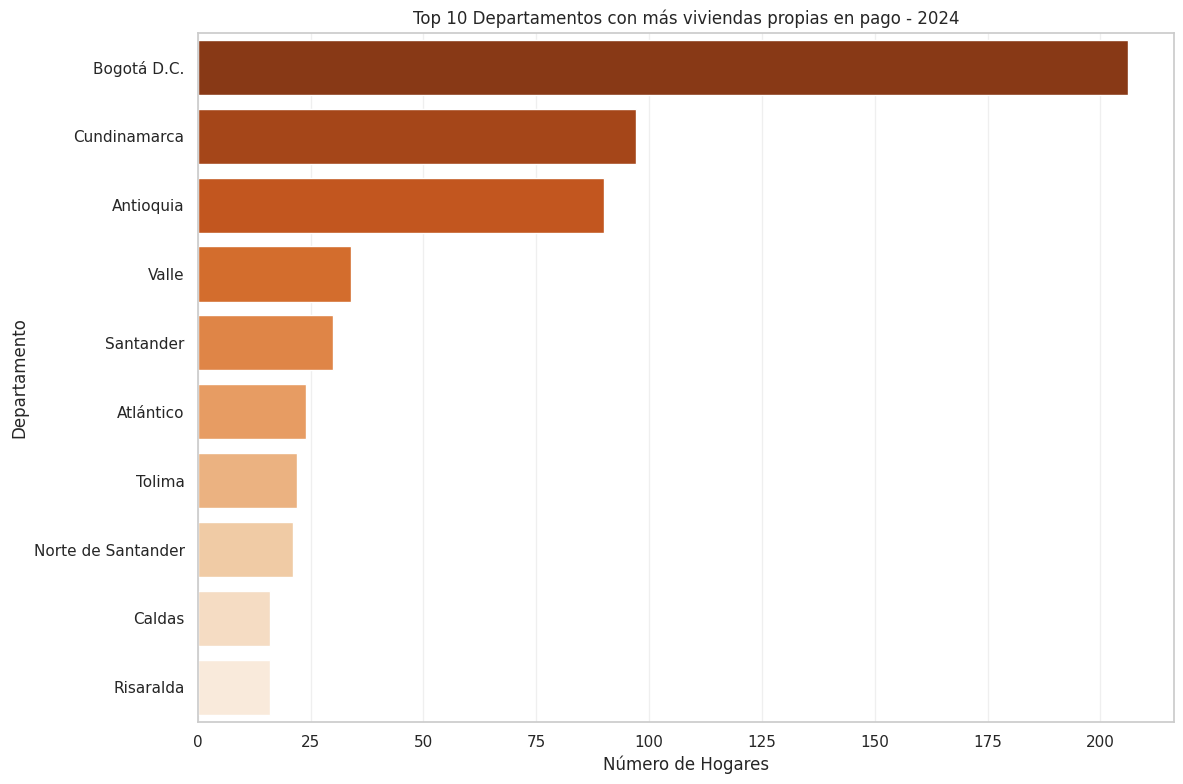

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'Prpia la estan pagando')
sns.barplot(data=top_10, y='Departamentos', x='Prpia la estan pagando', palette='Oranges_r')
plt.title('Top 10 Departamentos con más viviendas propias en pago - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2318446412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='En Arriendo o Subarriendo', palette='Purples_r')


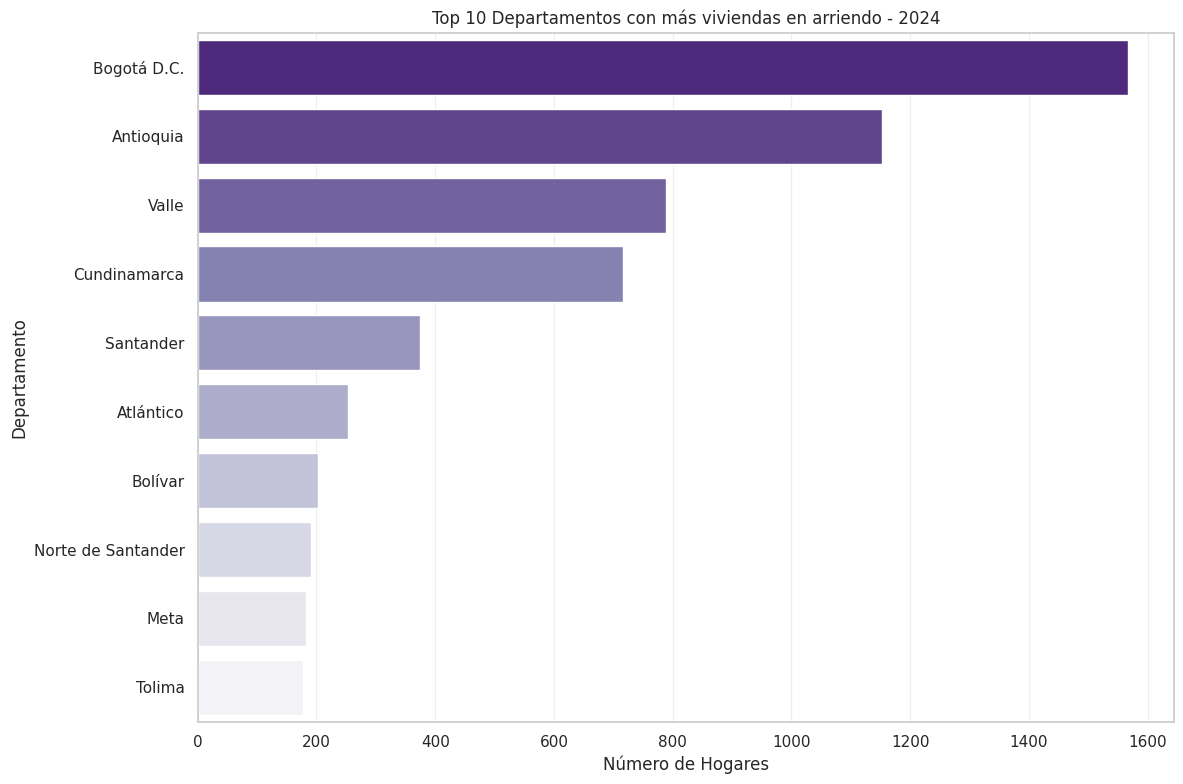

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'En Arriendo o Subarriendo')
sns.barplot(data=top_10, y='Departamentos', x='En Arriendo o Subarriendo', palette='Purples_r')
plt.title('Top 10 Departamentos con más viviendas en arriendo - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2915995561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='Con permiso del propietario/sin pago', palette='Reds_r')


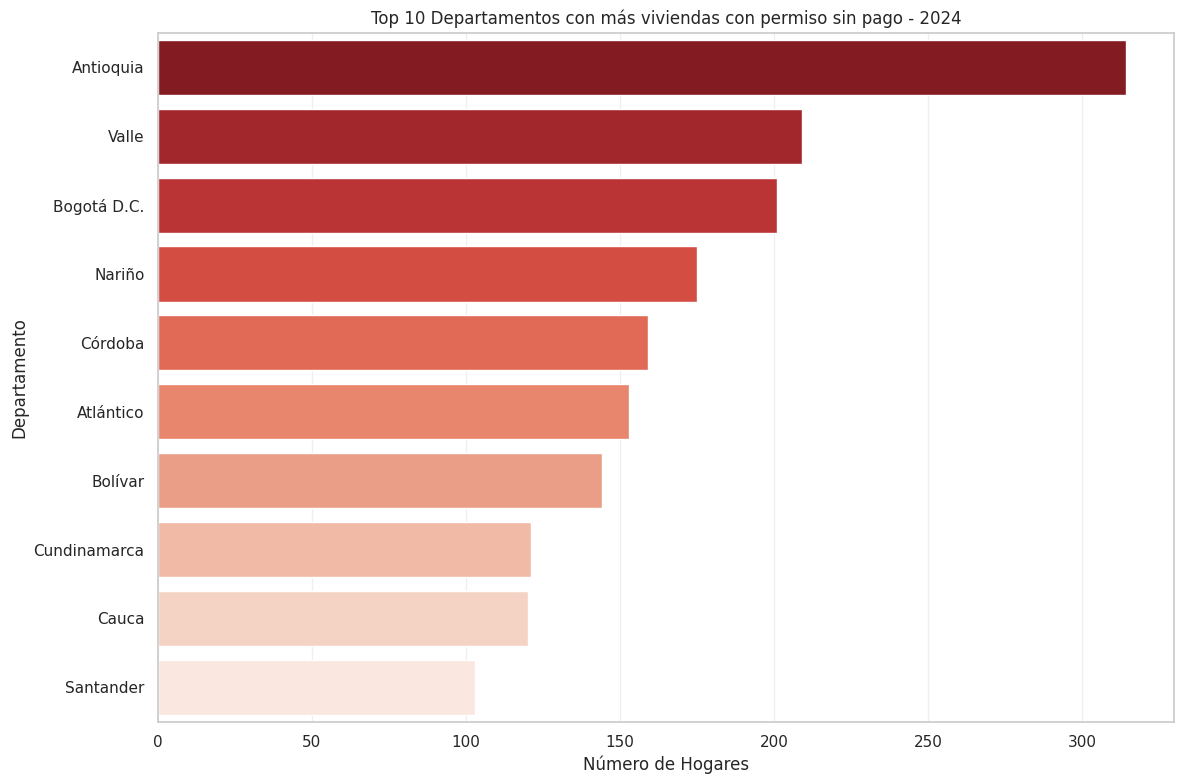

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'Con permiso del propietario/sin pago')
sns.barplot(data=top_10, y='Departamentos', x='Con permiso del propietario/sin pago', palette='Reds_r')
plt.title('Top 10 Departamentos con más viviendas con permiso sin pago - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

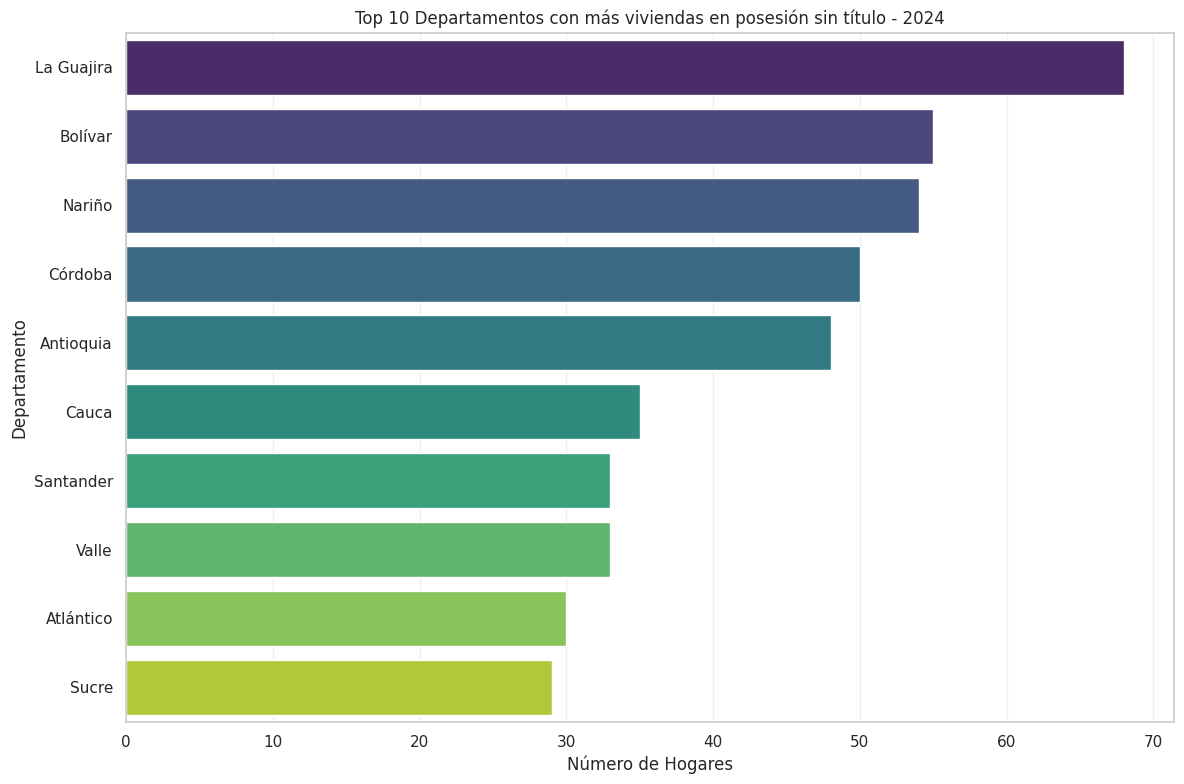

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'poosesión sin titulo')
sns.barplot(data=top_10, y='Departamentos', x='poosesión sin titulo', hue='Departamentos', legend=False, palette='viridis')
plt.title('Top 10 Departamentos con más viviendas en posesión sin título - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-378244255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='Departamentos', x='propiedad colectiva', palette='Greys_r')


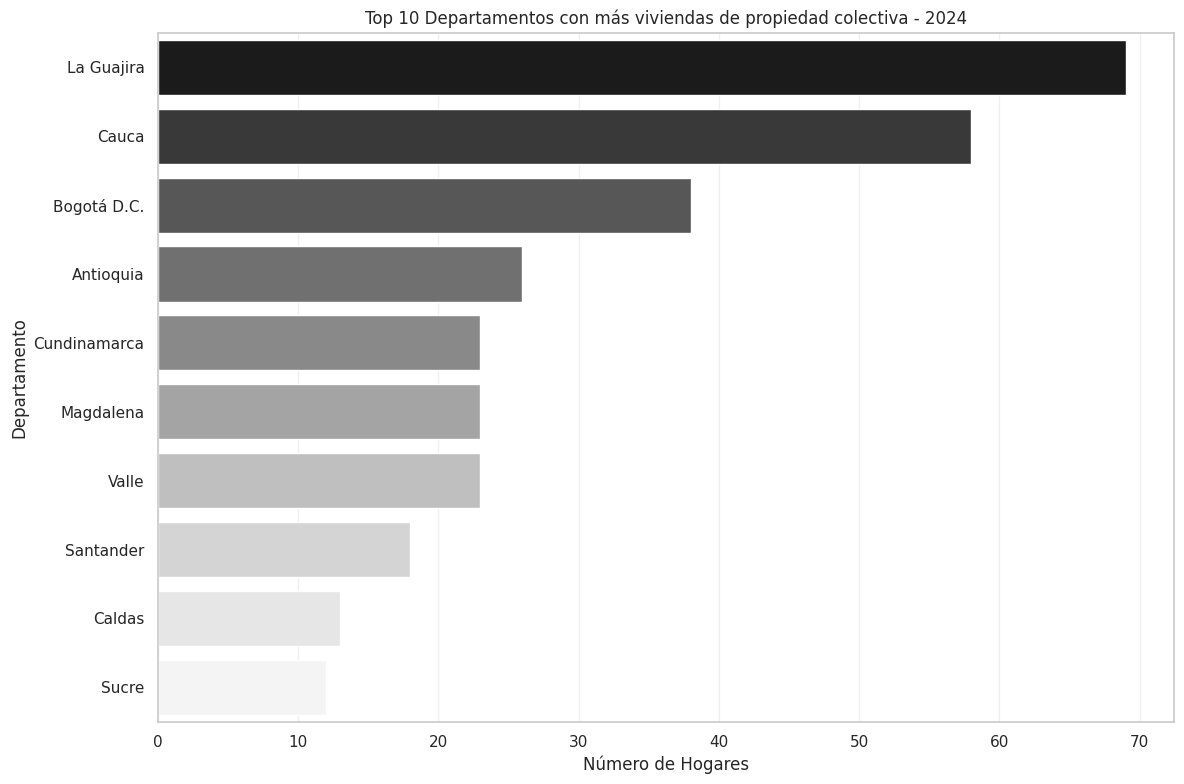

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 6'].nlargest(10, 'propiedad colectiva')
sns.barplot(data=top_10, y='Departamentos', x='propiedad colectiva', palette='Greys_r')
plt.title('Top 10 Departamentos con más viviendas de propiedad colectiva - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

 ### departamentos menores por tipo de acceso a la vivienda

/tmp/ipython-input-1808101491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Propia totalmete pagada', palette='Reds_r')


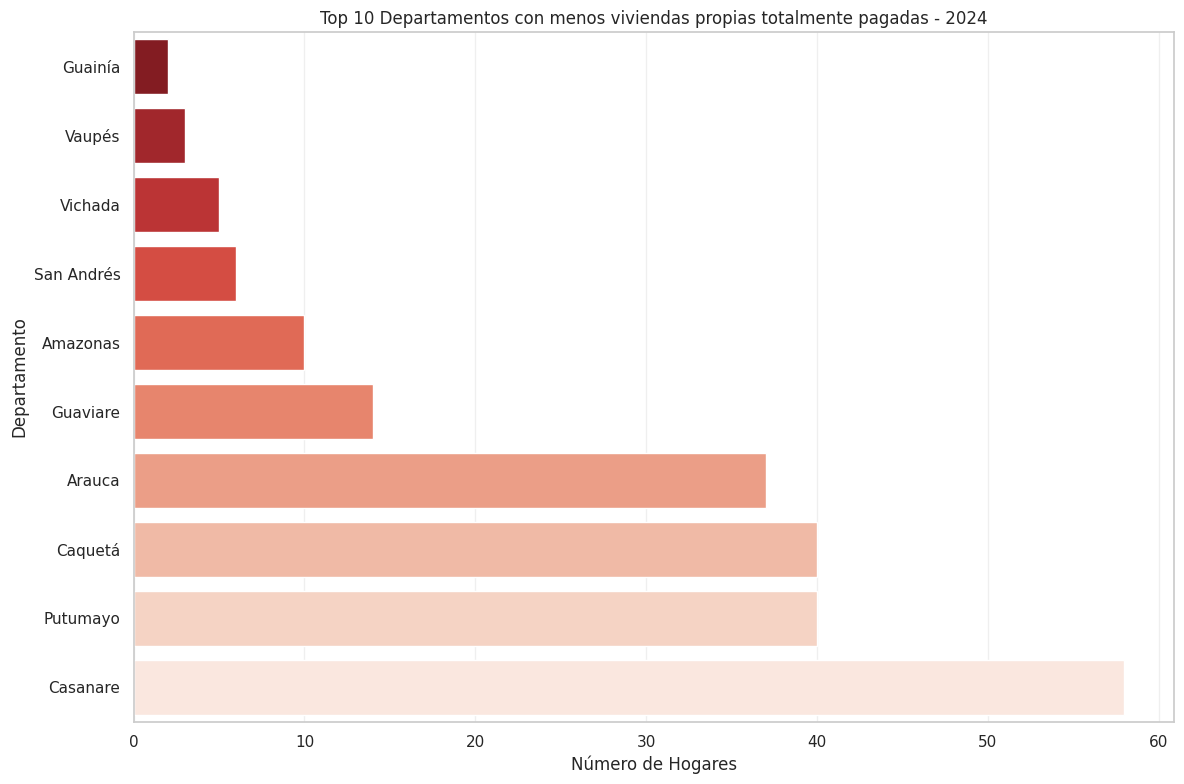

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'Propia totalmete pagada')
sns.barplot(data=bottom_10, y='Departamentos', x='Propia totalmete pagada', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas propias totalmente pagadas - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-426233934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Prpia la estan pagando', palette='Reds_r')


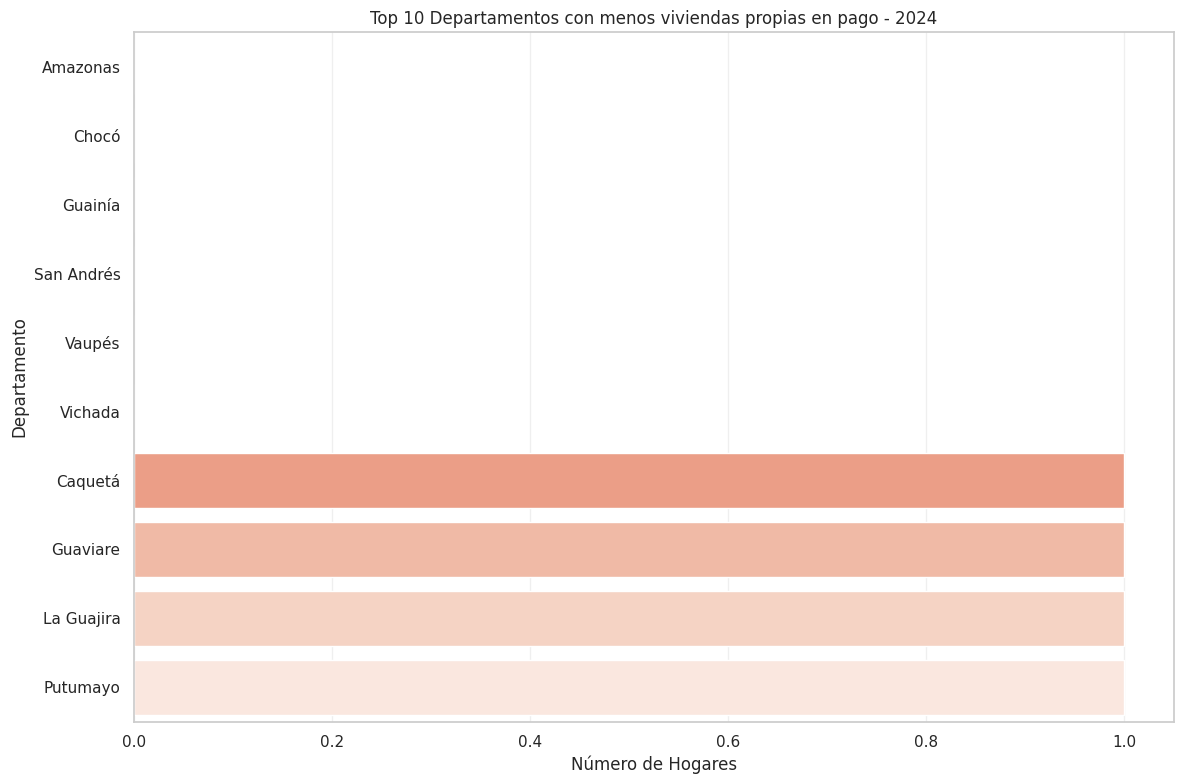

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'Prpia la estan pagando')
sns.barplot(data=bottom_10, y='Departamentos', x='Prpia la estan pagando', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas propias en pago - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-423495138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='En Arriendo o Subarriendo', palette='Reds_r')


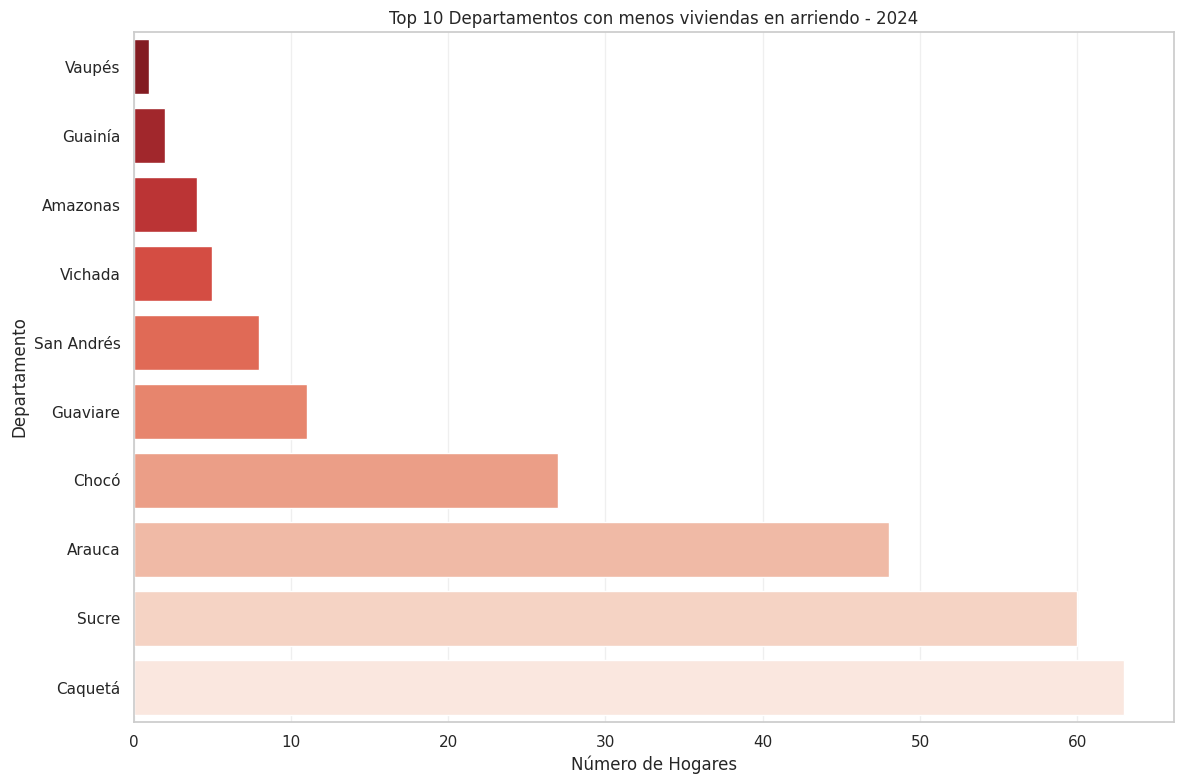

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'En Arriendo o Subarriendo')
sns.barplot(data=bottom_10, y='Departamentos', x='En Arriendo o Subarriendo', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas en arriendo - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2081199567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='Con permiso del propietario/sin pago', palette='Reds_r')


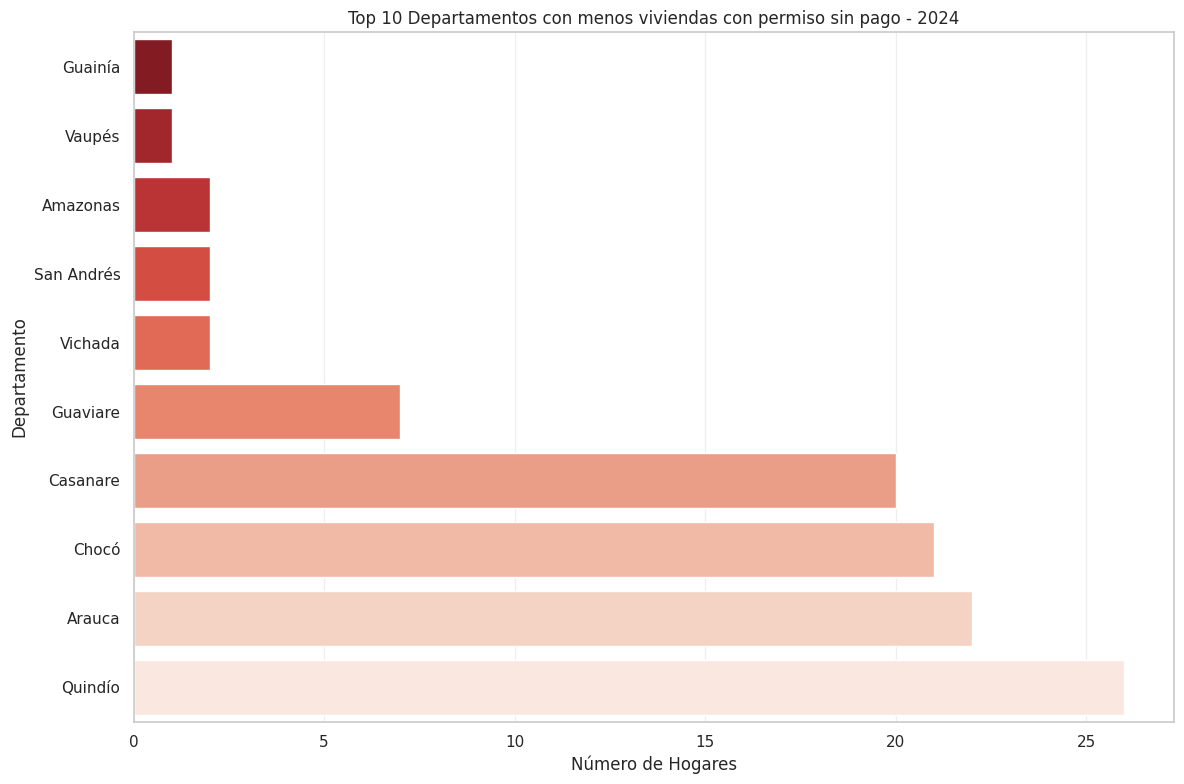

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'Con permiso del propietario/sin pago')
sns.barplot(data=bottom_10, y='Departamentos', x='Con permiso del propietario/sin pago', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas con permiso sin pago - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4132783456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='poosesión sin titulo', palette='Reds_r')


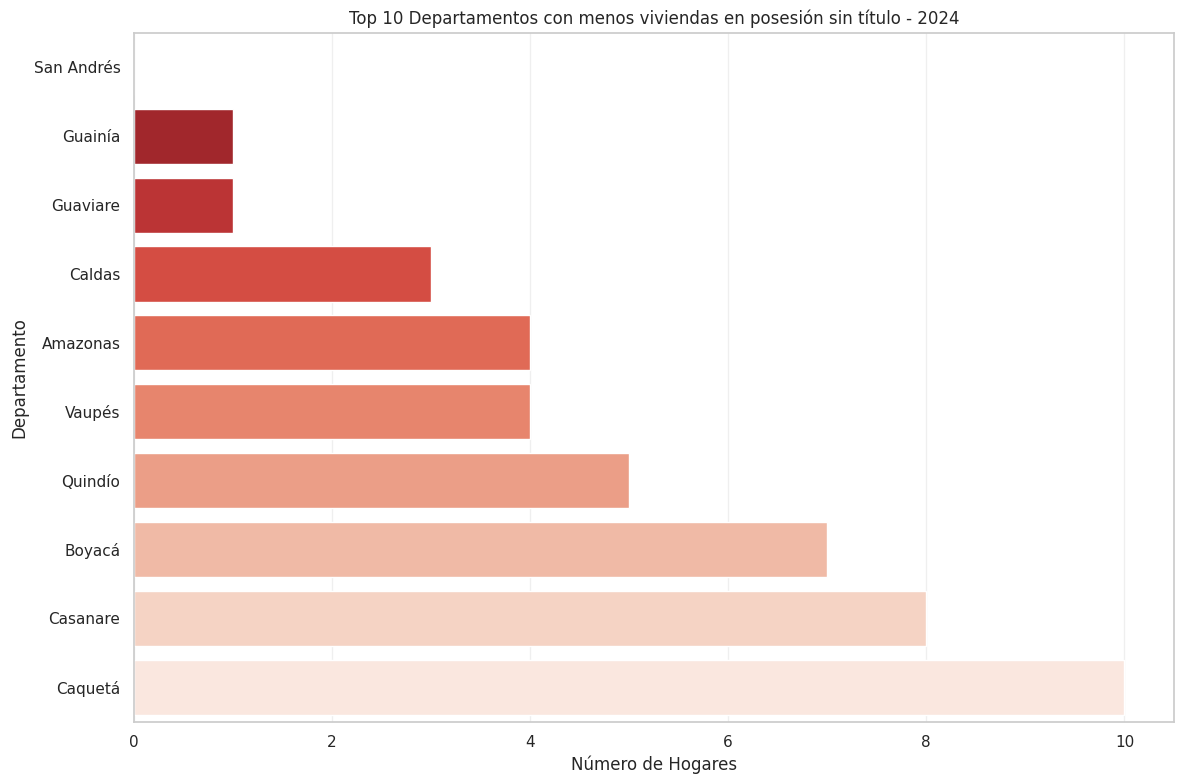

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'poosesión sin titulo')
sns.barplot(data=bottom_10, y='Departamentos', x='poosesión sin titulo', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas en posesión sin título - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2287587529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, y='Departamentos', x='propiedad colectiva', palette='Reds_r')


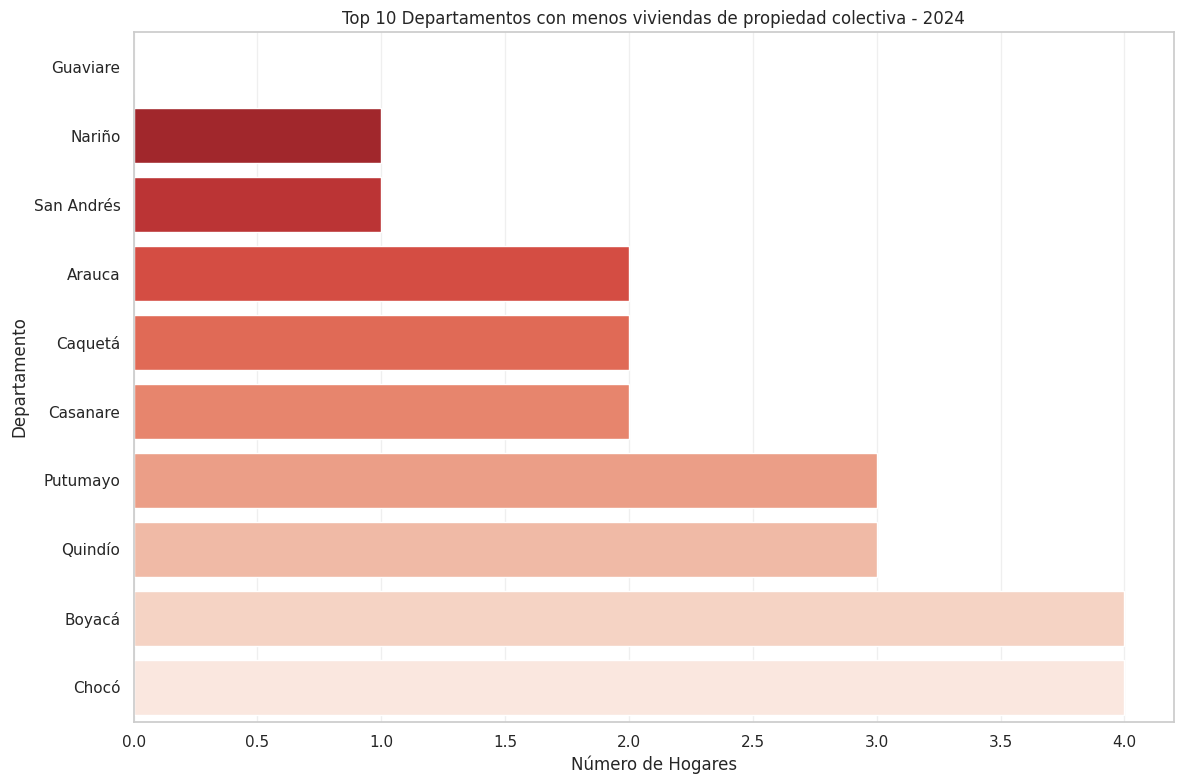

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 6'].nsmallest(10, 'propiedad colectiva')
sns.barplot(data=bottom_10, y='Departamentos', x='propiedad colectiva', palette='Reds_r')
plt.title('Top 10 Departamentos con menos viviendas de propiedad colectiva - 2024')
plt.xlabel('Número de Hogares')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Boxplot: Identificando la Dispersión y los Outliers

<Figure size 1800x1000 with 0 Axes>

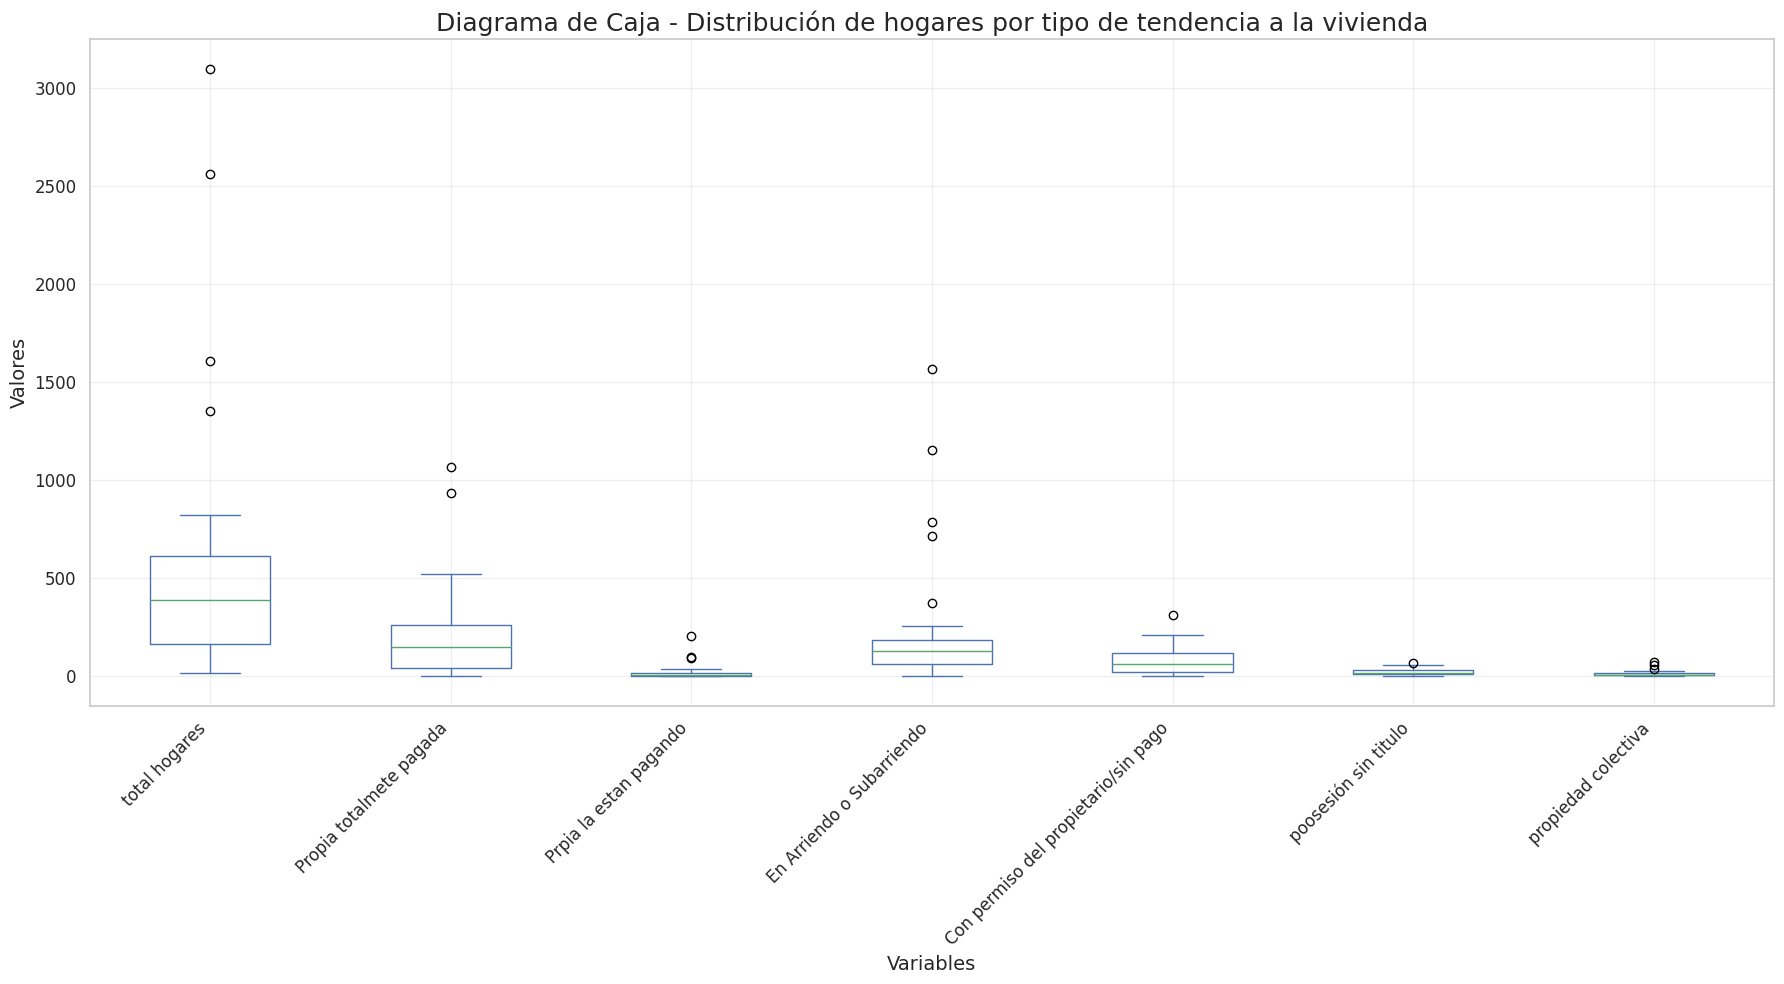

In [ ]:
plt.figure(figsize=(18,10))

df_variables['Cuadro 6'].plot(
    kind='box',
    figsize=(18,10),
    fontsize=12
)

plt.title('Diagrama de Caja - Distribución de hogares por tipo de tendencia a la vivienda', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Rotar etiquetas en X (si es necesario)
plt.xticks(rotation=45, ha='right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#3.2.5.Percepción de la calidad del servicio de la EPS

###Exploración inicial del dataset

In [ ]:
df_variables['Cuadro 11'].shape

(33, 5)

In [ ]:
df_variables['Cuadro 11'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Departamentos       33 non-null     object
 1   Personas afiliadas  33 non-null     object
 2   muy buena           33 non-null     object
 3   Buena               33 non-null     object
 4   mala                33 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


### Análisis de los individuos objeto de estudio

In [ ]:
df_variables['Cuadro 11']['Departamentos'].unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Cauca',
       'Cesar', 'Córdoba', 'Cundinamarca', 'Chocó', 'Guainía', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés', 'Santander', 'Sucre', 'Tolima', 'Valle', 'Vaupés',
       'Vichada'], dtype=object)

In [ ]:
df_variables['Cuadro 11']['Departamentos'].nunique()

33

In [ ]:
df_variables['Cuadro 11']['Departamentos'].value_counts()

Departamentos
Amazonas              1
Antioquia             1
Arauca                1
Atlántico             1
Bogotá D.C.           1
Bolívar               1
Boyacá                1
Caldas                1
Caquetá               1
Casanare              1
Cauca                 1
Cesar                 1
Córdoba               1
Cundinamarca          1
Chocó                 1
Guainía               1
Guaviare              1
Huila                 1
La Guajira            1
Magdalena             1
Meta                  1
Nariño                1
Norte de Santander    1
Putumayo              1
Quindío               1
Risaralda             1
San Andrés            1
Santander             1
Sucre                 1
Tolima                1
Valle                 1
Vaupés                1
Vichada               1
Name: count, dtype: int64

# Estadísticas Descriptivas (Análisis Univariado)

In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 11'].dtypes)
print("\n")

TIPOS DE DATOS ACTUALES:
Departamentos         object
Personas afiliadas    object
muy buena             object
Buena                 object
mala                  object
dtype: object




In [ ]:
# Convertir todas las columnas numéricas
df_variables['Cuadro 11']['Personas afiliadas'] = pd.to_numeric(df_variables['Cuadro 11']['Personas afiliadas'], errors='coerce')
df_variables['Cuadro 11']['muy buena'] = pd.to_numeric(df_variables['Cuadro 11']['muy buena'], errors='coerce')
df_variables['Cuadro 11']['Buena'] = pd.to_numeric(df_variables['Cuadro 11']['Buena'], errors='coerce')
df_variables['Cuadro 11']['mala'] = pd.to_numeric(df_variables['Cuadro 11']['mala'], errors='coerce')



In [ ]:
# Verificar el tipo de datos actual
print("TIPOS DE DATOS ACTUALES:")
print(df_variables['Cuadro 11'].dtypes)
print("\n")

TIPOS DE DATOS ACTUALES:
Departamentos         object
Personas afiliadas     int64
muy buena              int64
Buena                  int64
mala                   int64
dtype: object




In [ ]:
# Mostrar con 1 decimal
print("Estadísticas Descriptivas (1 decimal):")
print(df_variables['Cuadro 11'].describe().round(1))

Estadísticas Descriptivas (1 decimal):
       Personas afiliadas  muy buena   Buena   mala
count                33.0       33.0    33.0   33.0
mean               1542.8      159.7  1147.3  211.8
std                1788.3      231.9  1323.1  239.9
min                  43.0        0.0    31.0    4.0
25%                 425.0       10.0   301.0   62.0
50%                1050.0       57.0   871.0  110.0
75%                1601.0      173.0  1176.0  243.0
max                7614.0      841.0  5785.0  871.0


#### Histograma y Gráfico de Densidad

¿como se distribuyen las personas afiliada por percepcion de la calidad del servicio de la EPS?

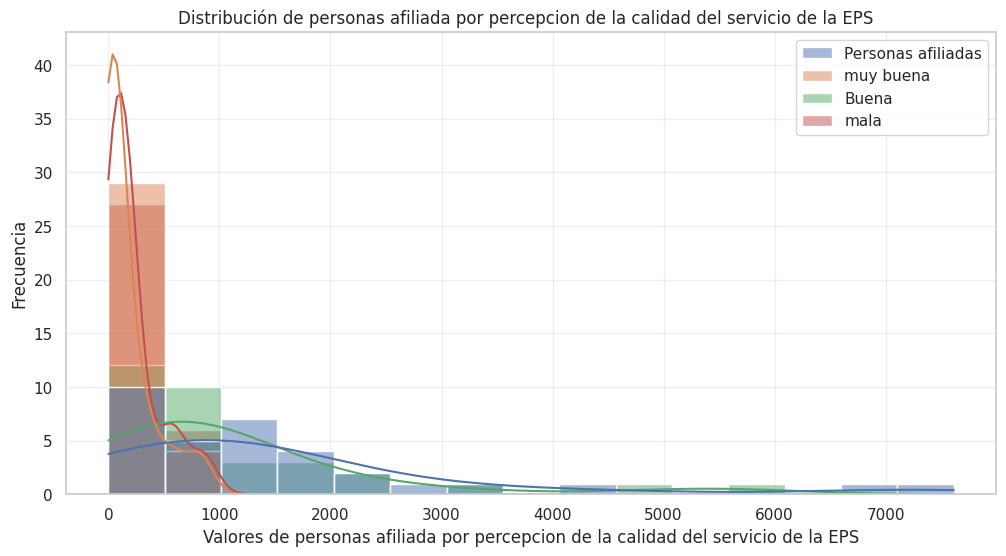

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_variables['Cuadro 11'], kde=True, bins=15)
plt.title('Distribución de personas afiliada por percepcion de la calidad del servicio de la EPS  ')
plt.xlabel('Valores de personas afiliada por percepcion de la calidad del servicio de la EPS')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

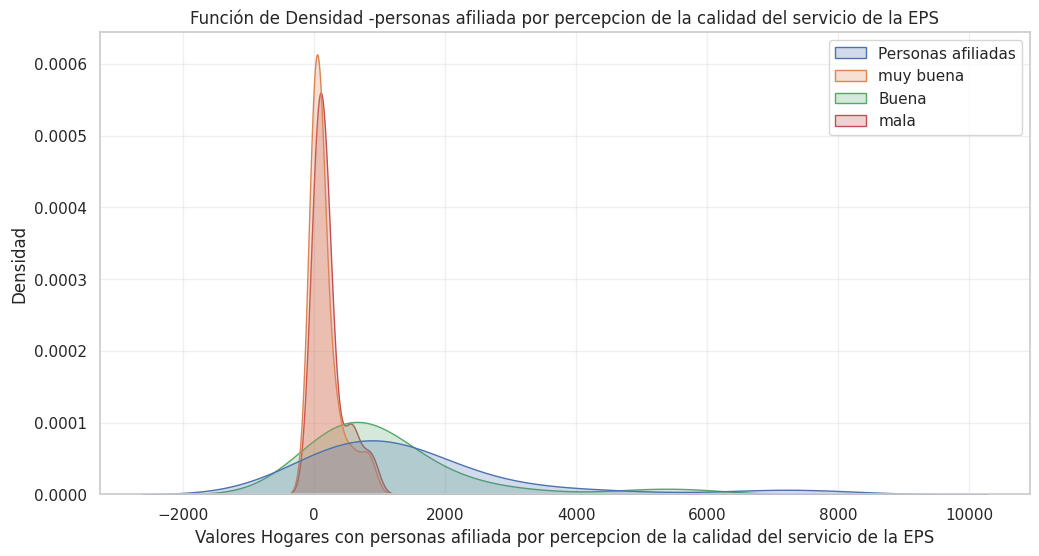

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_variables['Cuadro 11'], fill=True)
plt.title('Función de Densidad -personas afiliada por percepcion de la calidad del servicio de la EPS')
plt.xlabel('Valores Hogares con personas afiliada por percepcion de la calidad del servicio de la EPS')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.show()

### Gráfico de Barras

 ### departamentos mayores por por percepcion de la calidad del servicio de la EPS

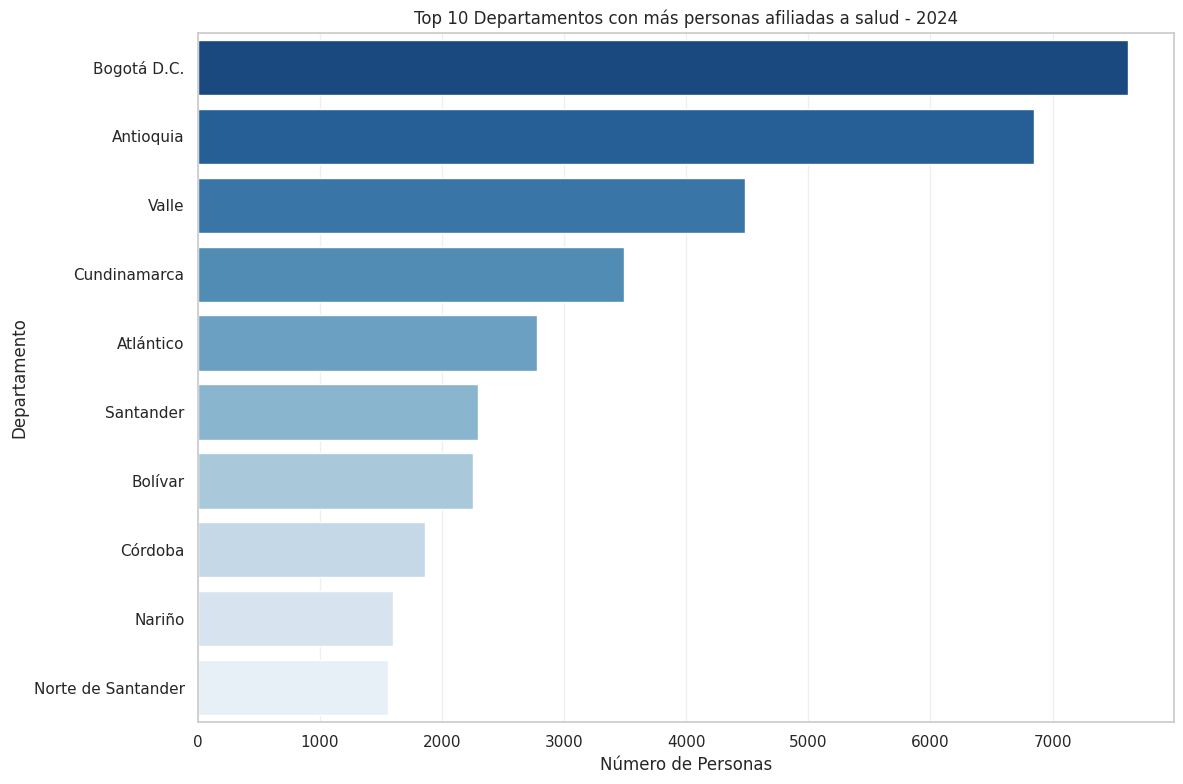

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 11'].nlargest(10, 'Personas afiliadas')
sns.barplot(data=top_10, y='Departamentos', x='Personas afiliadas', hue='Departamentos', legend=False, palette='Blues_r')
plt.title('Top 10 Departamentos con más personas afiliadas a salud - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

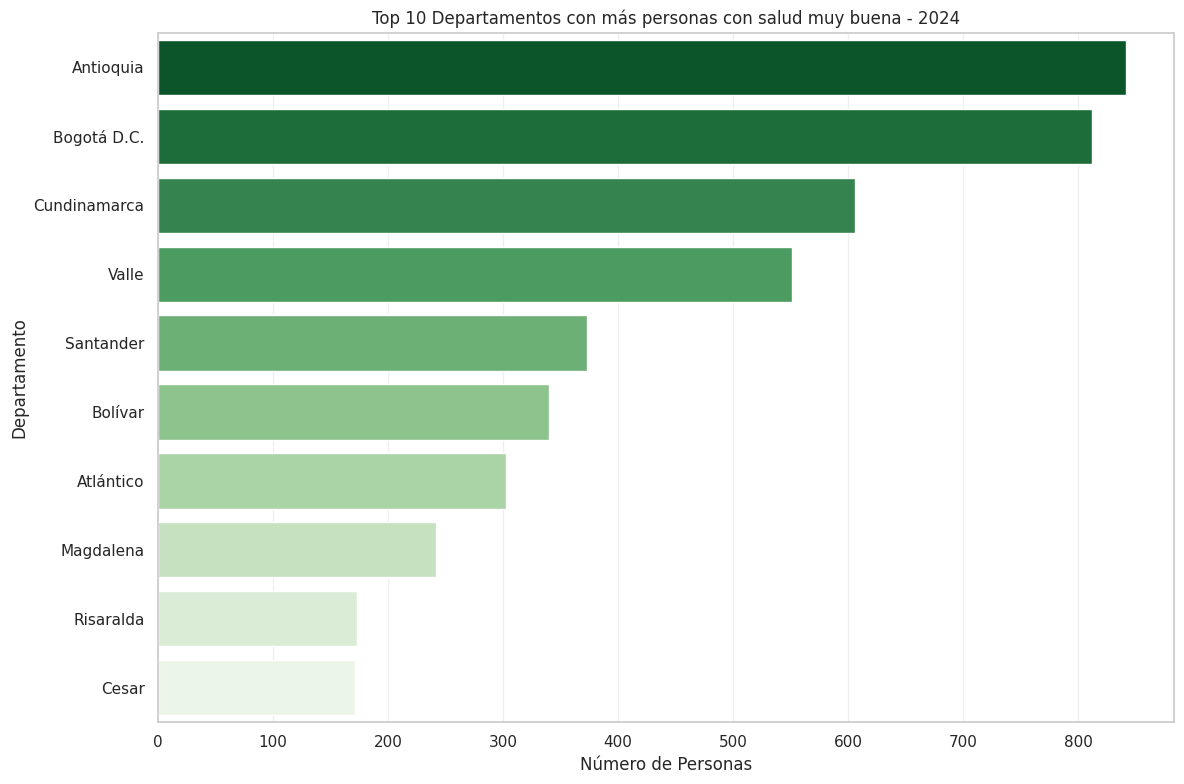

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 11'].nlargest(10, 'muy buena')
sns.barplot(data=top_10, y='Departamentos', x='muy buena', hue='Departamentos', legend=False, palette='Greens_r')
plt.title('Top 10 Departamentos con más personas con salud muy buena - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

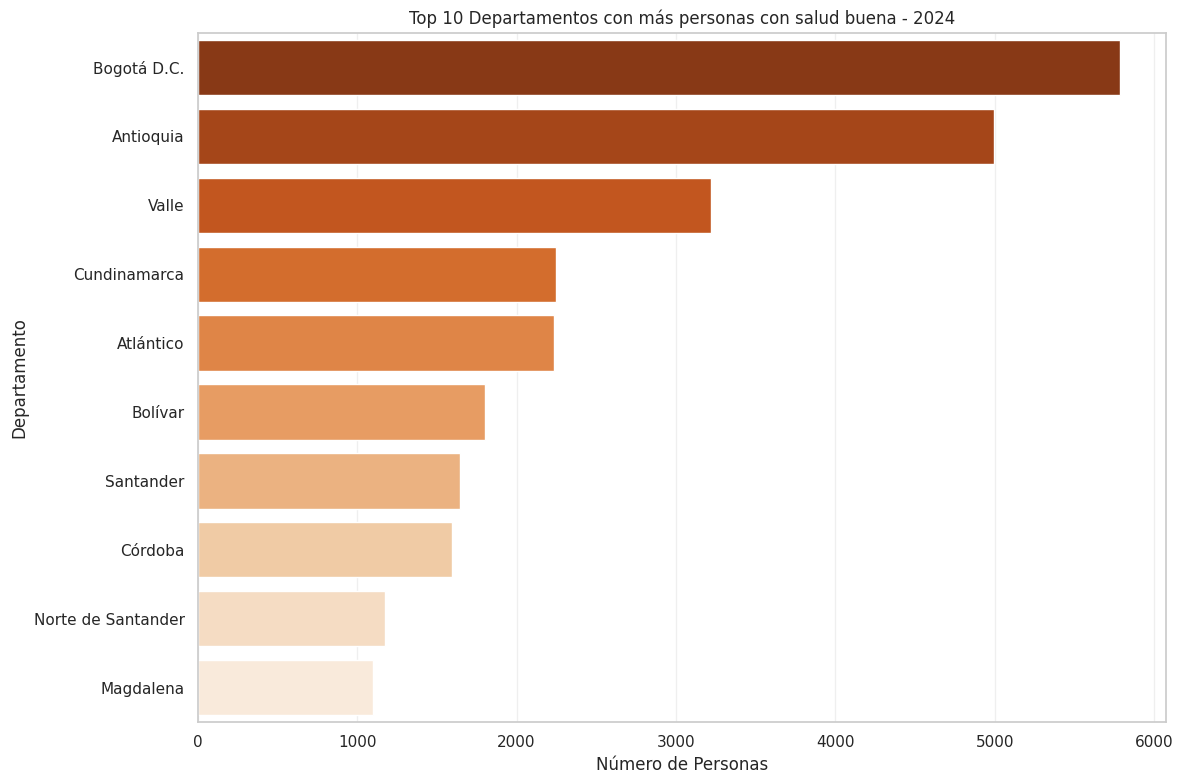

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 11'].nlargest(10, 'Buena')
sns.barplot(data=top_10, y='Departamentos', x='Buena', hue='Departamentos', legend=False, palette='Oranges_r')
plt.title('Top 10 Departamentos con más personas con salud buena - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

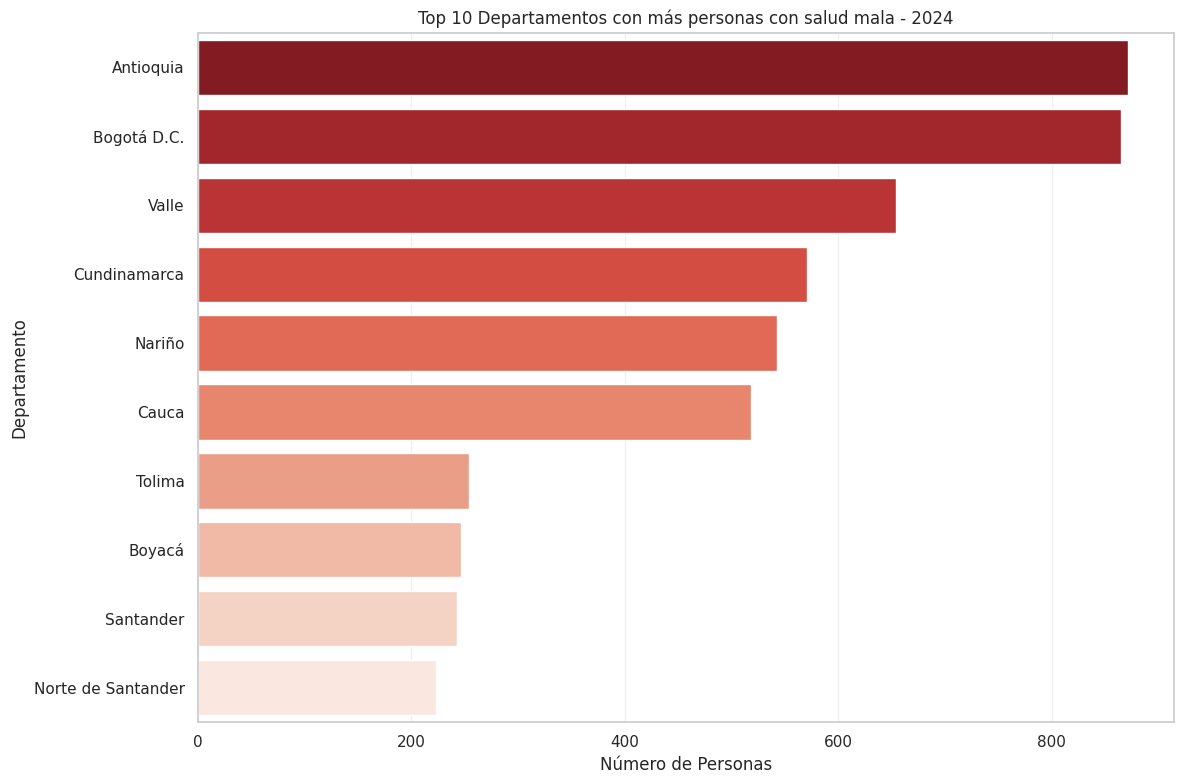

In [ ]:
plt.figure(figsize=(12, 8))
top_10 = df_variables['Cuadro 11'].nlargest(10, 'mala')
sns.barplot(data=top_10, y='Departamentos', x='mala', hue='Departamentos', legend=False, palette='Reds_r')
plt.title('Top 10 Departamentos con más personas con salud mala - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

 ### departamentos menores por por percepcion de la calidad del servicio de la EPS

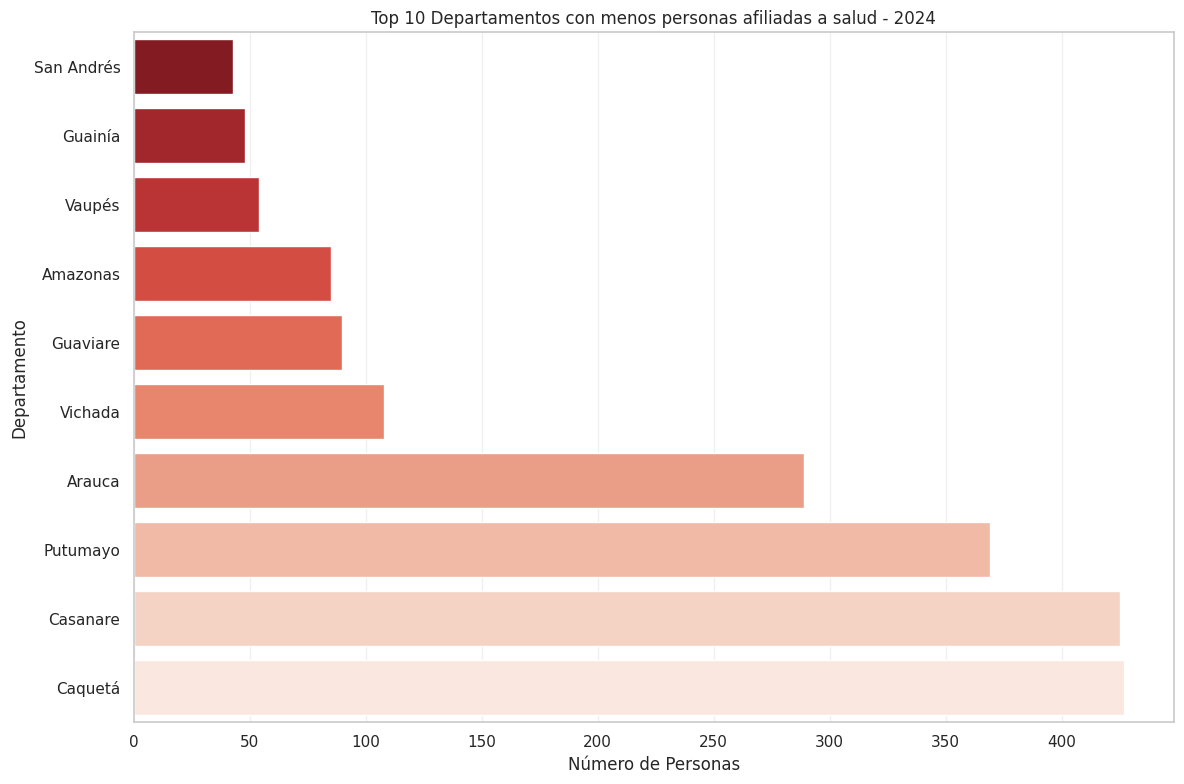

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 11'].nsmallest(10, 'Personas afiliadas')
sns.barplot(data=bottom_10, y='Departamentos', x='Personas afiliadas', hue='Departamentos', legend=False, palette='Reds_r')
plt.title('Top 10 Departamentos con menos personas afiliadas a salud - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

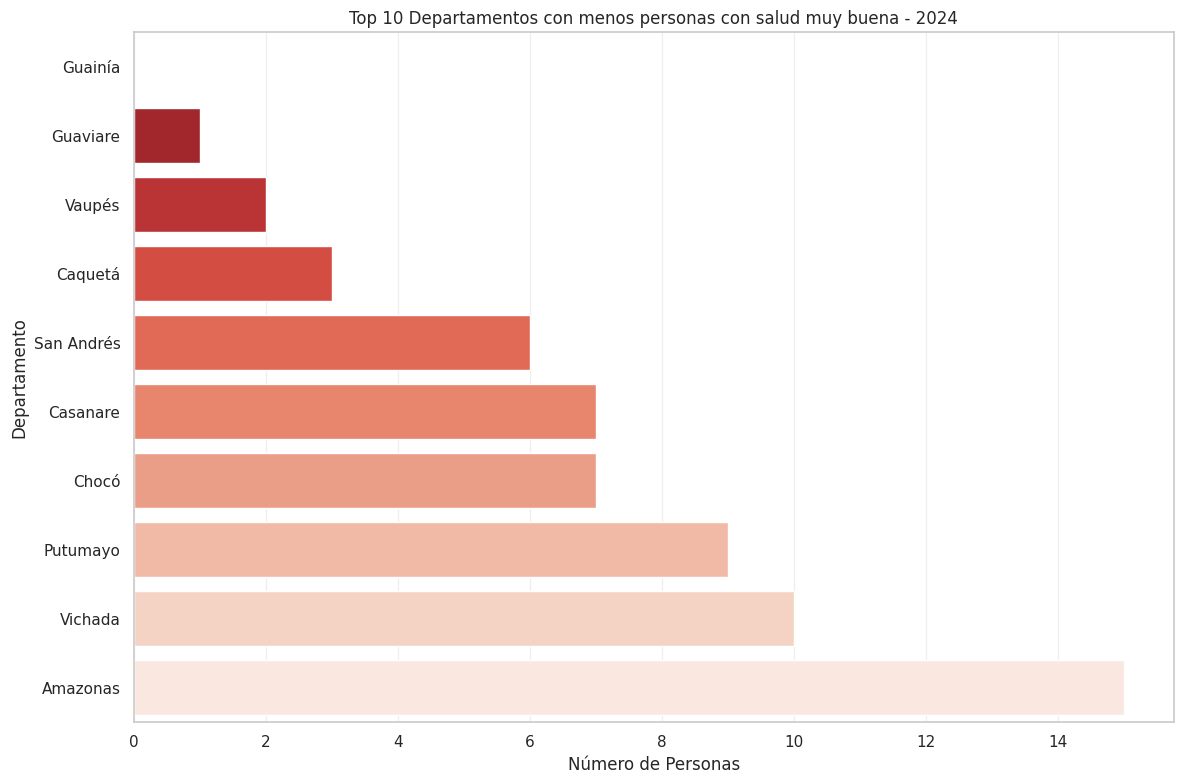

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 11'].nsmallest(10, 'muy buena')
sns.barplot(data=bottom_10, y='Departamentos', x='muy buena', hue='Departamentos', legend=False, palette='Reds_r')
plt.title('Top 10 Departamentos con menos personas con salud muy buena - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

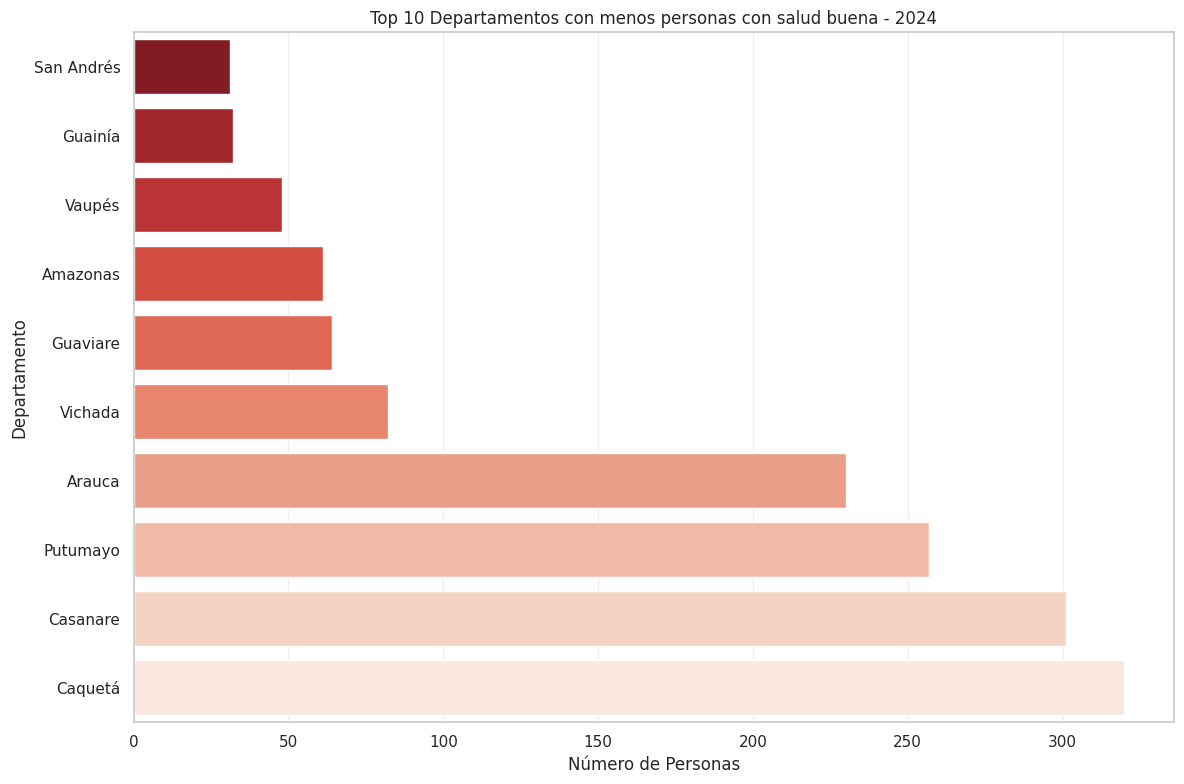

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 11'].nsmallest(10, 'Buena')
sns.barplot(data=bottom_10, y='Departamentos', x='Buena', hue='Departamentos', legend=False, palette='Reds_r')
plt.title('Top 10 Departamentos con menos personas con salud buena - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

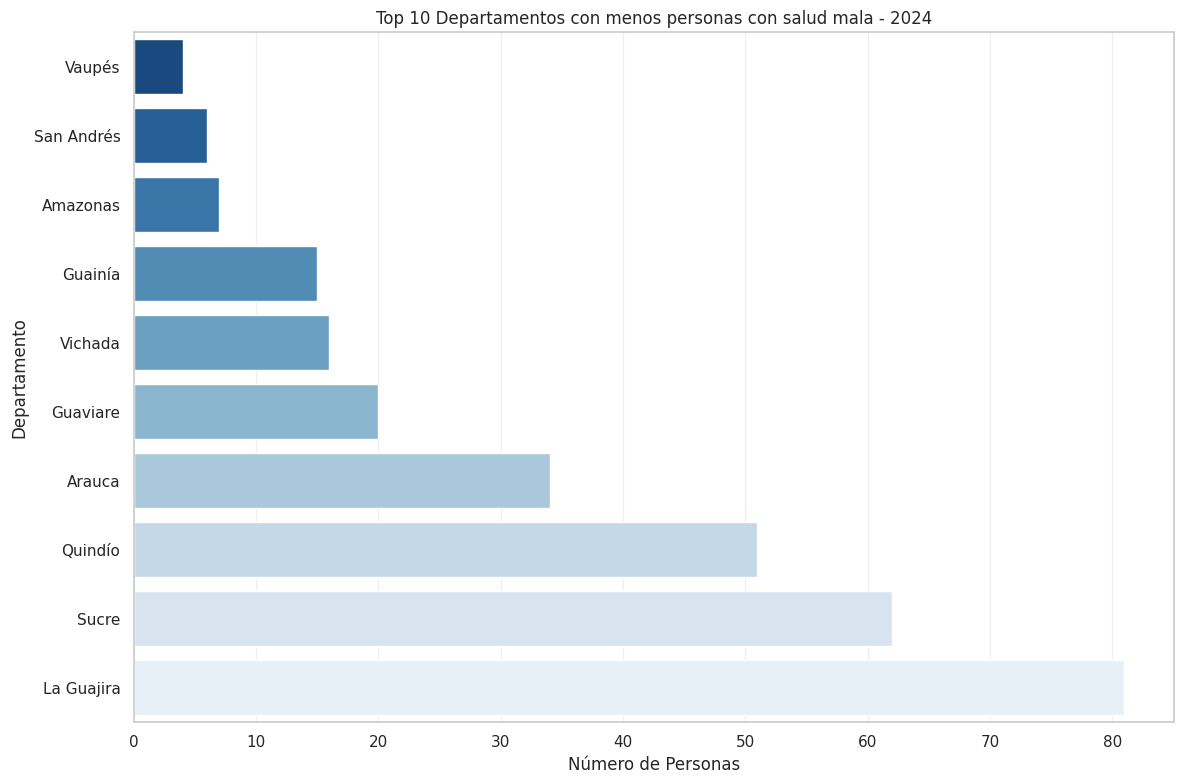

In [ ]:
plt.figure(figsize=(12, 8))
bottom_10 = df_variables['Cuadro 11'].nsmallest(10, 'mala')
sns.barplot(data=bottom_10, y='Departamentos', x='mala', hue='Departamentos', legend=False, palette='Blues_r')
plt.title('Top 10 Departamentos con menos personas con salud mala - 2024')
plt.xlabel('Número de Personas')
plt.ylabel('Departamento')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### Boxplot: Identificando la Dispersión y los Outliers

<Figure size 1800x1000 with 0 Axes>

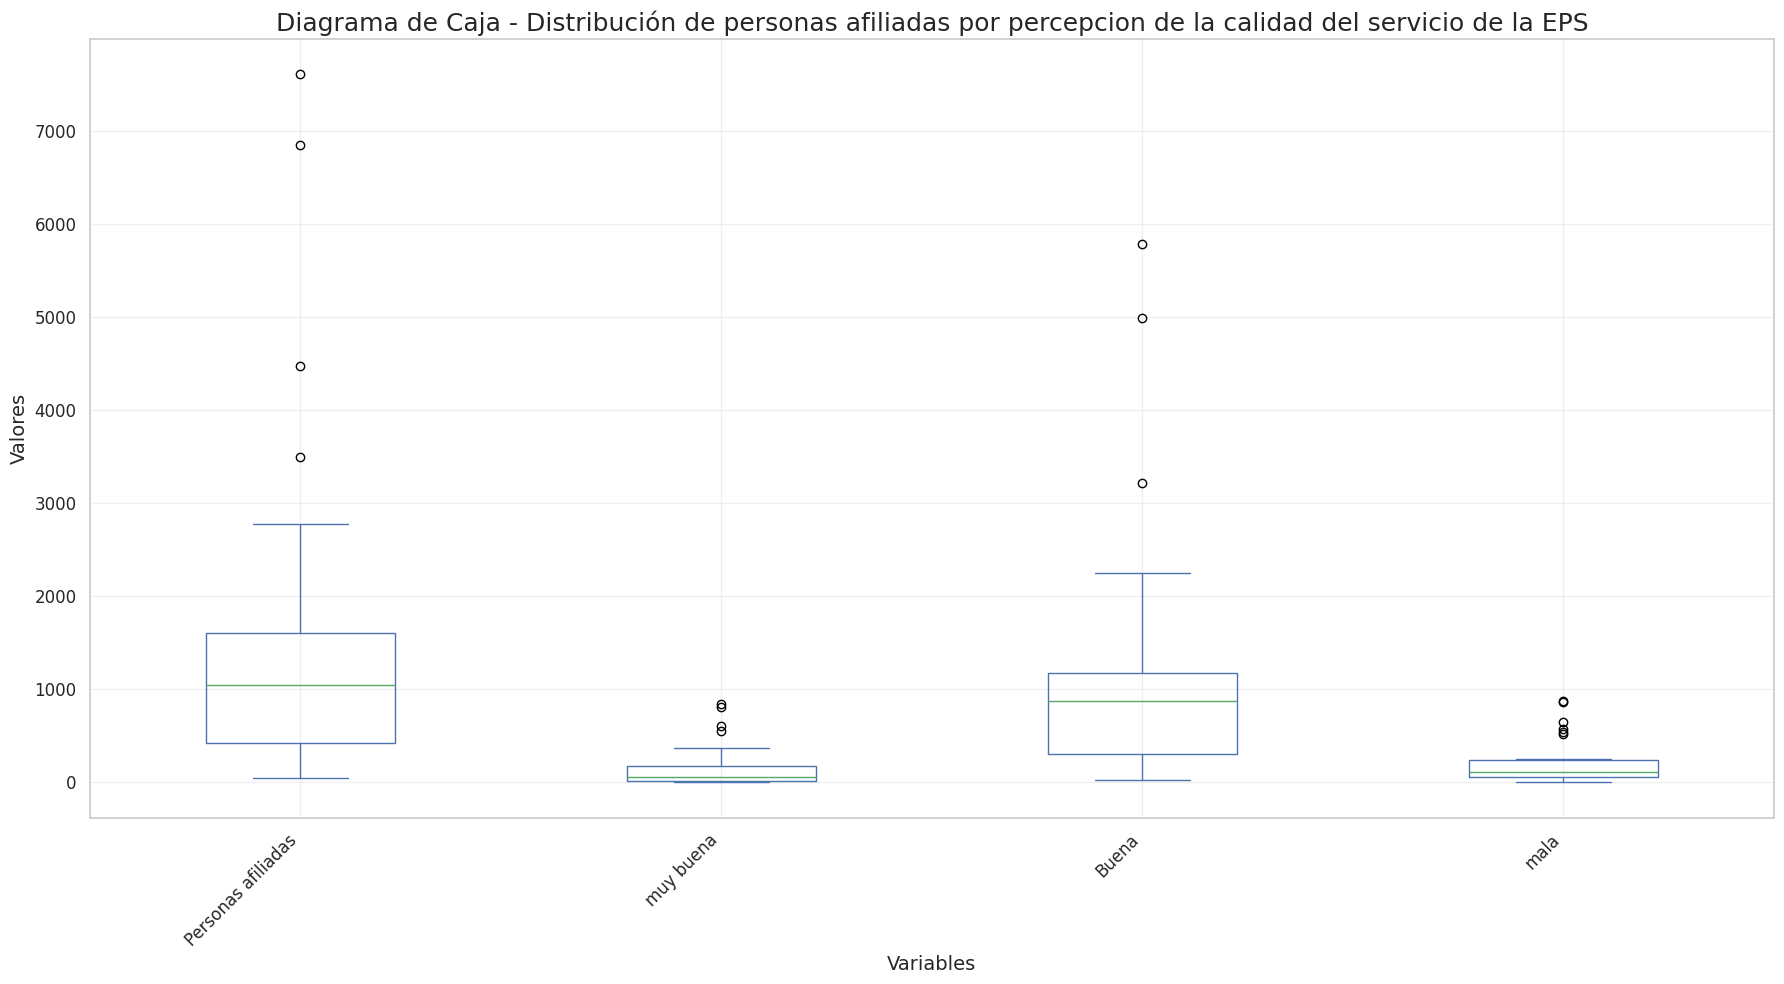

In [ ]:
plt.figure(figsize=(18,10))

df_variables['Cuadro 11'].plot(
    kind='box',
    figsize=(18,10),
    fontsize=12
)

plt.title('Diagrama de Caja - Distribución de personas afiliadas por percepcion de la calidad del servicio de la EPS', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)

# Rotar etiquetas en X (si es necesario)
plt.xticks(rotation=45, ha='right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4.Visualizaciones Multivariadas (Dos o más variables)

###Unir datos

In [ ]:
 # Exploración de columnas
print("=== EXPLORACIÓN DE COLUMNAS DISPONIBLES ===")

print("\n1. COLUMNAS EN df_ipm:")
print(df_ipm.columns.tolist())

print("\n2. COLUMNAS EN CADA HOJA DE VARIABLES:")
for sheet_name, df_sheet in df_variables.items():
    print(f"\n--- {sheet_name} ---")
    print("Primeras 10 columnas:")
    print(df_sheet.columns.tolist()[:10])



=== EXPLORACIÓN DE COLUMNAS DISPONIBLES ===

1. COLUMNAS EN df_ipm:
['Departamento', '2024_Total']

2. COLUMNAS EN CADA HOJA DE VARIABLES:

--- Cuadro 3 ---
Primeras 10 columnas:
['Departamento', 'total hogares', 'hogares con jefe hombre', 'hogares con jefe mujer']

--- Cuadro 4 ---
Primeras 10 columnas:
['Departamentos', 'total Hogares', 'total Energia', 'total Gas Natural', 'Total Acueducto', 'Total Alcantarillado', 'Total Recolección de Basura']

--- Cuadro 5 ---
Primeras 10 columnas:
['Departamentos', 'total hogares', 'total Internet', 'total Tipo fijo', 'Total Tipo Movil', 'Total Tipo Fijo-Movil']

--- Cuadro 6 ---
Primeras 10 columnas:
['Departamentos', 'total hogares', 'Propia totalmete pagada', 'Prpia la estan pagando', 'En Arriendo o Subarriendo', 'Con permiso del propietario/sin pago', 'poosesión sin titulo', 'propiedad colectiva']

--- Cuadro 11 ---
Primeras 10 columnas:
['Departamentos', 'Personas afiliadas', 'muy buena', 'Buena', 'mala']


### IPM/jefatura femenina o masculina

In [ ]:
# Preparar datos del Cuadro 3
df_cuadro3 = df_combinado[['Departamento', 'IPM', 'hogares con jefe hombre', 'hogares con jefe mujer']].copy()
df_cuadro3['porcentaje_jefe_mujer'] = (df_cuadro3['hogares con jefe mujer'] /
                                      (df_cuadro3['hogares con jefe hombre'] + df_cuadro3['hogares con jefe mujer'])) * 100

# Gráfico doble: IPM vs jefatura masculina y femenina
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Jefatura masculina
sns.scatterplot(x='hogares con jefe hombre', y='IPM', data=df_cuadro3, ax=ax1)
ax1.set_title('IPM vs Hogares con Jefe Hombre')
ax1.set_xlabel('Número de Hogares con Jefe Hombre')
ax1.set_ylabel('IPM')

# Jefatura femenina
sns.scatterplot(x='porcentaje_jefe_mujer', y='IPM', data=df_cuadro3, ax=ax2)
ax2.set_title('IPM vs Porcentaje de Jefatura Femenina')
ax2.set_xlabel('Porcentaje de Jefatura Femenina (%)')
ax2.set_ylabel('IPM')

plt.tight_layout()
plt.show()

NameError: name 'df_combinado' is not defined

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cuadro3, x='hogares con jefe hombre', y='IPM',
                size='hogares con jefe mujer', hue='porcentaje_jefe_mujer',
                sizes=(50, 500), alpha=0.7, palette='viridis')
plt.title('IPM vs Jefatura del Hogar\n(Tamaño: Jefatura Femenina, Color: % Jefatura Femenina)')
plt.xlabel('Hogares con Jefe Hombre')
plt.ylabel('IPM')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### IPM/ Hogaresv por acceso a servicios públicos

In [ ]:
# Combinar con todos los servicios del Cuadro 4
df_cuadro4 = df_ipm[['Departamento', '2024_Total']].copy()
df_cuadro4 = df_cuadro4.merge(df_variables['Cuadro 4'], left_on='Departamento', right_on='Departamentos', how='left')

# Calcular porcentajes para cada servicio
servicios = ['total Energia', 'total Gas Natural', 'Total Acueducto', 'Total Alcantarillado', 'Total Recolección de Basura']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, servicio in enumerate(servicios):
    if i < len(axes):
        df_cuadro4[f'porcentaje_{servicio}'] = (df_cuadro4[servicio] / df_cuadro4['total Hogares']) * 100
        sns.scatterplot(x=f'porcentaje_{servicio}', y='2024_Total', data=df_cuadro4, ax=axes[i])
        axes[i].set_title(f'IPM vs {servicio}')
        axes[i].set_xlabel(f'Porcentaje de {servicio} (%)')
        axes[i].set_ylabel('IPM')

# Ocultar el último subplot si no se usa
if len(servicios) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

### IPM/ Hogares por acceso a internet

In [ ]:
# Combinar con datos de internet
df_cuadro5 = df_ipm[['Departamento', '2024_Total']].copy()
df_cuadro5 = df_cuadro5.merge(df_variables['Cuadro 5'], left_on='Departamento', right_on='Departamentos', how='left')

# Calcular porcentajes
internet_vars = ['total Internet', 'total Tipo fijo', 'Total Tipo Movil', 'Total Tipo Fijo-Movil']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(internet_vars):
    df_cuadro5[f'porcentaje_{var}'] = (df_cuadro5[var] / df_cuadro5['total hogares']) * 100
    sns.scatterplot(x=f'porcentaje_{var}', y='2024_Total', data=df_cuadro5, ax=axes[i])
    axes[i].set_title(f'IPM vs {var}')
    axes[i].set_xlabel(f'Porcentaje de {var} (%)')
    axes[i].set_ylabel('IPM')

plt.tight_layout()
plt.show()

### IPM/ Hogares por tipo de tendencia a la tierra

In [ ]:
# Combinar con tenencia de vivienda
df_cuadro6 = df_ipm[['Departamento', '2024_Total']].copy()
df_cuadro6 = df_cuadro6.merge(df_variables['Cuadro 6'], left_on='Departamento', right_on='Departamentos', how='left')

# Variables de tenencia
tenencia_vars = ['Propia totalmete pagada', 'Prpia la estan pagando', 'En Arriendo o Subarriendo',
                 'Con permiso del propietario/sin pago', 'poosesión sin titulo', 'propiedad colectiva']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(tenencia_vars):
    if i < len(axes):
        df_cuadro6[f'porcentaje_{var}'] = (df_cuadro6[var] / df_cuadro6['total hogares']) * 100
        sns.scatterplot(x=f'porcentaje_{var}', y='2024_Total', data=df_cuadro6, ax=axes[i])
        axes[i].set_title(f'IPM vs {var}')
        axes[i].set_xlabel(f'Porcentaje de {var} (%)')
        axes[i].set_ylabel('IPM')

plt.tight_layout()
plt.show()

### IPM/ percepción de la calidad de la EPS

In [ ]:
# Combinar con percepción de servicios
df_cuadro11 = df_ipm[['Departamento', '2024_Total']].copy()
df_cuadro11 = df_cuadro11.merge(df_variables['Cuadro 11'], left_on='Departamento', right_on='Departamentos', how='left')

# Variables de percepción
percepcion_vars = ['muy buena', 'Buena', 'mala']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, var in enumerate(percepcion_vars):
    df_cuadro11[f'porcentaje_{var}'] = (df_cuadro11[var] / df_cuadro11['Personas afiliadas']) * 100
    sns.scatterplot(x=f'porcentaje_{var}', y='2024_Total', data=df_cuadro11, ax=axes[i])
    axes[i].set_title(f'IPM vs Percepción "{var}"')
    axes[i].set_xlabel(f'Porcentaje de "{var}" (%)')
    axes[i].set_ylabel('IPM')

plt.tight_layout()
plt.show()